In [94]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [96]:
path ='/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Map_KDE_3plots'
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
tracks = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the tracks list
            tracks.append(file.name)

In [98]:
# view the first 10 flower entries
print(tracks[:10])

['Event 66 - 1889-07-31 to 1889-08-06_output.png', 'Event 583 - 1899-02-19 to 1899-02-25_output.png', 'Event 600 - 1897-10-16 to 1897-10-22_output.png', 'Event 255 - 1900-06-15 to 1900-06-21_output.png', 'Event 1006 - 1888-09-17 to 1888-09-23_output.png', 'Event 439 - 1890-03-16 to 1890-03-22_output.png', 'Event 260 - 1900-01-22 to 1900-01-28_output.png', 'Event 673 - 1879-07-28 to 1879-08-03_output.png', 'Event 217 - 1887-04-11 to 1887-04-17_output.png', 'Event 517 - 1886-08-17 to 1886-08-23_output.png']


In [100]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [101]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

# Define the path
path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Map_KDE_3plots'

# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filenames
tracks = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
    # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
            # adds only the image files to the tracks list
            tracks.append(file.name)

# view the first 10 image entries
print(tracks[:10])

# load the model first and pass as an argument
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

def extract_features(file, model):
    try:
        print(f"Processing file: {file}")
        # load the image as a 224x224 array
        img = load_img(file, target_size=(224,224))
        print("Image loaded successfully.")
        
        # convert from 'PIL.Image.Image' to numpy array
        img = np.array(img) 
        print(f"Image converted to numpy array: {img.shape}")
        
        # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
        reshaped_img = img.reshape(1,224,224,3) 
        print(f"Image reshaped for model: {reshaped_img.shape}")
        
        # prepare image for model
        imgx = preprocess_input(reshaped_img)
        print("Image preprocessed successfully.")
        
        # get the feature vector
        features = model.predict(imgx)
        print("Features extracted successfully.")
        return features
    except Exception as e:
        print(f"Error processing {file}: {e}")
        return None

data = {}
p = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Map_features/tracks_features.pkl'

# loop through each image in the dataset
for track in tracks:
    # try to extract the features and update the dictionary
    try:
        file_path = os.path.join(path, track)
        feat = extract_features(file_path, model)
        if feat is not None:
            data[track] = feat
    except Exception as e:
        print(f"Error processing {track}: {e}")
        continue

# save the extracted features as a pickle file
with open(p, 'wb') as file:
    pickle.dump(data, file)

# Check if data dictionary is filled
print(f"Extracted features for {len(data)} images")



['Event 66 - 1889-07-31 to 1889-08-06_output.png', 'Event 583 - 1899-02-19 to 1899-02-25_output.png', 'Event 600 - 1897-10-16 to 1897-10-22_output.png', 'Event 255 - 1900-06-15 to 1900-06-21_output.png', 'Event 1006 - 1888-09-17 to 1888-09-23_output.png', 'Event 439 - 1890-03-16 to 1890-03-22_output.png', 'Event 260 - 1900-01-22 to 1900-01-28_output.png', 'Event 673 - 1879-07-28 to 1879-08-03_output.png', 'Event 217 - 1887-04-11 to 1887-04-17_output.png', 'Event 517 - 1886-08-17 to 1886-08-23_output.png']
Processing file: /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Map_KDE_3plots/Event 66 - 1889-07-31 to 1889-08-06_output.png
Image loaded successfully.
Image converted to numpy array: (224, 224, 3)
Image reshaped for model: (1, 224, 224, 3)
Image preprocessed successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
Features extracted successfully.
Processing file: /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/

In [104]:
# get a list of the filenames
filenames = np.array(list(data.keys()))
print(filenames)

['Event 66 - 1889-07-31 to 1889-08-06_output.png'
 'Event 583 - 1899-02-19 to 1899-02-25_output.png'
 'Event 600 - 1897-10-16 to 1897-10-22_output.png'
 'Event 255 - 1900-06-15 to 1900-06-21_output.png'
 'Event 1006 - 1888-09-17 to 1888-09-23_output.png'
 'Event 439 - 1890-03-16 to 1890-03-22_output.png'
 'Event 260 - 1900-01-22 to 1900-01-28_output.png'
 'Event 673 - 1879-07-28 to 1879-08-03_output.png'
 'Event 217 - 1887-04-11 to 1887-04-17_output.png'
 'Event 517 - 1886-08-17 to 1886-08-23_output.png'
 'Event 510 - 1884-08-22 to 1884-08-28_output.png'
 'Event 666 - 1888-03-28 to 1888-04-03_output.png'
 'Event 445 - 1900-03-18 to 1900-03-24_output.png'
 'Event 474 - 1883-05-03 to 1883-05-09_output.png'
 'Event 998 - 1896-03-13 to 1896-03-19_output.png'
 'Event 34 - 1898-01-22 to 1898-01-28_output.png'
 'Event 7 - 1892-03-10 to 1892-03-16_output.png'
 'Event 695 - 1877-03-01 to 1877-03-07_output.png'
 'Event 737 - 1887-12-14 to 1887-12-20_output.png'
 'Event 563 - 1897-09-25 to 1897-1

In [106]:
# get a list of just the features
feat = np.array(list(data.values()))
feat.shape

(871, 1, 4096)

In [108]:
# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

(871, 4096)

In [110]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [122]:
kmeans = KMeans(n_clusters=5, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=22)

In [124]:
kmeans.labels_

array([3, 0, 0, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 3, 4, 0, 2, 2, 0,
       3, 3, 4, 2, 4, 0, 2, 4, 4, 2, 4, 0, 1, 0, 4, 2, 2, 4, 2, 0, 2, 3,
       0, 2, 2, 4, 2, 4, 0, 2, 2, 2, 4, 2, 4, 4, 0, 4, 4, 2, 3, 4, 0, 4,
       2, 1, 0, 4, 4, 4, 4, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 1, 3, 4, 4, 2,
       0, 1, 4, 4, 3, 0, 2, 4, 3, 0, 3, 2, 0, 4, 0, 2, 0, 0, 4, 4, 0, 0,
       2, 0, 0, 0, 0, 4, 1, 1, 4, 0, 2, 4, 3, 4, 2, 3, 0, 4, 2, 3, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 3, 2, 0, 4, 4, 2, 0, 4, 4, 1, 0, 4, 0, 4, 3,
       4, 4, 1, 4, 4, 0, 2, 0, 0, 4, 2, 3, 2, 4, 4, 0, 4, 4, 2, 0, 2, 2,
       3, 4, 3, 4, 2, 0, 4, 4, 0, 0, 0, 4, 0, 3, 2, 0, 4, 0, 2, 2, 4, 4,
       0, 4, 1, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 0, 2, 4, 2, 2, 2, 2, 4,
       2, 4, 0, 0, 0, 2, 4, 4, 3, 0, 4, 3, 4, 0, 4, 1, 2, 3, 2, 3, 4, 3,
       4, 3, 0, 2, 2, 2, 3, 4, 2, 2, 1, 2, 1, 4, 4, 2, 2, 3, 4, 0, 4, 0,
       2, 2, 4, 0, 2, 4, 4, 1, 2, 4, 0, 3, 0, 0, 2, 4, 0, 0, 0, 4, 4, 2,
       4, 4, 4, 0, 0, 4, 2, 4, 0, 0, 0, 1, 0, 2, 4,

In [126]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [148]:
#view the filenames in cluster 0
groups[4]

['Event 1006 - 1888-09-17 to 1888-09-23_output.png',
 'Event 439 - 1890-03-16 to 1890-03-22_output.png',
 'Event 517 - 1886-08-17 to 1886-08-23_output.png',
 'Event 510 - 1884-08-22 to 1884-08-28_output.png',
 'Event 666 - 1888-03-28 to 1888-04-03_output.png',
 'Event 474 - 1883-05-03 to 1883-05-09_output.png',
 'Event 998 - 1896-03-13 to 1896-03-19_output.png',
 'Event 695 - 1877-03-01 to 1877-03-07_output.png',
 'Event 981 - 1891-04-24 to 1891-04-30_output.png',
 'Event 508 - 1883-11-09 to 1883-11-15_output.png',
 'Event 738 - 1892-06-19 to 1892-06-25_output.png',
 'Event 194 - 1895-03-18 to 1895-03-24_output.png',
 'Event 749 - 1889-12-21 to 1889-12-27_output.png',
 'Event 976 - 1898-02-27 to 1898-03-05_output.png',
 'Event 870 - 1885-11-27 to 1885-12-03_output.png',
 'Event 775 - 1897-07-06 to 1897-07-12_output.png',
 'Event 628 - 1884-02-10 to 1884-02-16_output.png',
 'Event 306 - 1859-03-14 to 1859-03-20_output.png',
 'Event 488 - 1871-02-11 to 1871-02-17_output.png',
 'Event 966

Fit 2 clusters, SSE: 575065.4375, Silhouette Score: 0.5163571238517761
Fit 3 clusters, SSE: 499839.875, Silhouette Score: 0.45897945761680603
Fit 4 clusters, SSE: 451605.46875, Silhouette Score: 0.470784068107605
Fit 5 clusters, SSE: 345054.59375, Silhouette Score: 0.5398343205451965
Fit 6 clusters, SSE: 316263.0, Silhouette Score: 0.5159142017364502
Fit 7 clusters, SSE: 289573.875, Silhouette Score: 0.5247321724891663
Fit 8 clusters, SSE: 279889.625, Silhouette Score: 0.5232908129692078
Fit 9 clusters, SSE: 267575.59375, Silhouette Score: 0.5272800326347351
Fit 10 clusters, SSE: 264272.1875, Silhouette Score: 0.4210391342639923
Fit 11 clusters, SSE: 257543.4375, Silhouette Score: 0.42136505246162415
Fit 12 clusters, SSE: 255850.34375, Silhouette Score: 0.41445523500442505
Fit 13 clusters, SSE: 250756.484375, Silhouette Score: 0.41089102625846863
Fit 14 clusters, SSE: 241630.03125, Silhouette Score: 0.4095214307308197
Fit 15 clusters, SSE: 231873.640625, Silhouette Score: 0.41529724001

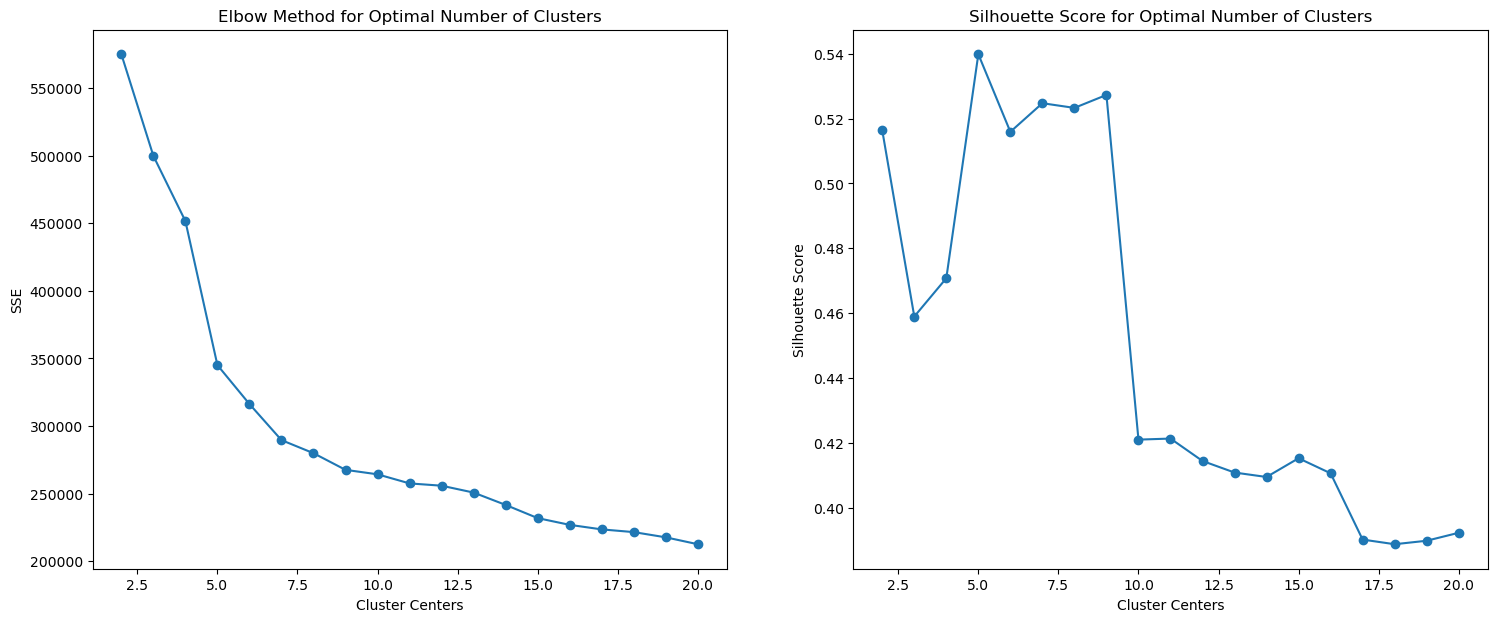

Optimal number of clusters based on Silhouette Score: 5


In [130]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method and Silhouette score
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k + 1)  # Silhouette score requires at least 2 clusters
    sse = []
    silhouette_scores = []

    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=22)
        kmeans.fit(x)
        sse.append(kmeans.inertia_)
        
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
        
        print(f'Fit {k} clusters, SSE: {kmeans.inertia_}, Silhouette Score: {score}')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    ax1.plot(iters, sse, marker='o')
    ax1.set_xlabel('Cluster Centers')
    ax1.set_ylabel('SSE')
    ax1.set_title('Elbow Method for Optimal Number of Clusters')
    
    ax2.plot(iters, silhouette_scores, marker='o')
    ax2.set_xlabel('Cluster Centers')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Score for Optimal Number of Clusters')
    
    plt.show()
    
    # Find the optimal number of clusters based on the highest silhouette score
    optimal_k = iters[silhouette_scores.index(max(silhouette_scores))]
    print(f'Optimal number of clusters based on Silhouette Score: {optimal_k}')

# Find the optimal number of clusters
find_optimal_clusters(x, 20)


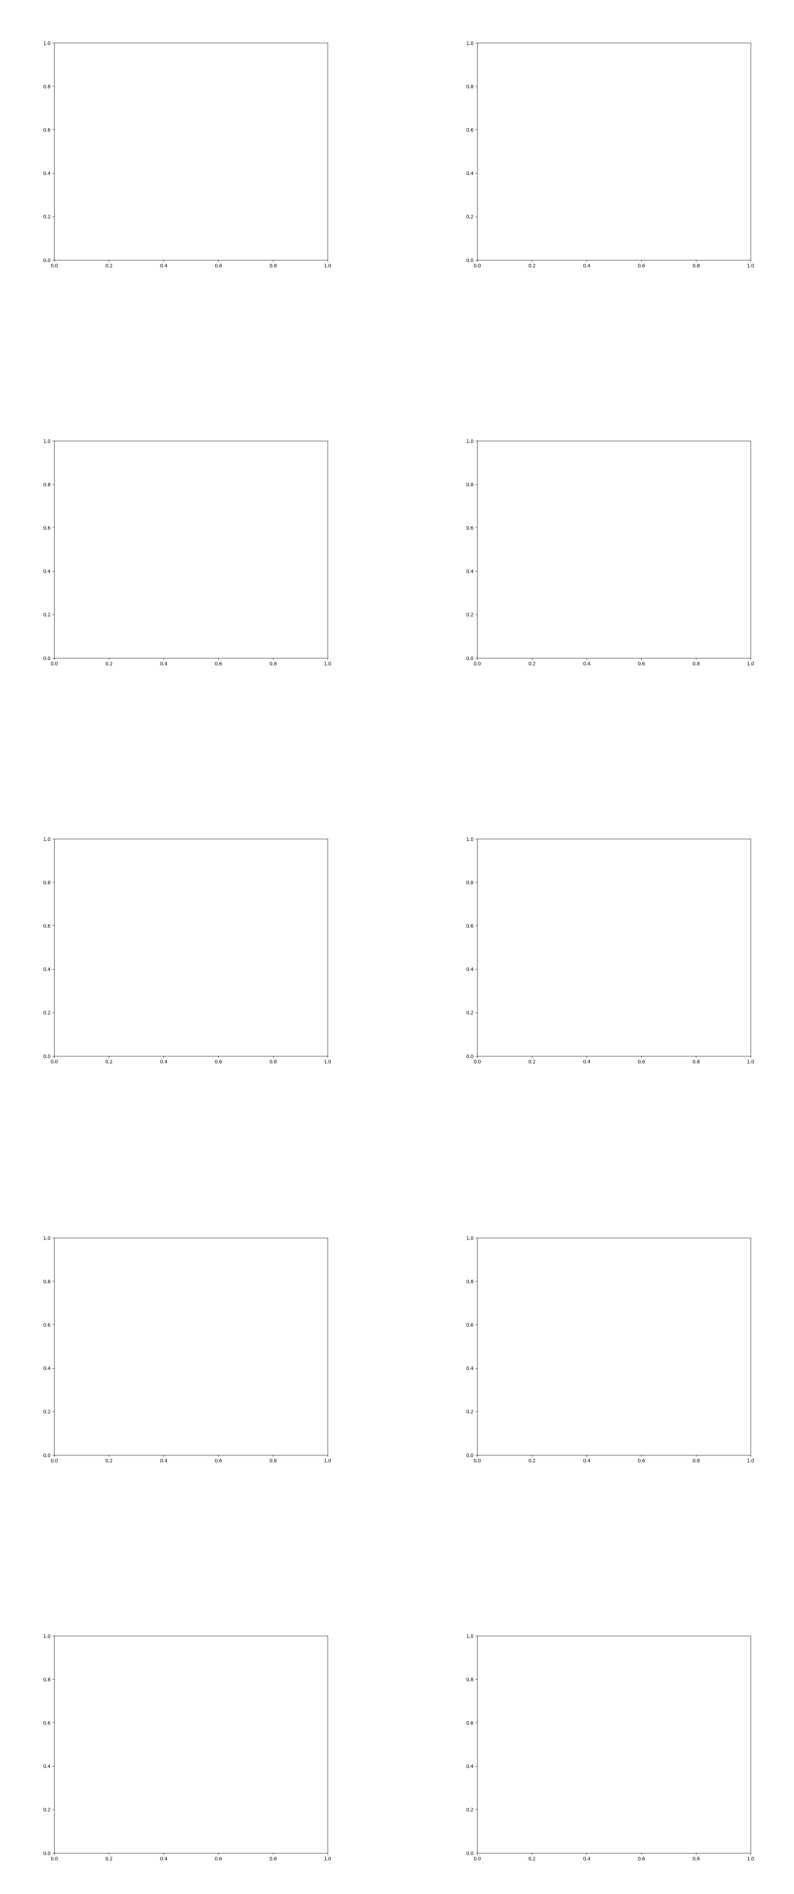

In [144]:
# Function to display images in a cluster
def show_cluster_images(cluster_id):
    cluster_images = groups[cluster_id]
    plt.figure(figsize=(10, 25))  # Adjust the figure size as needed
    num_images = min(len(cluster_images), 10)  # Display up to 10 images (5 rows, 2 columns)
    
    for idx, img_file in enumerate(cluster_images[:num_images]):
        img = load_img(os.path.join(path, img_file))
        img = img_to_array(img)
        img = img / 255.0
        plt.subplot(5, 2, idx + 1)
        plt.imshow(img)
        plt.axis('off')
    
    plt.show()

# Show images in cluster 0
show_cluster_images(4)


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_2003/1760461628.py:7: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import maximum_filter


No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
Error processing Event 87 - 1895-01-16 to 1895-01-22: aweights cannot be negative


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Error processing Event 88 - 1895-11-01 to 1895-11-07: array must not contain infs or NaNs
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
Error processing Event 105 - 1841-01-18 to 1841-01-24: `dataset` input should have multiple elements.
Error processing Event 106 - 1842-03-04 to 1842-03-10: `dataset` input should have multiple elements.
Error processing Event 107 - 1842-03-11 to 1842-03-17: `dataset` input should have multiple elements.


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:208: RuntimeWarning: invalid value encountered in divide
  self._weights /= sum(self._weights)


Error processing Event 108 - 1842-07-12 to 1842-07-18: Number of dimensions is greater than number of samples. This results in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Note that `gaussian_kde` interprets each *column* of `dataset` to be a point; consider transposing the input to `dataset`.
Error processing Event 109 - 1843-02-18 to 1843-02-24: Number of dimensions is greater than number of samples. This results in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Note that `gaussian_kde` interprets each *column* of `dataset` to be a point; consider transposing the input to `dataset`.


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:208: RuntimeWarning: invalid value encountered in divide
  self._weights /= sum(self._weights)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:208: RuntimeWarning: invalid value encountered in divide
  self._weights /= sum(self._weights)


Error processing Event 110 - 1843-08-11 to 1843-08-17: Number of dimensions is greater than number of samples. This results in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Note that `gaussian_kde` interprets each *column* of `dataset` to be a point; consider transposing the input to `dataset`.
Error processing Event 111 - 1843-08-21 to 1843-08-27: Number of dimensions is greater than number of samples. This results in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Note that `gaussian_kde` interprets each *column* of `dataset` to be a point; consider transposing the input to `dataset`.
Error processing Event 112 - 1844-07-28 to 1844-08-03: `dataset` input should have multiple elements.
No local maxima found, skipping filtering.
Error processing Event 113 - 1871-01-21 to 1871-01-27: array must not contain infs or NaNs


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Error processing Event 118 - 1875-03-15 to 1875-03-21: array must not contain infs or NaNs
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:208: RuntimeWarning: invalid value encountered in divide
  self._weights /= sum(self._weights)


Error processing Event 126 - 1879-12-13 to 1879-12-19: array must not contain infs or NaNs
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
Error processing Event 135 - 1885-12-23 to 1885-12-29: aweights cannot be negative
Error processing Event 141 - 1886-07-23 to 1886-07-29: aweights cannot be negative
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:208: RuntimeWarning: invalid value encountered in divide
  self._weights /= sum(self._weights)


Error processing Event 154 - 1877-05-09 to 1877-05-15: array must not contain infs or NaNs
Error processing Event 157 - 1879-03-15 to 1879-03-21: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Error processing Event 158 - 1880-07-16 to 1880-07-22: array must not contain infs or NaNs
Error processing Event 160 - 1887-11-30 to 1887-12-06: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.
No local maxima found, skipping filtering.
Error processing Event 165 - 1884-04-18 to 1884-04-24: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.
No local maxima found, skipping filtering.
No 

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Error processing Event 176 - 1868-02-14 to 1868-02-20: array must not contain infs or NaNs
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.


ValueError: Sheet 'IDW' already exists and if_sheet_exists is set to 'error'.

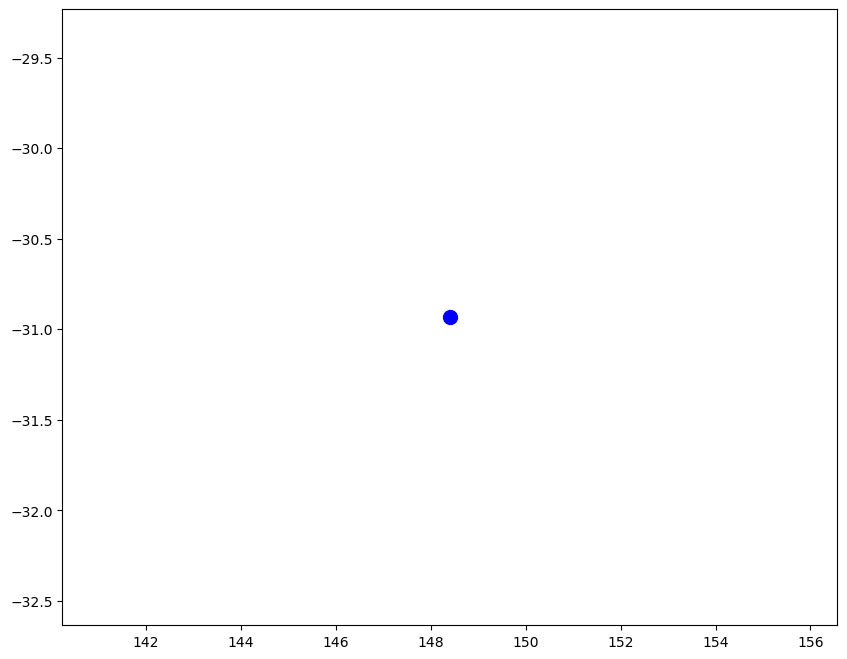

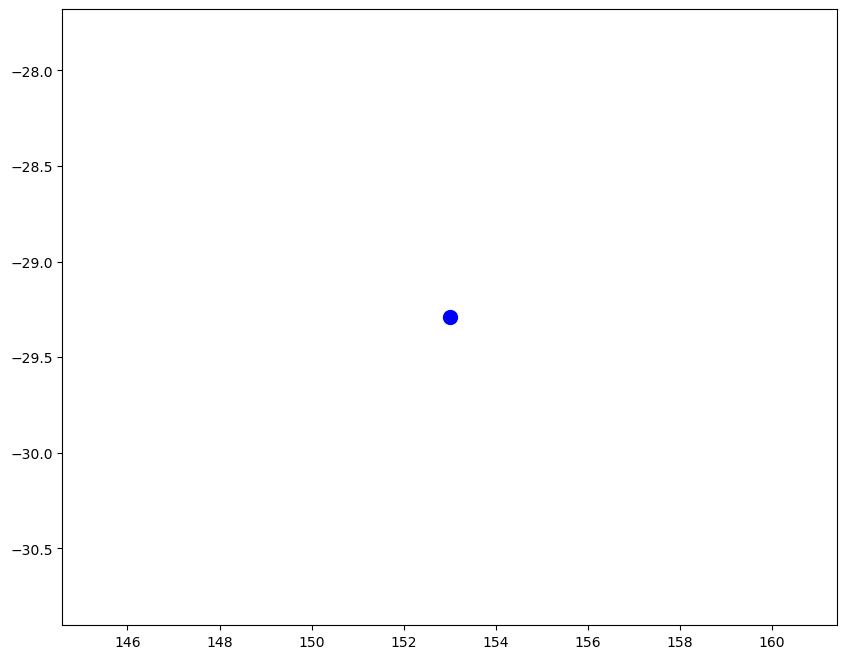

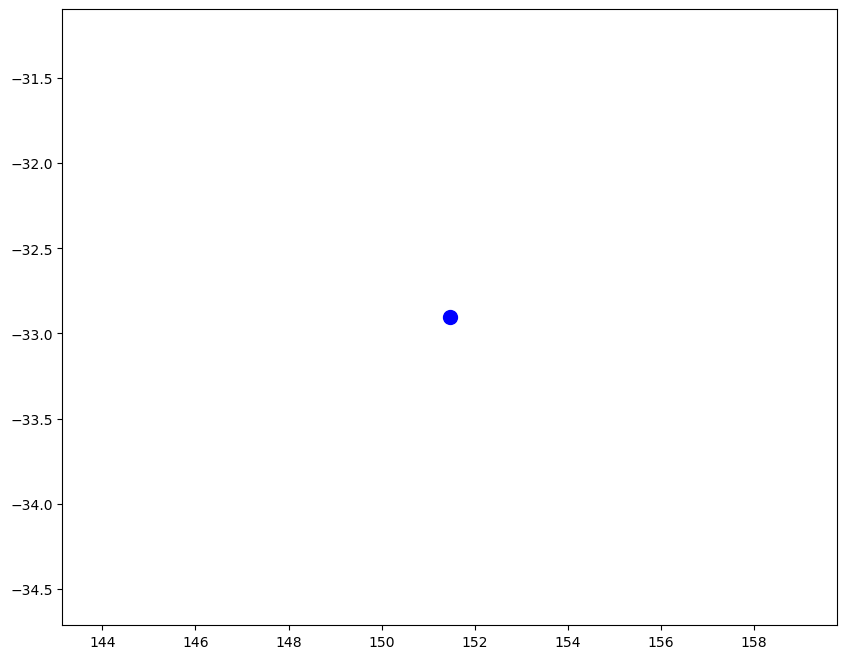

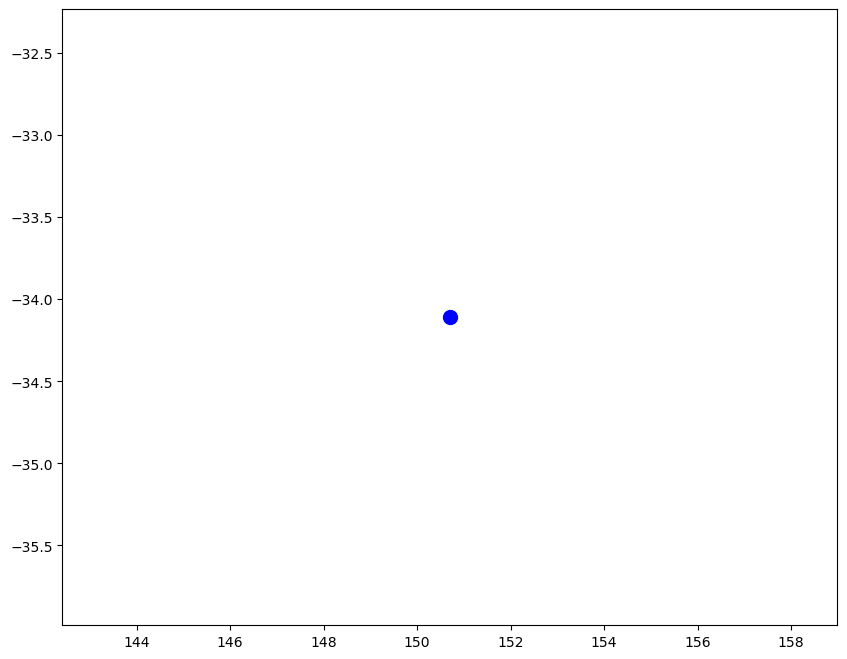

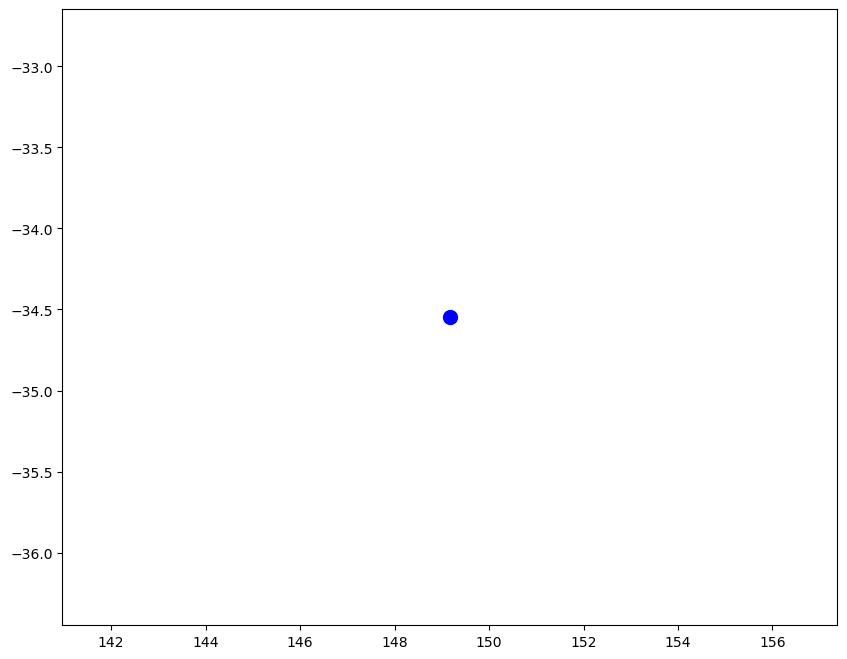

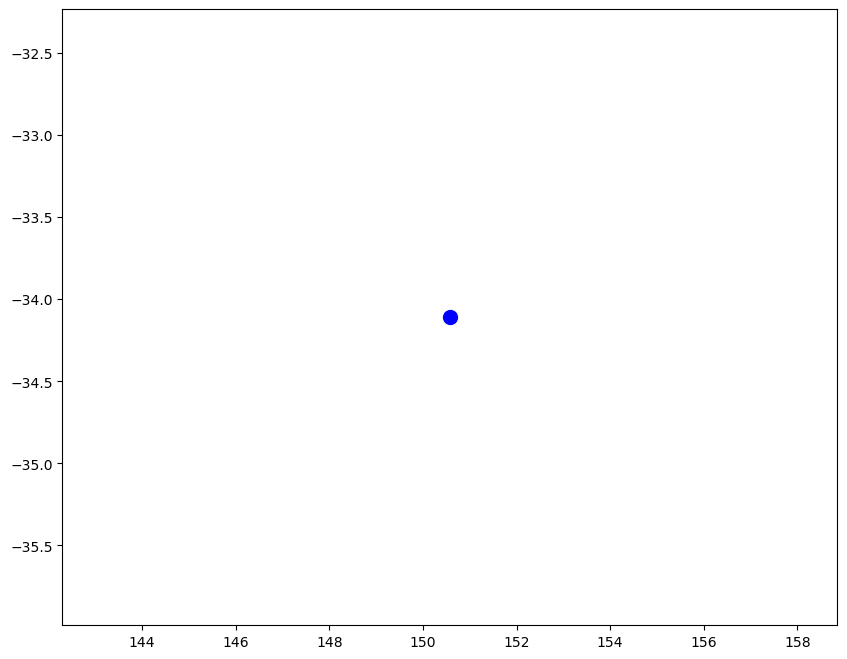

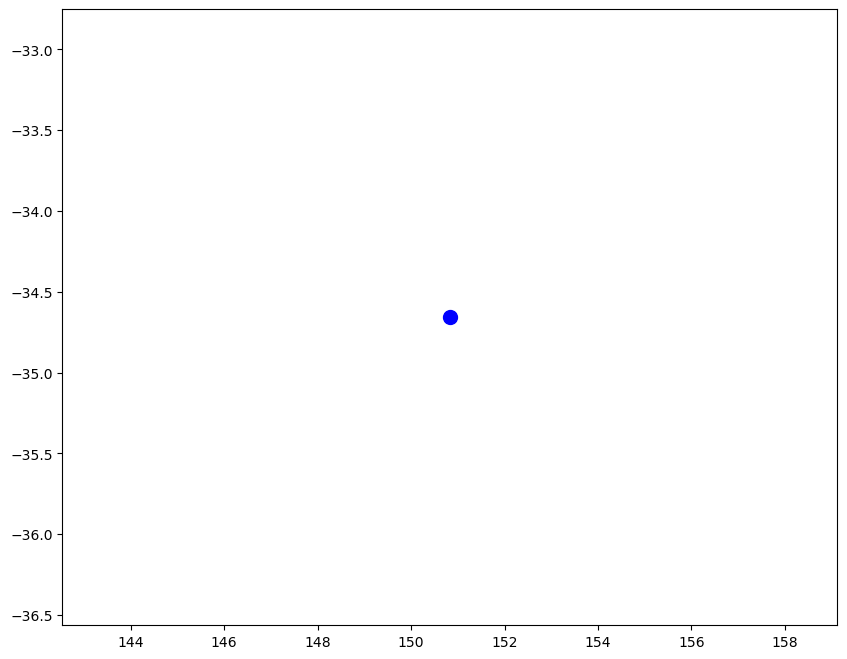

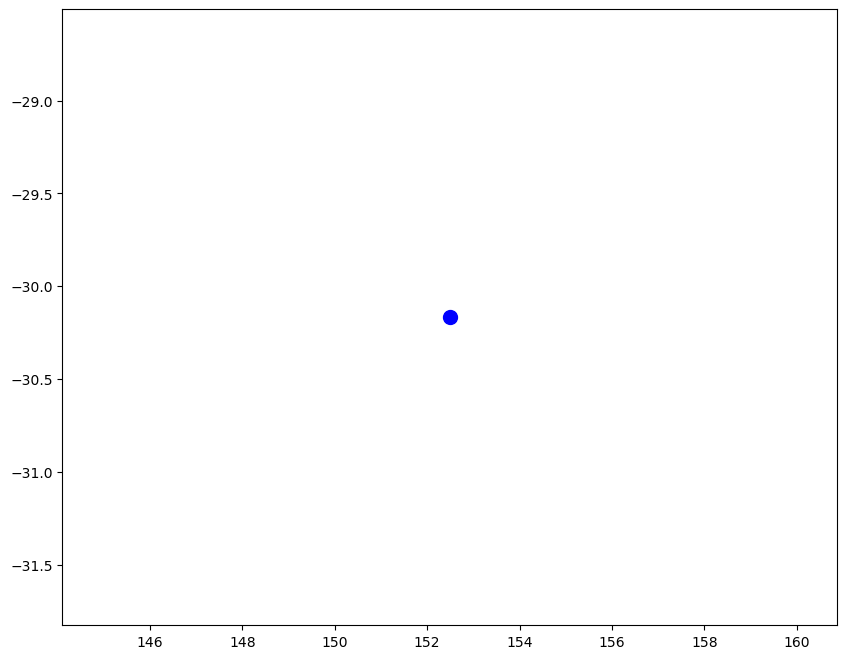

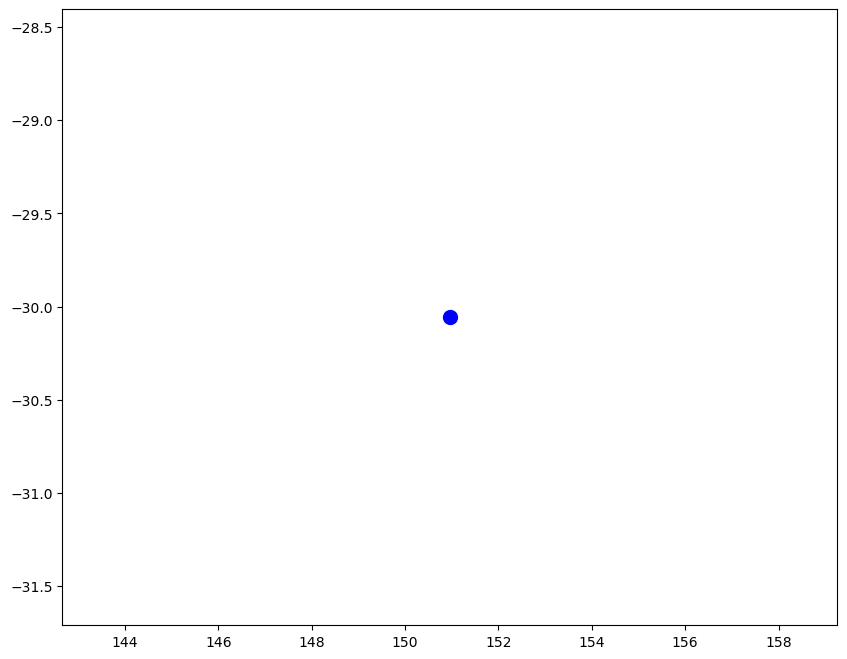

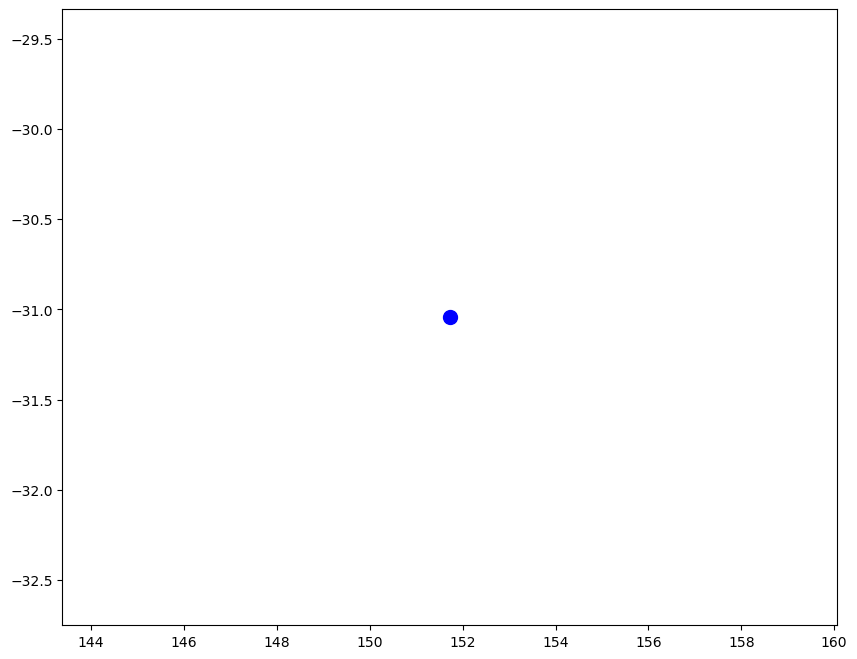

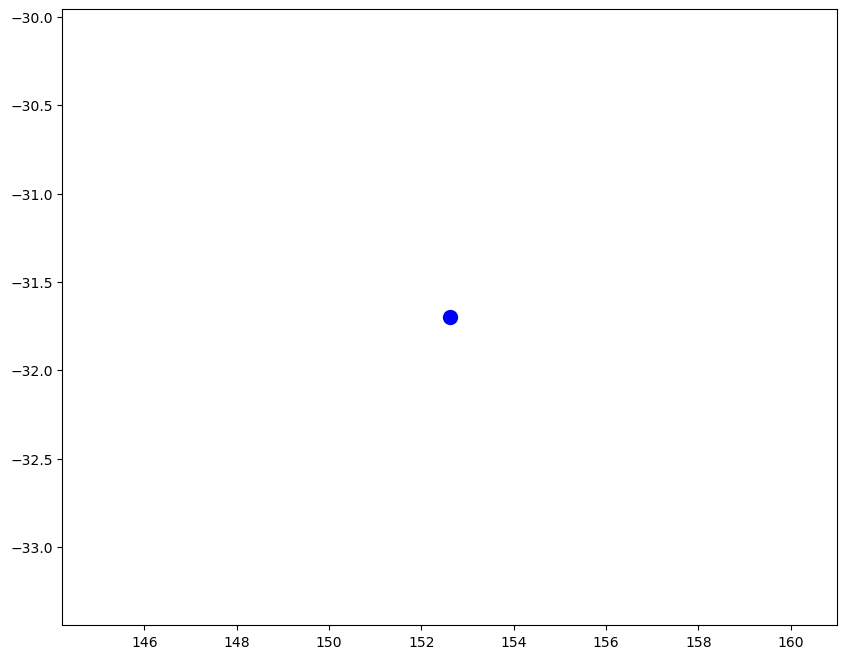

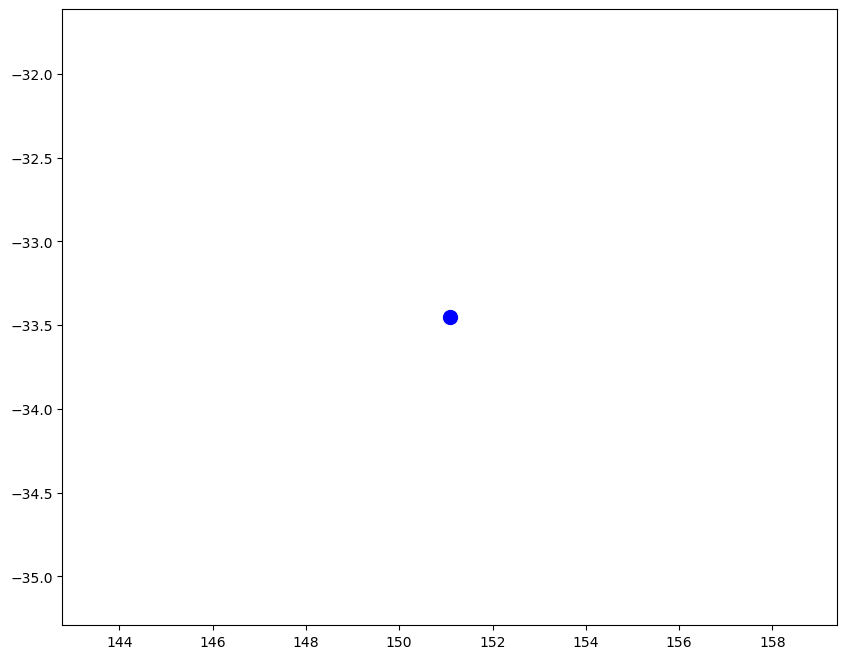

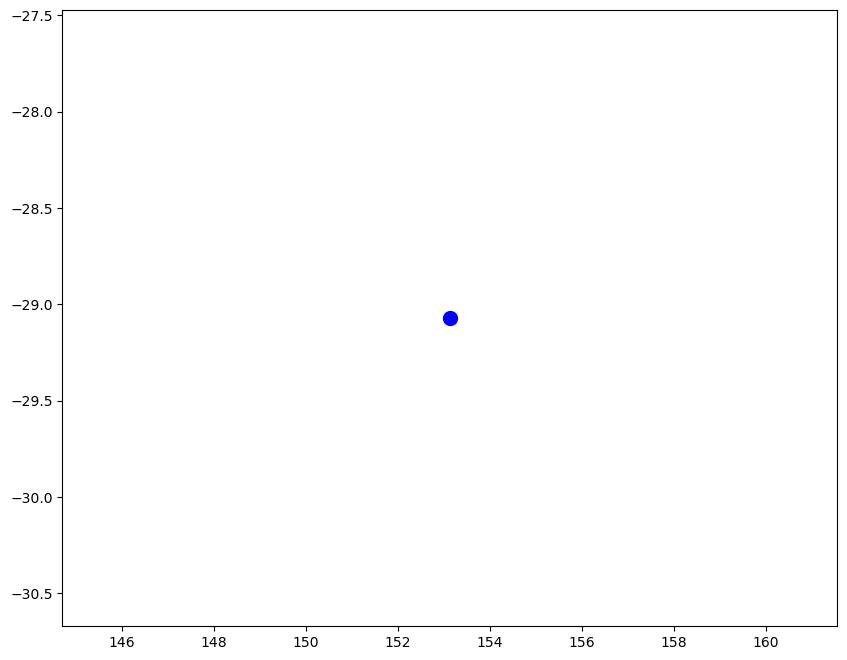

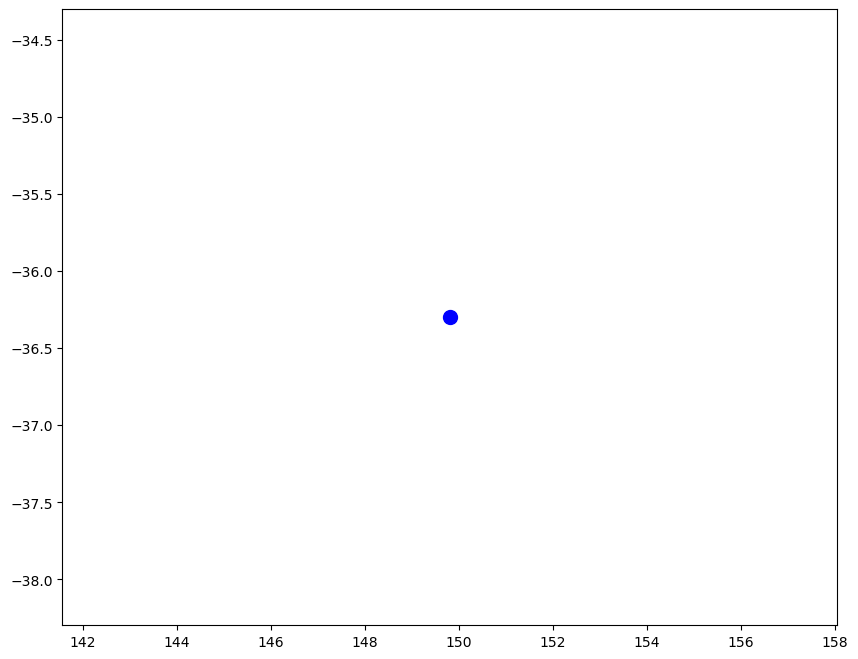

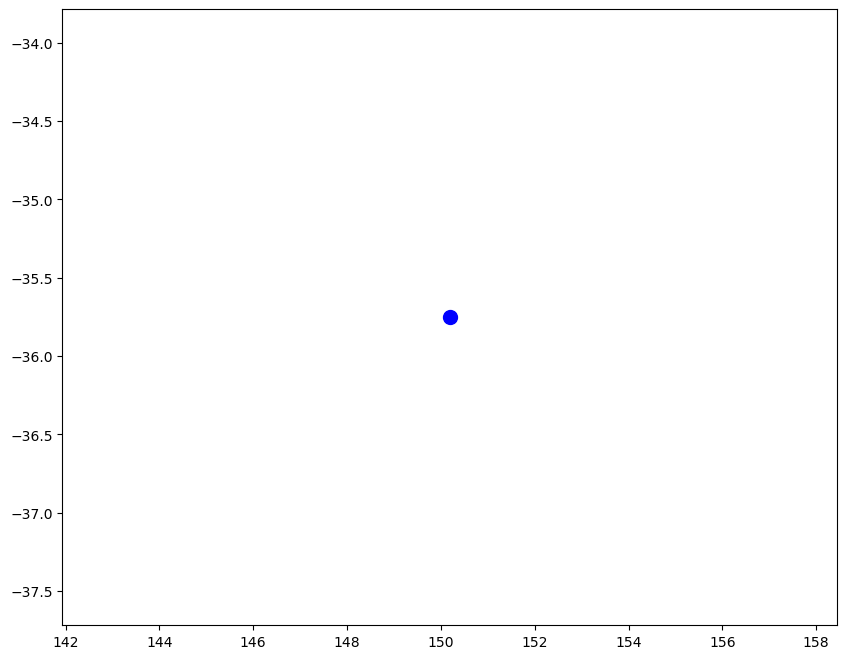

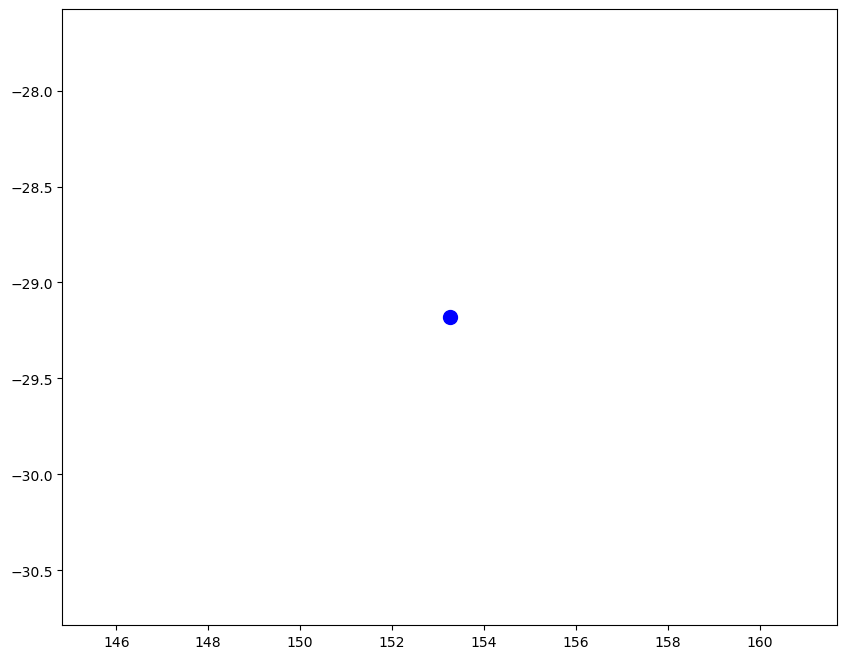

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde
from scipy.ndimage.filters import maximum_filter
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from scipy.sparse.csgraph import minimum_spanning_tree
import os

# Define paths
excel_file_path = '/Users/coolkarni/Desktop/OneDrive - The University of Melbourne/R1_99_New Events.xlsx'
csv_directory = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/'
output_directory = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Map_KDE_3Plots/'

# Load event names from the Excel file, skipping NaN values
event_df = pd.read_excel(excel_file_path,sheet_name='Sheet2')
event_names = event_df['Event'].dropna().unique()

# Initialize a list to store names of files that encountered errors
error_files = []

# Set distance threshold (e.g., in degrees, assuming coordinates are in lat/lon)
distance_threshold = 2  # Adjust as needed

# Haversine function to calculate distance between two lat/long coordinates
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Function to find the mean rainfall value of the 5 nearest stations
def find_nearest_stations_mean_rainfall(df, lon, lat, column):
    df['distance'] = df.apply(lambda row: haversine(lon, lat, row['Longitude'], row['Latitude']), axis=1)
    nearest_stations = df.nsmallest(5, 'distance')
    mean_rainfall = nearest_stations[column].mean()
    return mean_rainfall

# Process each event
for event_name in event_names:
    # Construct the path to the corresponding CSV file
    csv_file = os.path.join(csv_directory, f"{event_name}.csv")
    
    try:
        # Load the CSV file
        df = pd.read_csv(csv_file)

        # Filter out NaN values in latitude and longitude
        x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

        # Read the shapefile (assuming you have this in your directory)
        shapefile_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_shapefile.shp'
        gdf = gpd.read_file(shapefile_path)

        # Create a grid of points within the bounds of the shapefile
        minx, miny, maxx, maxy = gdf.total_bounds
        xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))
        positions = np.vstack([xi.ravel(), yi.ravel()])

        # Initialize lists to store coordinates of maxima and their annotations
        global_maxima_coords = []
        filtered_maxima_coords = []
        annotations = []

        # Iterate through each rainfall column and generate plots
        rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]

        for idx, col in enumerate(rainfall_columns, start=1):
            rainfall = x_cleaned[col]

            # Perform Gaussian KDE on the rainfall data
            values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
            kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
            zi = kde(positions).reshape(xi.shape)

            # Mask the grid to include only points inside the shapefile geometry
            points = np.vstack((xi.flatten(), yi.flatten())).T
            mask = np.array([gdf.contains(Point(point)).any() for point in points])
            mask = mask.reshape(xi.shape)
            zi = np.where(mask, zi, np.nan)

            # Find global maximum
            global_max_value = np.nanmax(zi)
            global_max_index = np.unravel_index(np.nanargmax(zi), zi.shape)
            global_max_x = xi[global_max_index]
            global_max_y = yi[global_max_index]

            # Find local maxima (peaks)
            local_max = maximum_filter(zi, size=10) == zi
            peaks = np.where(local_max, zi, np.nan)

            # Calculate 50th percentile value of global maximum
            percentile_90 = 0.5 * global_max_value

            # Remove peaks not within 90th percentile of global maximum
            peaks_filtered = np.where(peaks >= percentile_90, peaks, np.nan)

            # Calculate distances from global maximum to each local maximum
            local_max_coords = np.array(list(zip(xi[np.isfinite(peaks_filtered)], yi[np.isfinite(peaks_filtered)])))
            global_max_coords = np.array([[global_max_x, global_max_y]])
            
            # Check if there are any local maxima
            if local_max_coords.shape[0] > 0:
               # Calculate distances from global maximum to each local maximum
               distances = cdist(global_max_coords, local_max_coords)[0]

               # Apply distance threshold to filter out local maxima too close to the global maximum
               valid_indices = distances > distance_threshold
               filtered_peaks_coords = local_max_coords[valid_indices]
               filtered_peaks_values = peaks_filtered[np.isfinite(peaks_filtered)][valid_indices]

               # Proceed with processing filtered peaks...
               for i, (x, y) in enumerate(filtered_peaks_coords, start=1):
                    local_max_rainfall_mean = find_nearest_stations_mean_rainfall(x_cleaned, x, y, col)
                    if local_max_rainfall_mean >= 25.0:
                         filtered_maxima_coords.append((x, y))
                         annotations.append((x, y, f'{idx}'))
            else:
              # No local maxima found, skip this chunk
              print("No local maxima found, skipping filtering.")

            # Find mean rainfall value at the global maximum
            global_max_rainfall_mean = find_nearest_stations_mean_rainfall(x_cleaned, global_max_x, global_max_y, col)

            # Check if global maxima exceeds 25.00 mm threshold
            if global_max_rainfall_mean >= 25.00:
                global_maxima_coords.append((global_max_x, global_max_y))
                annotations.append((global_max_x, global_max_y, f'{idx}'))

                # Store filtered local maxima (peaks) that also exceed 25.00 mm threshold
                for i, (x, y) in enumerate(filtered_peaks_coords, start=1):
                    local_max_rainfall_mean = find_nearest_stations_mean_rainfall(x_cleaned, x, y, col)
                    if local_max_rainfall_mean >= 25.0:
                        filtered_maxima_coords.append((x, y))
                        annotations.append((x, y, f'{idx}'))
            else:
                # If global maxima don't exceed threshold, but some local maxima do, plot those
                for i, (x, y) in enumerate(filtered_peaks_coords, start=1):
                    local_max_rainfall_mean = find_nearest_stations_mean_rainfall(x_cleaned, x, y, col)
                    if local_max_rainfall_mean >= 25.0:
                        filtered_maxima_coords.append((x, y))
                        annotations.append((x, y, f'{idx}'))

        # Combine global and filtered local maxima coordinates
        all_maxima_coords = np.array(global_maxima_coords + filtered_maxima_coords)

        # Define a small deviation threshold (in degrees)
        deviation_threshold = 0.05  # Adjust as needed

        # Divide the map into longitude sections and count points in each section
        long_sections = [140, 144, 148, 154]  # Define longitude section boundaries
        section_counts = [0] * (len(long_sections) - 1)
        
        # Set to store unique points that are counted
        counted_points = set()

        for lon, lat in all_maxima_coords:
           for i in range(len(long_sections) - 1):
            # Check if the point is within the section range
               if long_sections[i] - deviation_threshold < lon < long_sections[i + 1] + deviation_threshold:
                   # Use tuple of coordinates to track unique points
                   counted_points.add((lon, lat))
                   section_counts[i] += 1

        # Check if at least two sections satisfy the criteria
        point_threshold = 1
        satisfying_sections = sum(count > point_threshold for count in section_counts)
        perform_clustering = satisfying_sections >= 2

        if perform_clustering:
            # Perform K-means clustering with 2 clusters as a default
            kmeans = KMeans(n_clusters=2, random_state=0)
            cluster_labels = kmeans.fit_predict(all_maxima_coords)

            # Initialize dictionaries to store points for each cluster
            clusters = {label: [] for label in set(cluster_labels)}

            # Sort points into their respective clusters
            for label, point in zip(cluster_labels, all_maxima_coords):
                clusters[label].append(point)

            # Plotting code
            fig, ax = plt.subplots(figsize=(10, 8))
            
            # Function to connect points within each cluster using Minimum Spanning Tree
            def connect_points_within_cluster(points, ax, color):
                if len(points) < 2:
                    return
                # Compute the distance matrix
                distance_matrix = cdist(points, points)
                # Compute the MST using the distance matrix
                mst = minimum_spanning_tree(distance_matrix).toarray()
                # Plot the MST
                for i in range(len(points)):
                    for j in range(len(points)):
                        if mst[i, j] > 0:
                            ax.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], linestyle='-', color=color, alpha=0.5)

            # Plot points and lines for each cluster
            for label in clusters:
                cluster_points = clusters[label]

                # Choose a color based on the cluster label
                color = 'red' if label == 0 else 'blue'

                # Plot points
                for x, y in cluster_points:
                    ax.plot(x, y, marker='o', color=color, markersize=10)

                # Connect points within the cluster using MST
                connect_points_within_cluster(cluster_points, ax, color)

        else:
            # If no meaningful clusters are found, plot the maxima without clustering
            fig, ax = plt.subplots(figsize=(10, 8))
            
            # Plot points for maxima
            for i, (x, y) in enumerate(all_maxima_coords):
               ax.plot(x, y, marker='o', color='blue', markersize=10)

            # Connect points within the maxima using MST
            connect_points_within_cluster(all_maxima_coords, ax, 'blue')

        # If there's only one maxima point, just plot it
        if len(all_maxima_coords) == 1:
           fig, ax = plt.subplots(figsize=(10, 8))
           
           for x, y in all_maxima_coords:
               ax.plot(x, y, marker='o', color='blue', markersize=10)

        # Annotate points with numbers
        for x, y, label in annotations:
            ax.text(x, y, label, fontsize=10, ha='center', va='bottom', color='black', weight='bold')

        

        # Save the output plot
        plt.savefig(os.path.join(output_directory, f"{event_name}_output.png"))
        plt.close()

    except Exception as e:
        # Append the event name to the error files list
        error_files.append(event_name)
        print(f"Error processing {event_name}: {e}")

# If there are any error files, save them to the new sheet in the existing Excel file
if error_files:
    # Load the existing data from the specified sheet
    try:
        existing_df = pd.read_excel(excel_file_path, sheet_name='IDW', engine='openpyxl')
    except ValueError:
        # If the sheet doesn't exist, create an empty DataFrame
        existing_df = pd.DataFrame()

    # Create a DataFrame for the new error files
    new_errors_df = pd.DataFrame({'Error Files': error_files})

    # Concatenate the existing data with the new error data
    combined_df = pd.concat([existing_df, new_errors_df], ignore_index=True)

    # Save the combined DataFrame back to the same sheet
    with pd.ExcelWriter(excel_file_path, mode='a', engine='openpyxl') as writer:
        combined_df.to_excel(writer, sheet_name='IDW', index=False)
print("Processing complete. Check the output directory for results and the Excel file for any errors.")


No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local ma

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1441/780937203.py:242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 8))
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1441/780937203.py:230: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 8))


No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local maxima found, skipping filtering.
No local ma

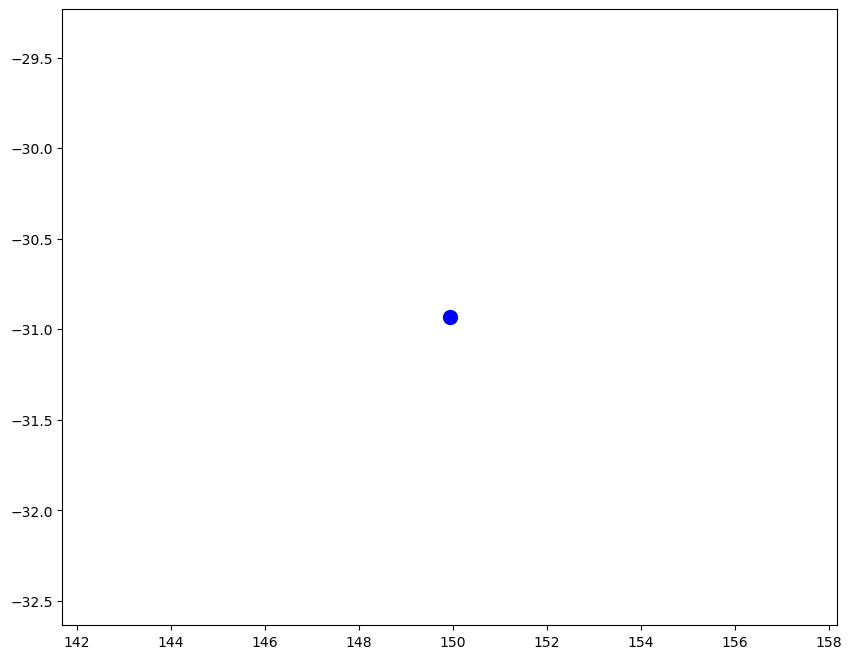

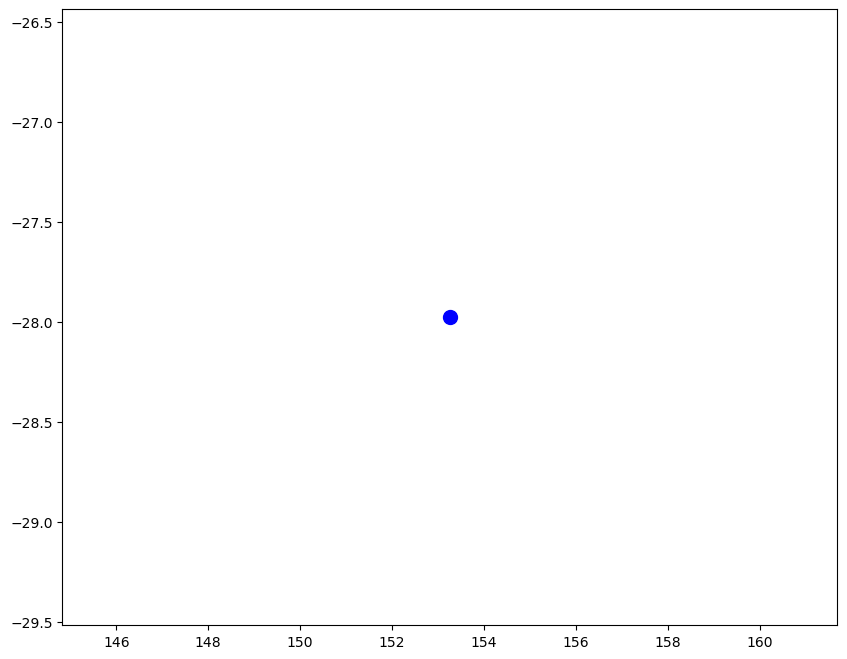

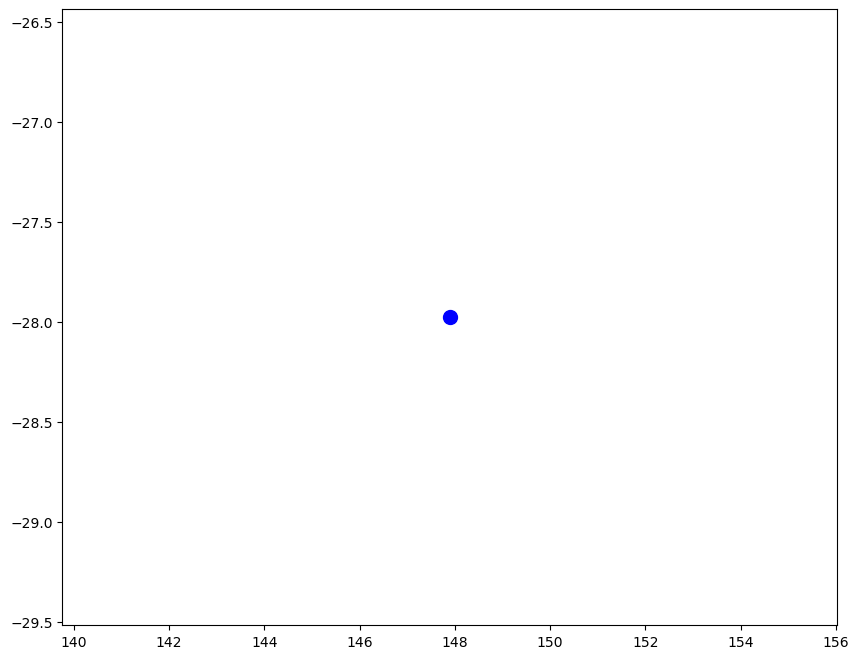

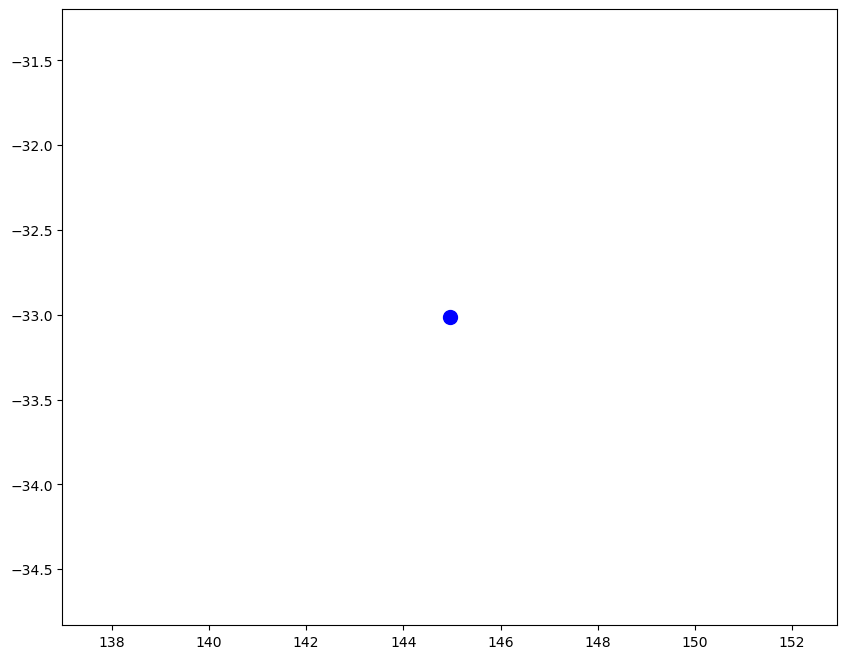

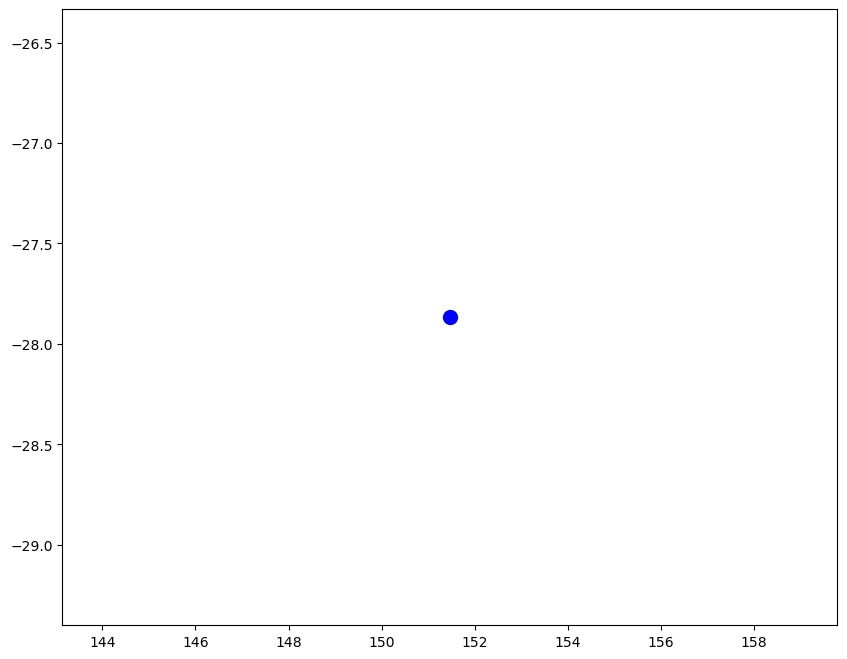

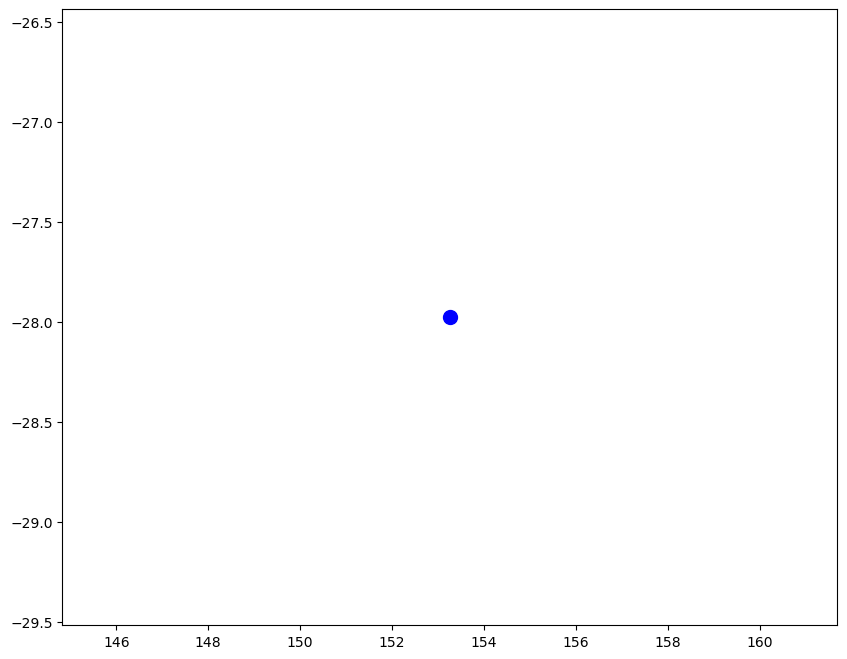

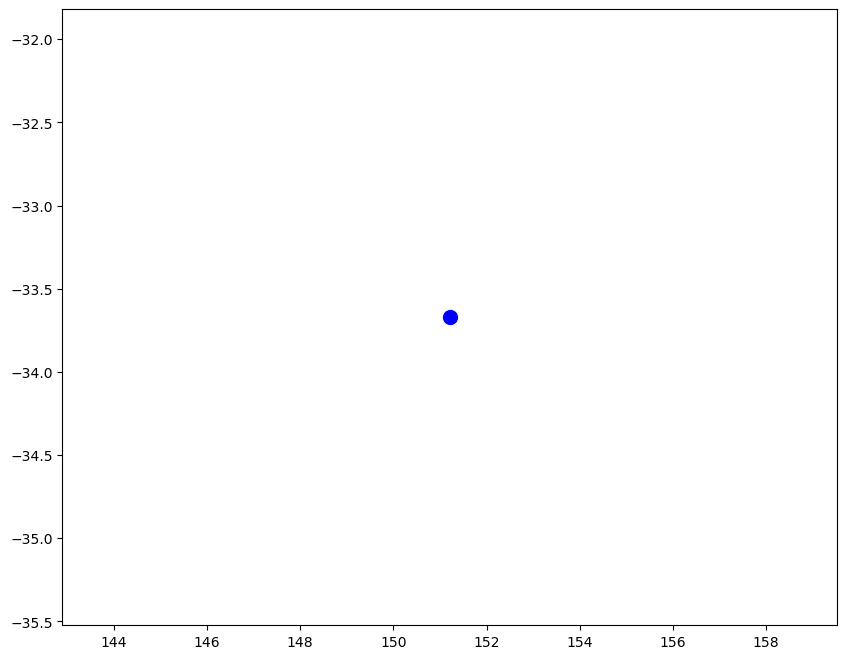

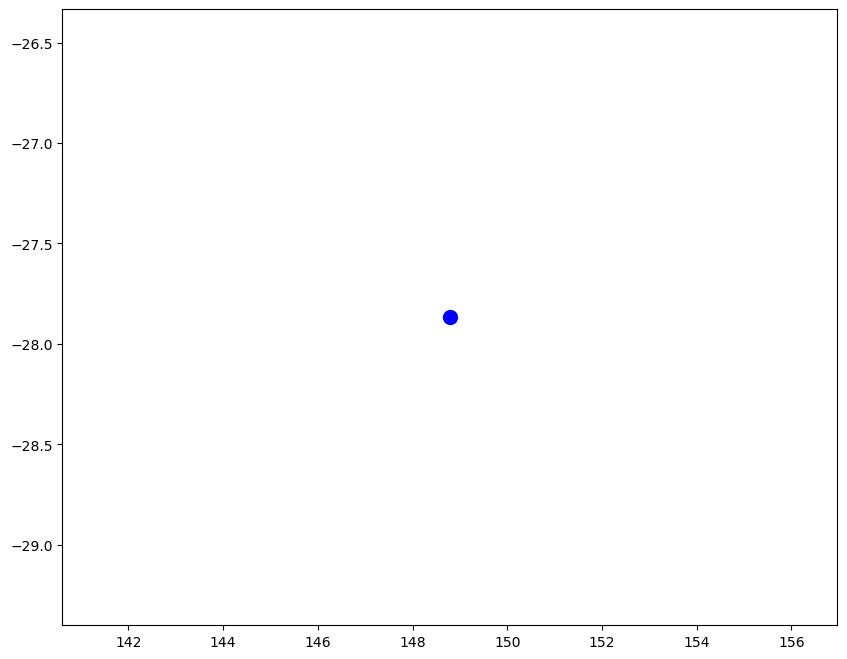

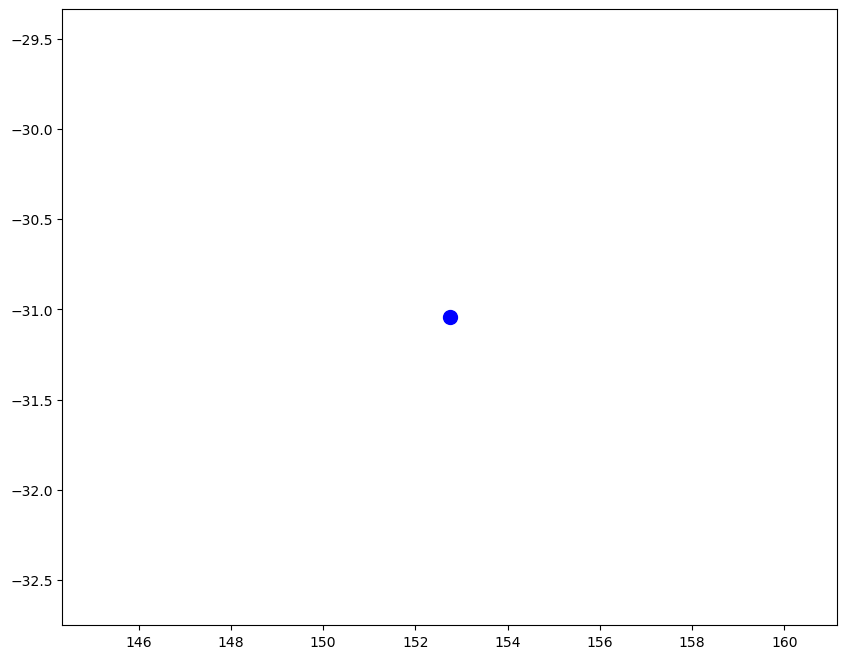

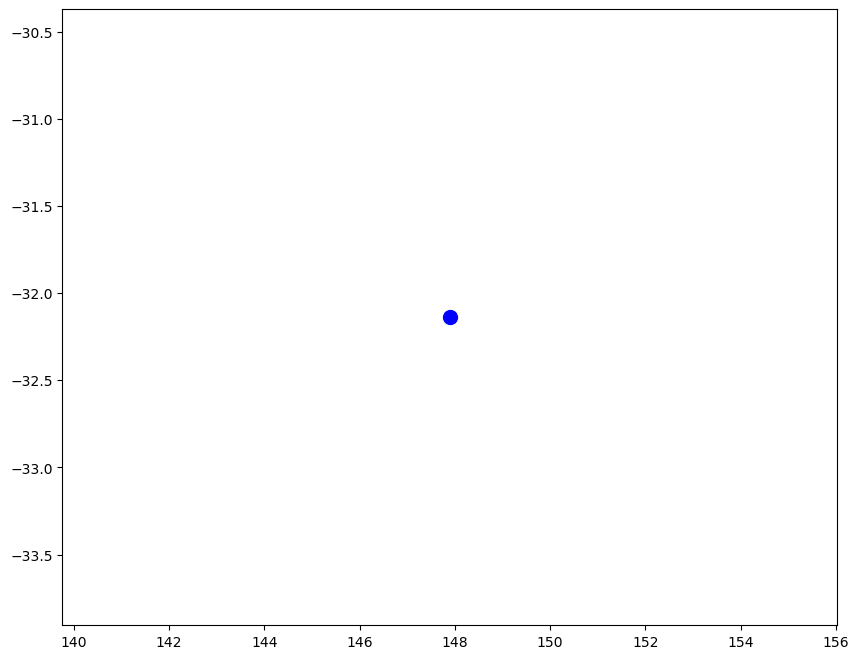

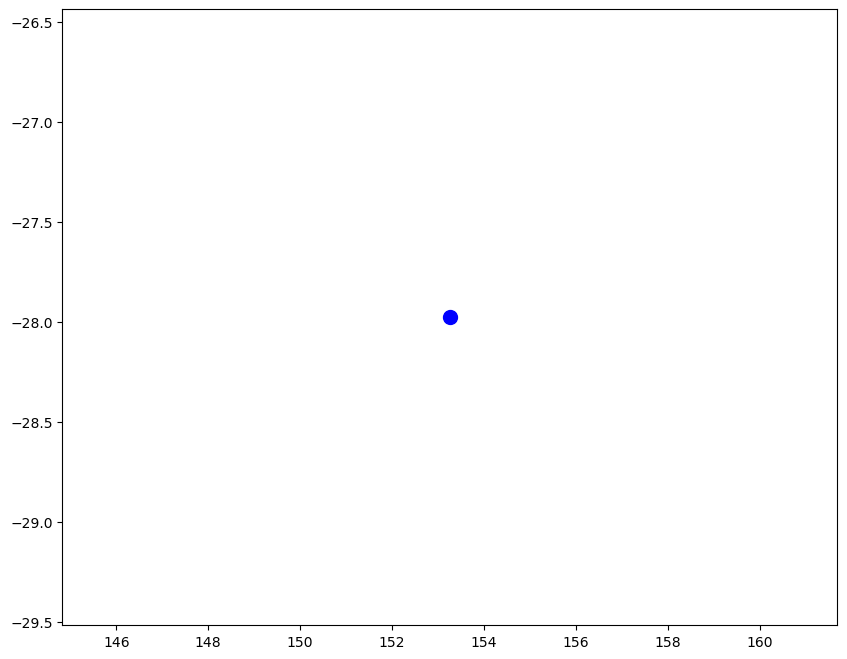

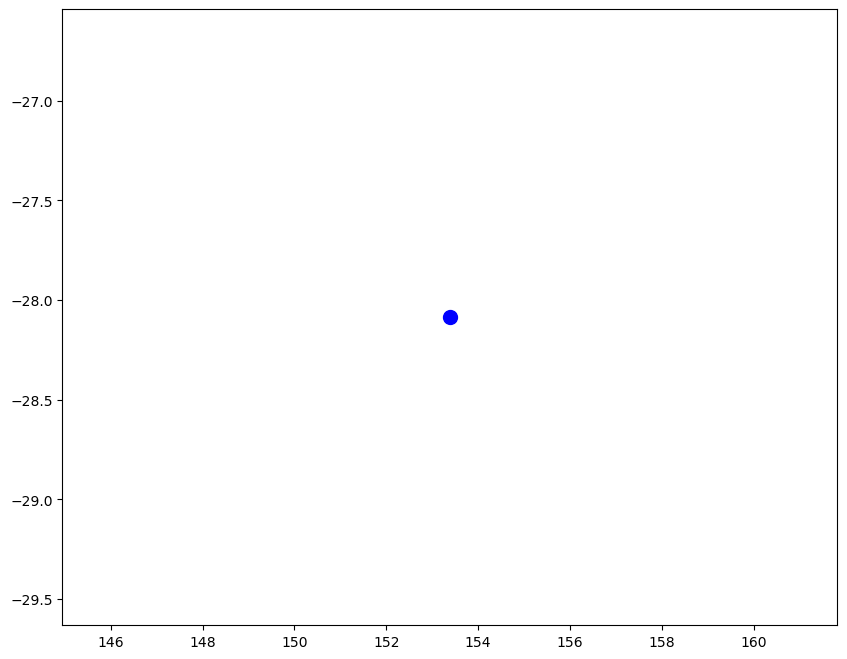

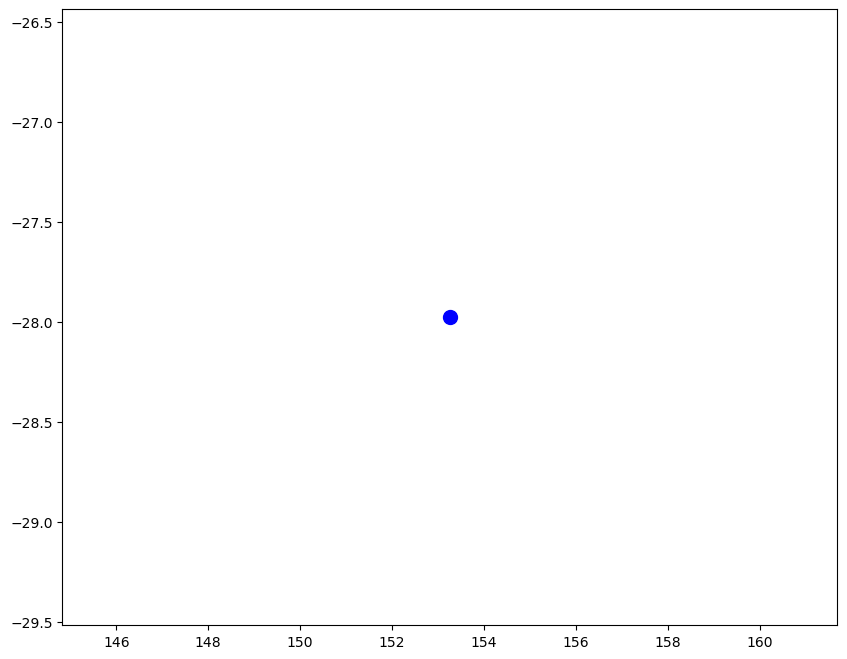

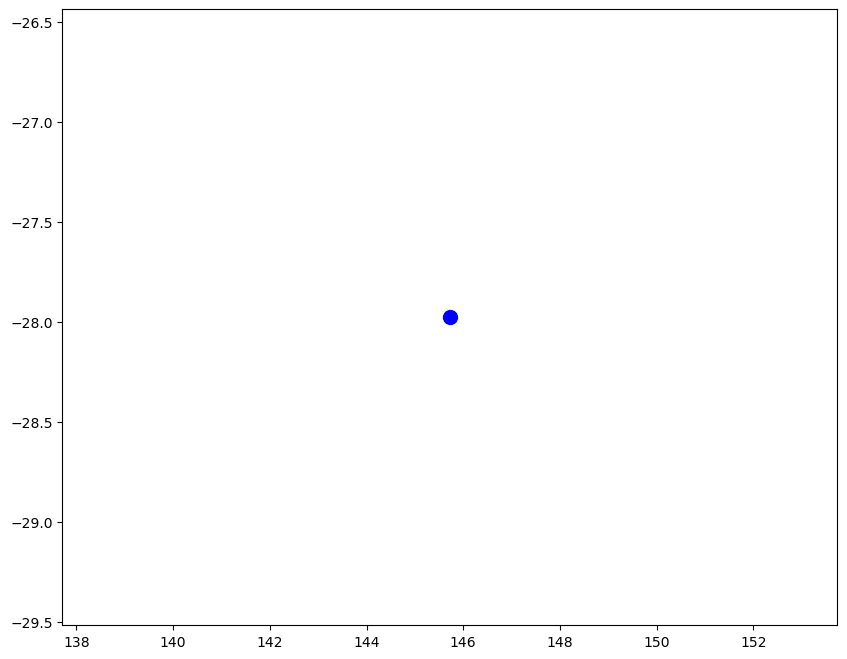

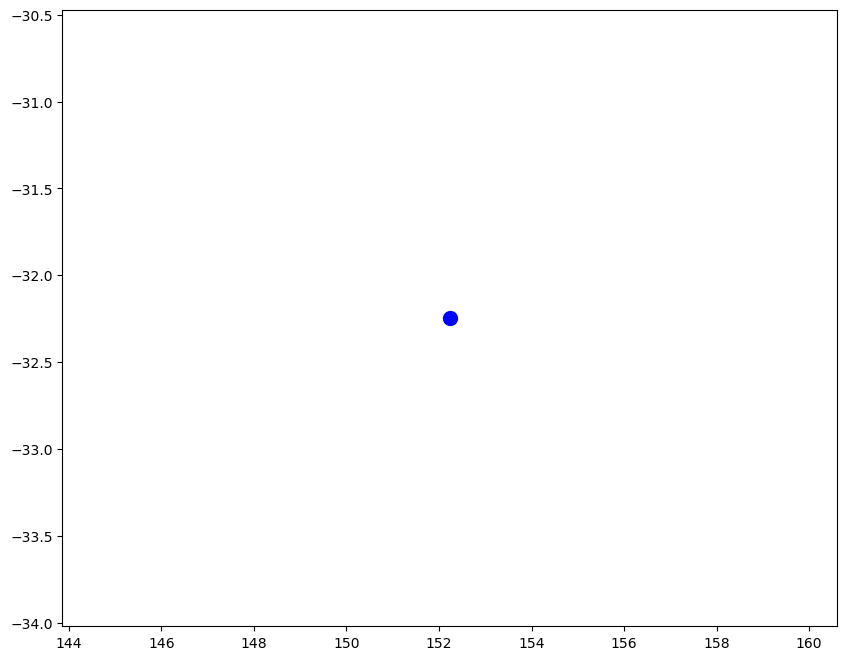

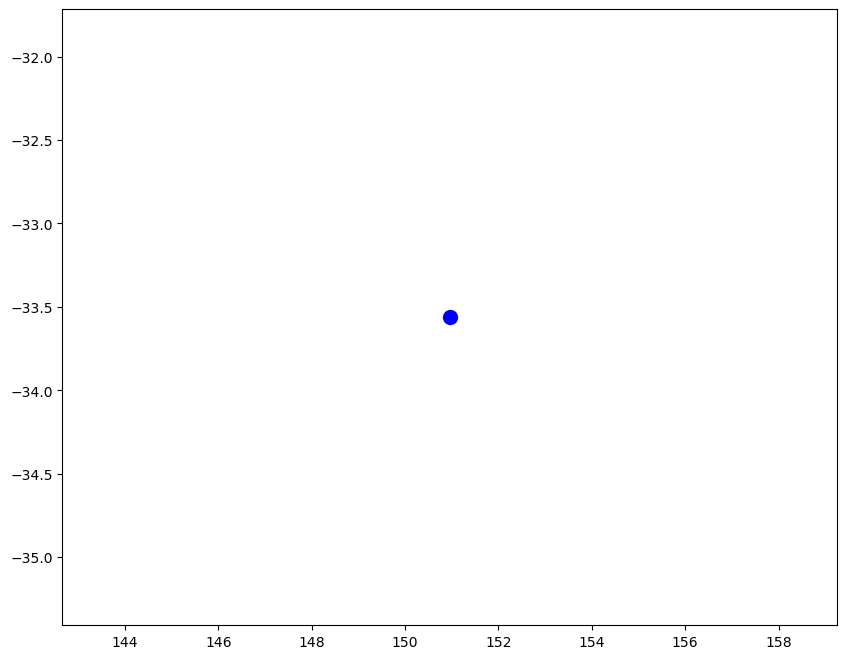

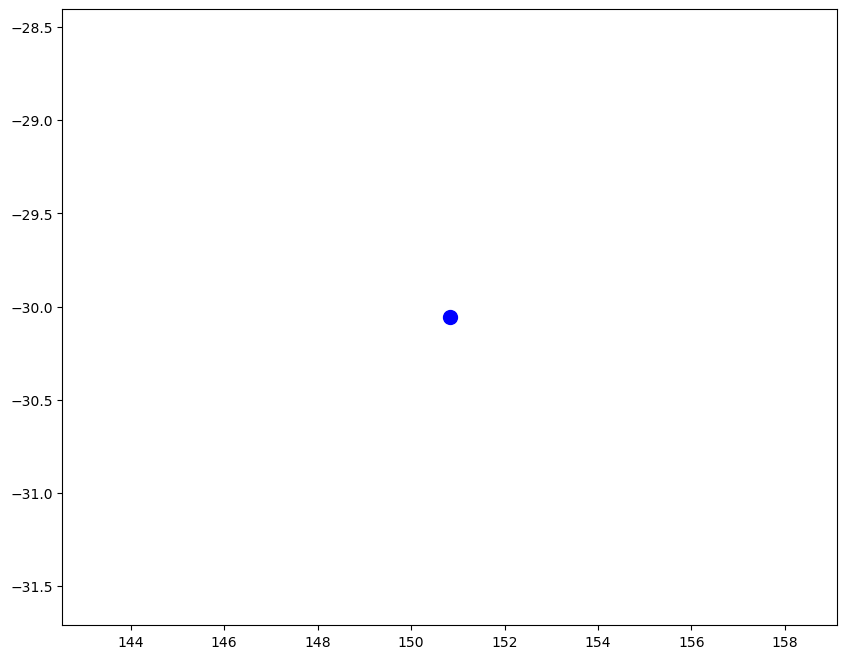

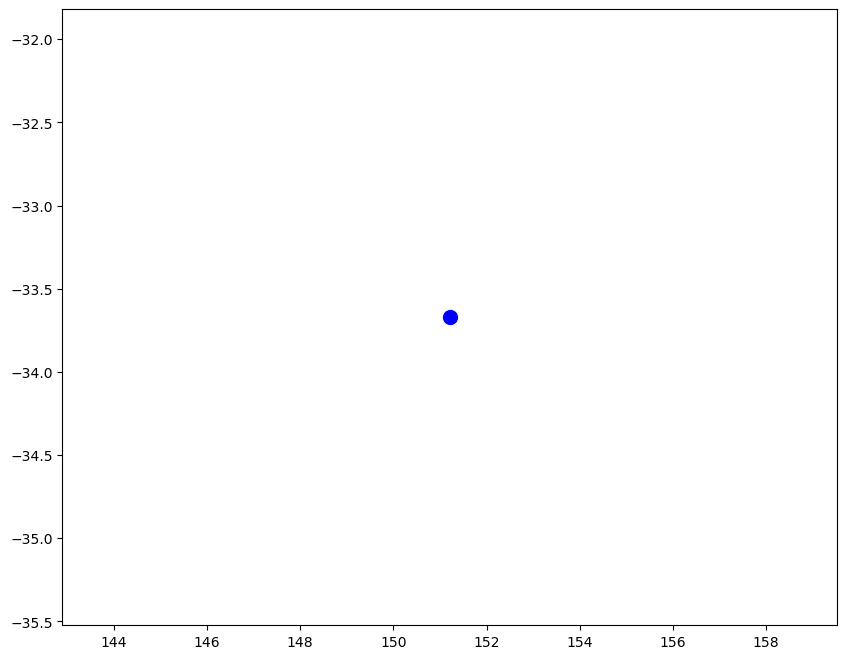

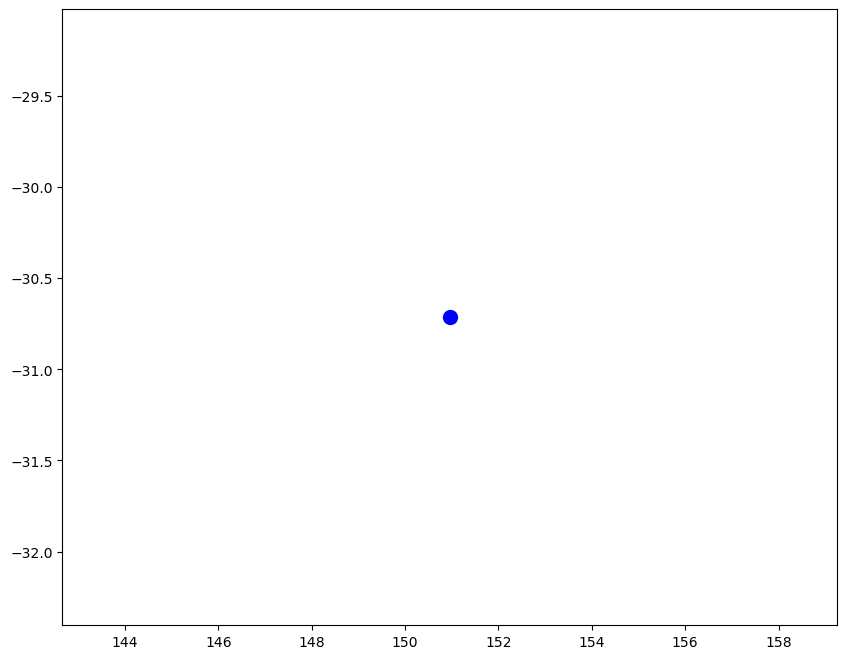

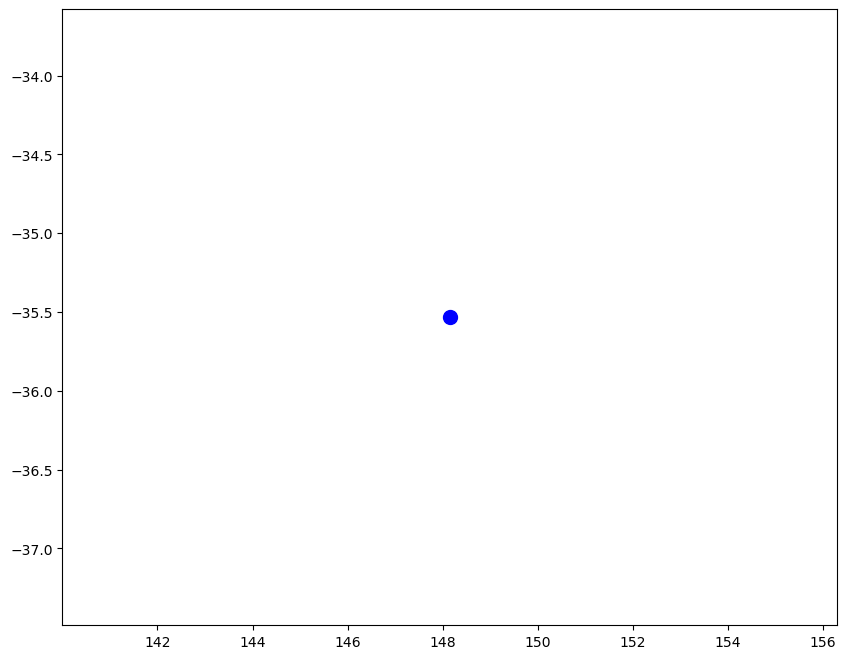

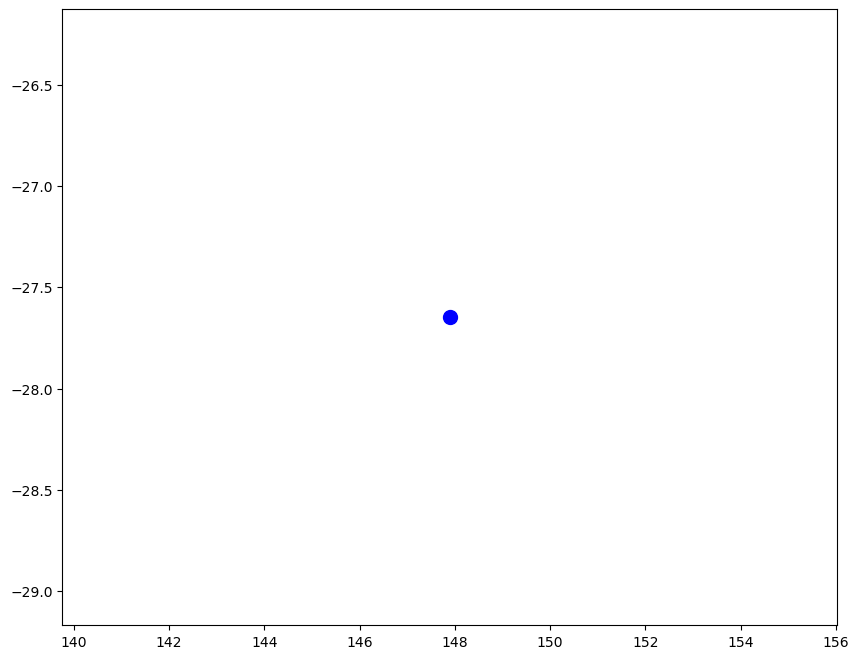

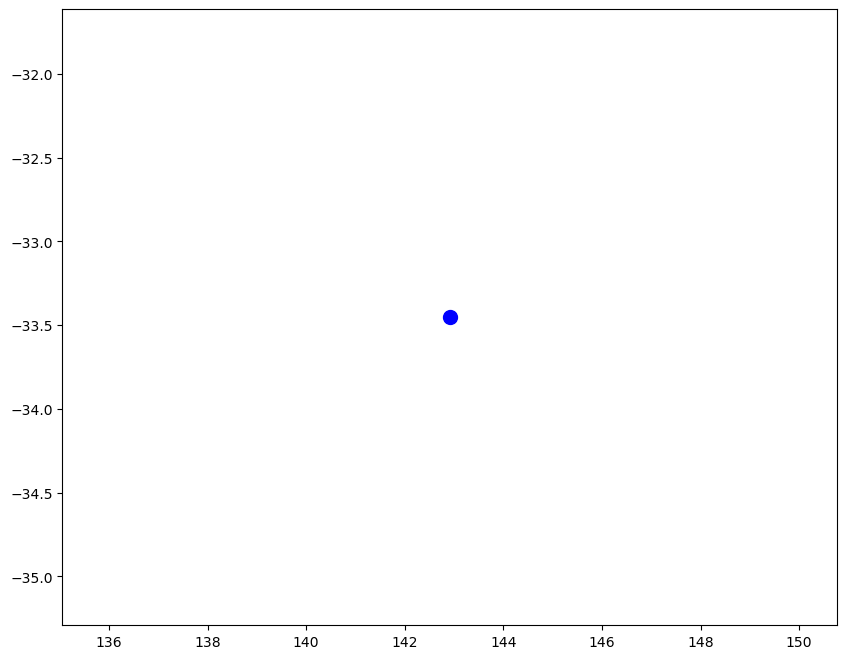

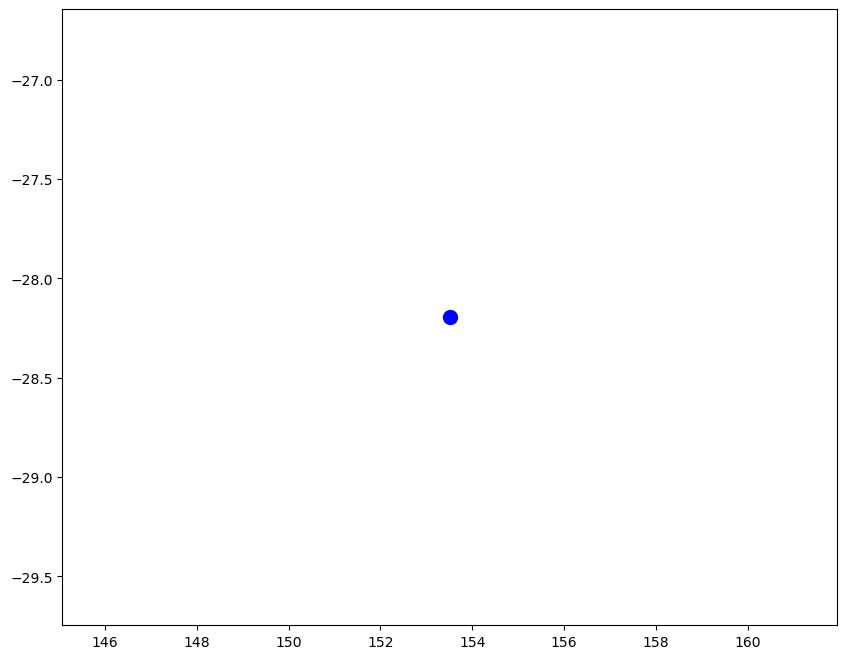

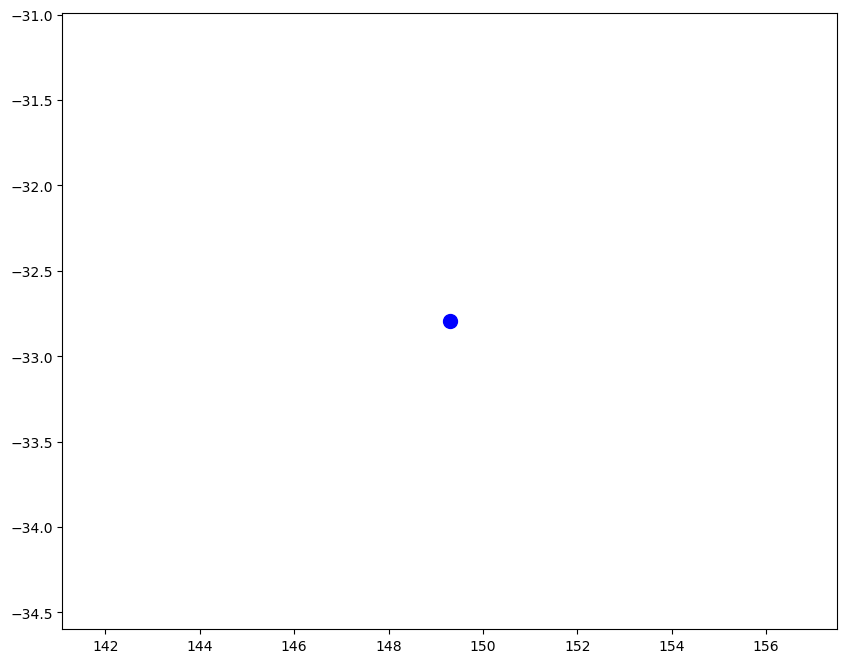

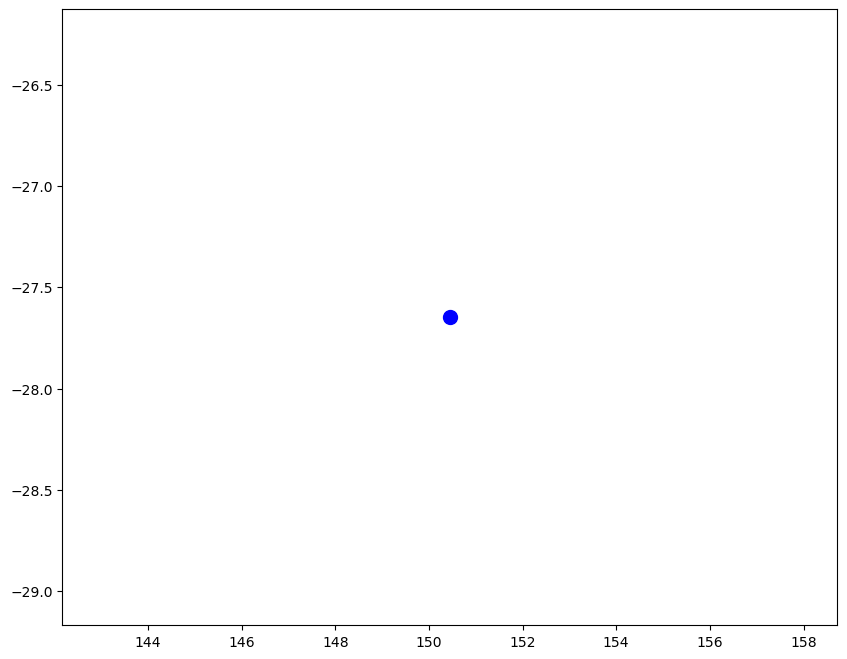

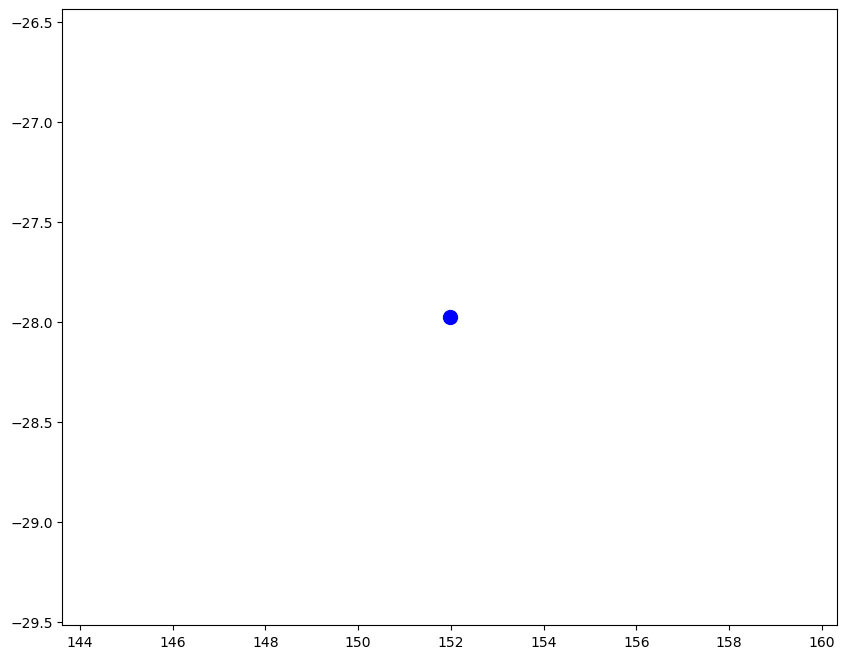

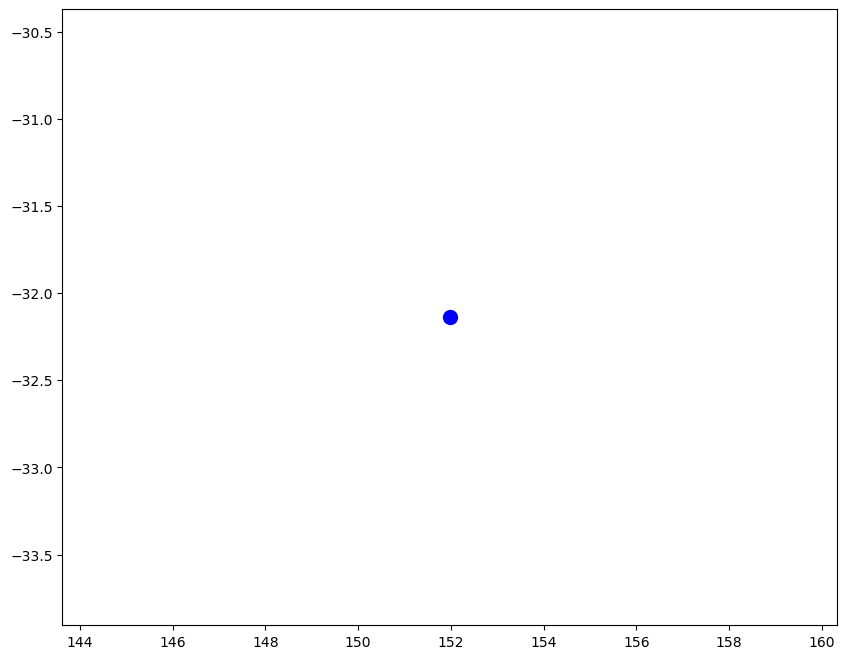

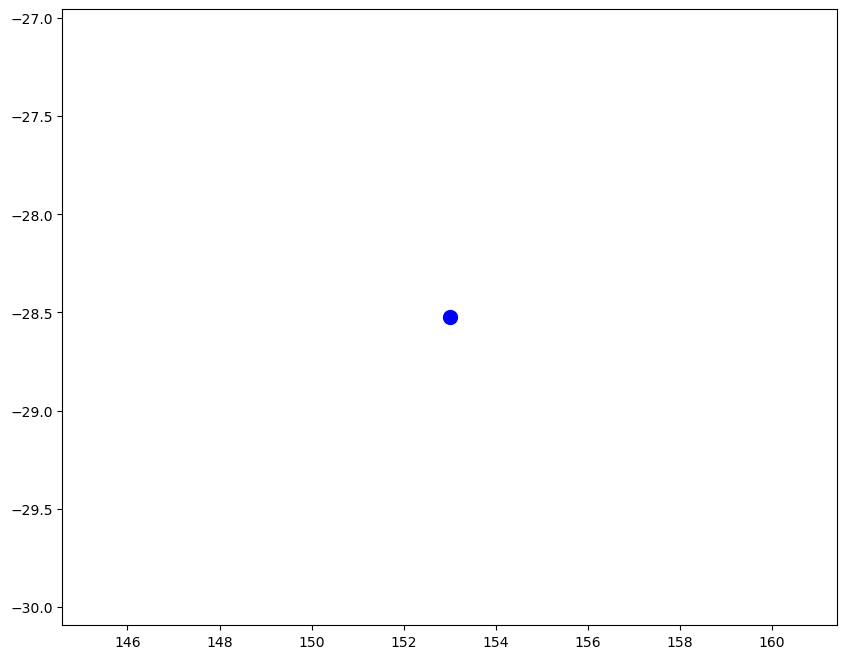

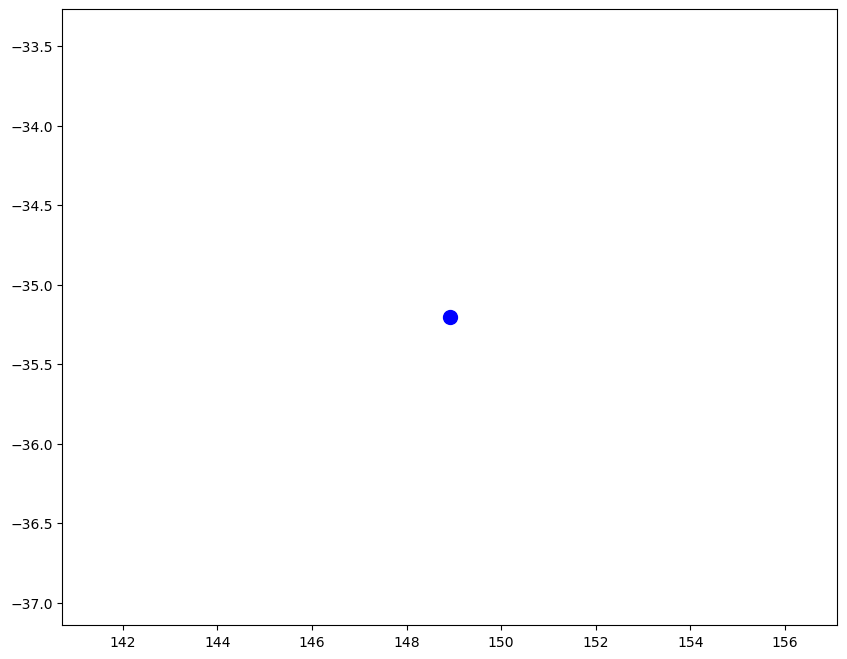

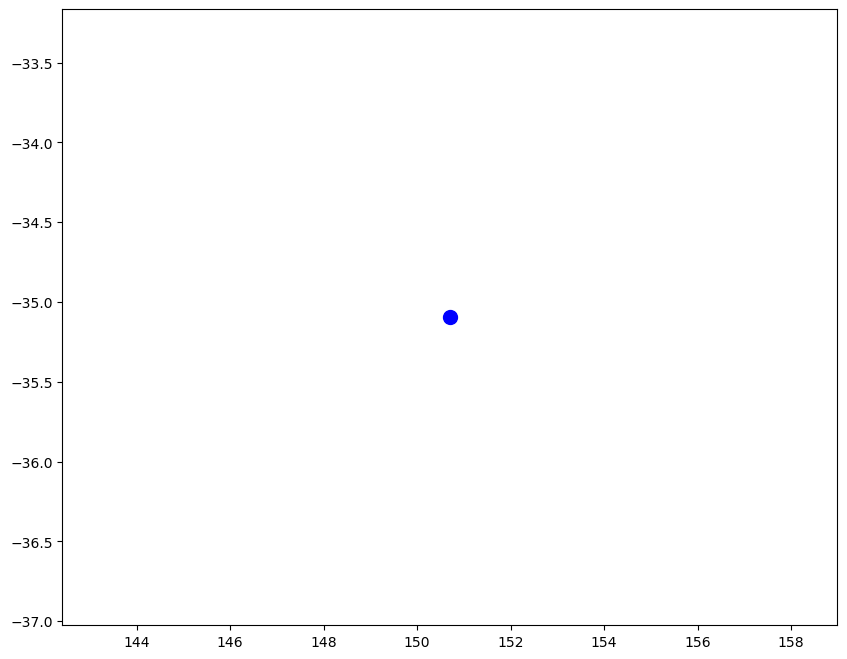

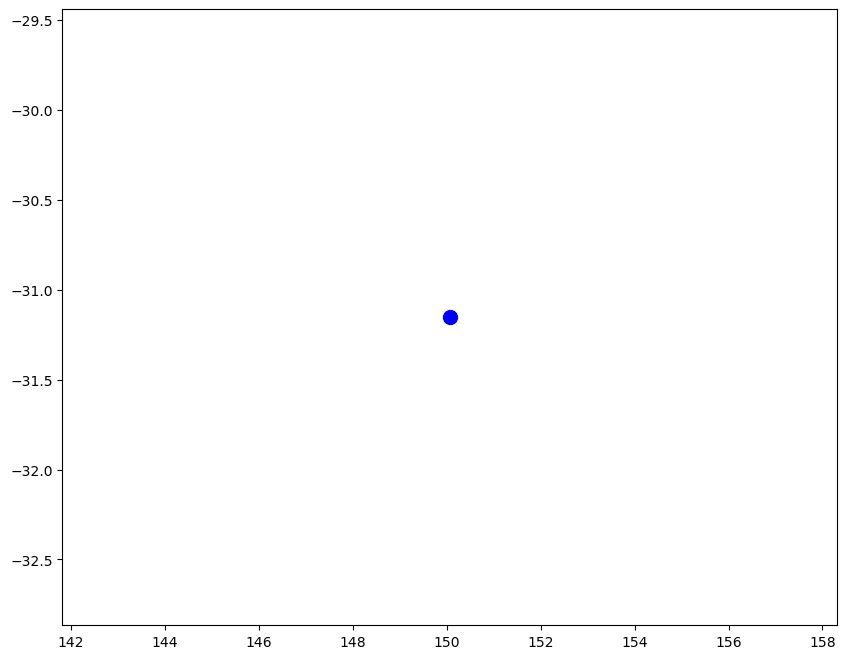

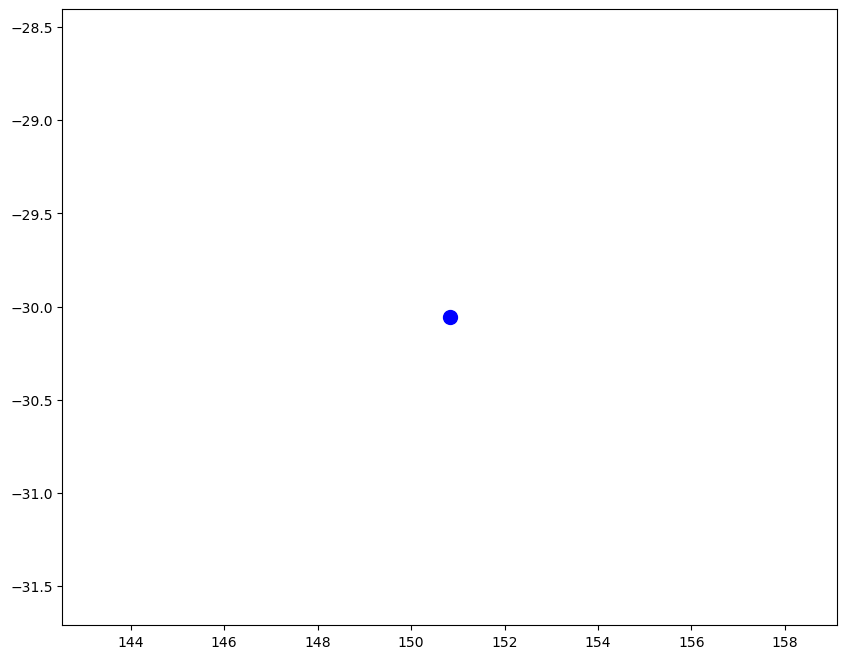

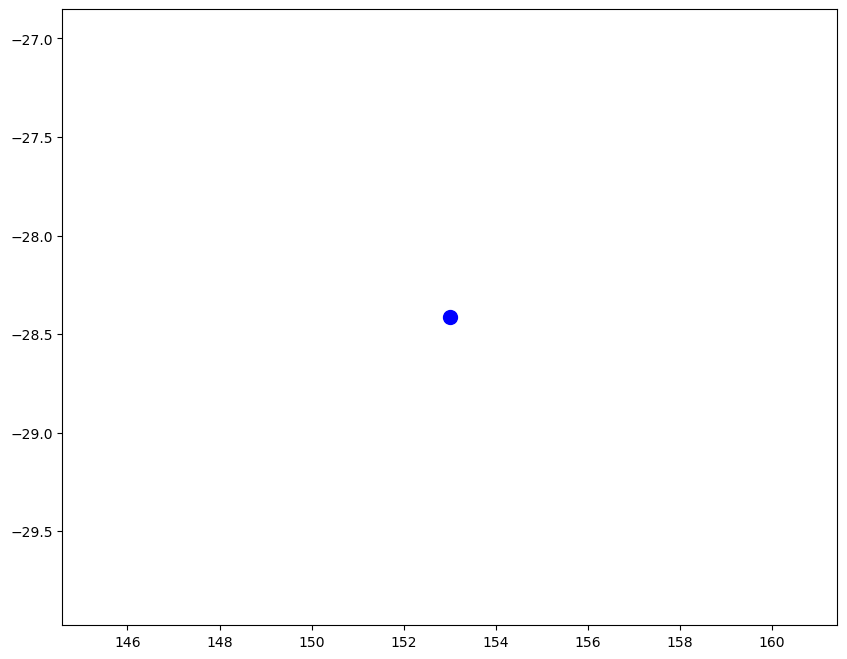

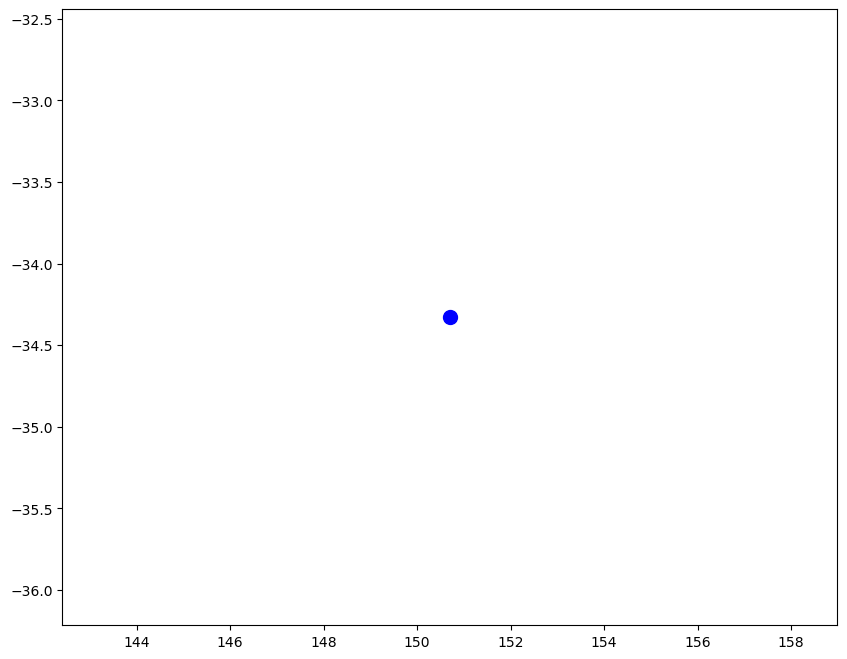

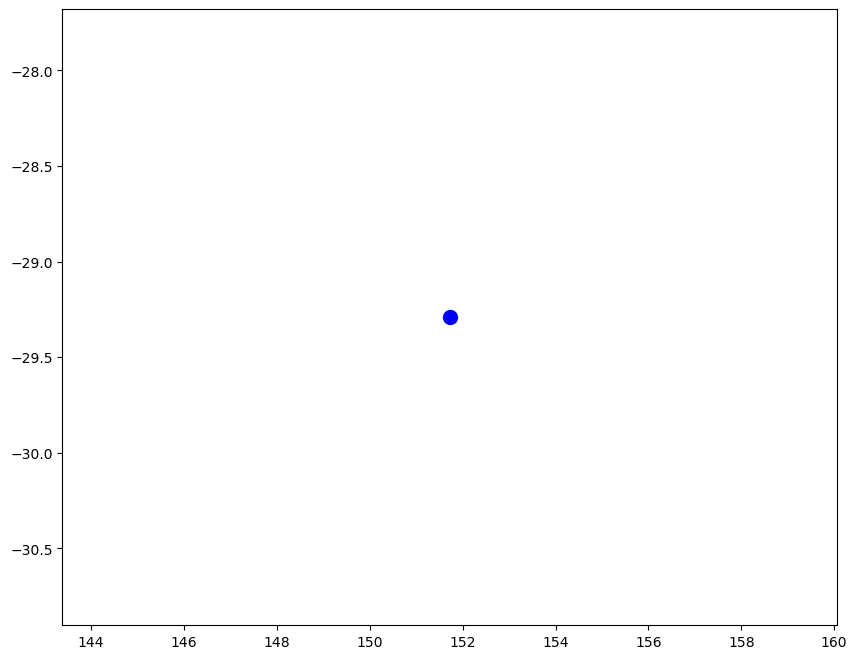

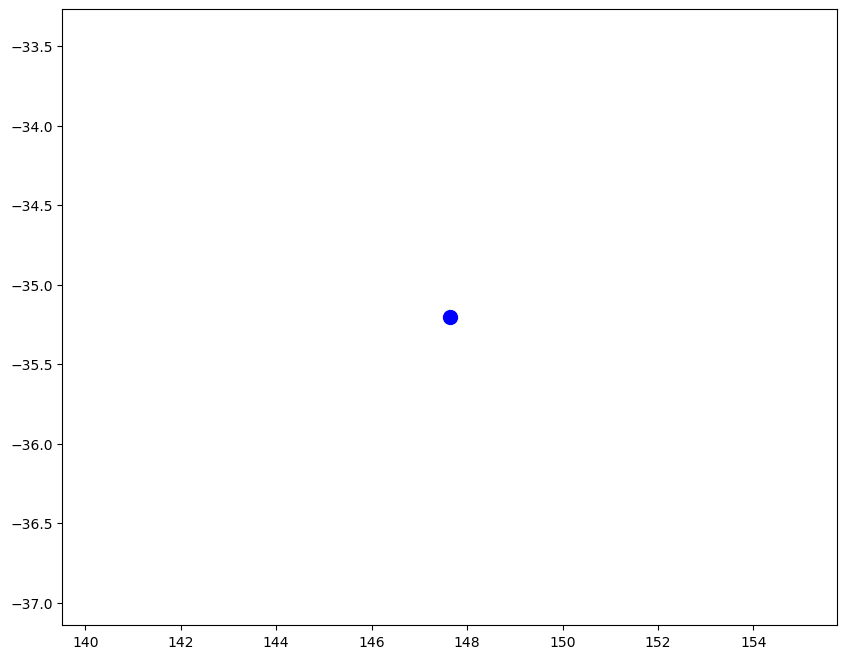

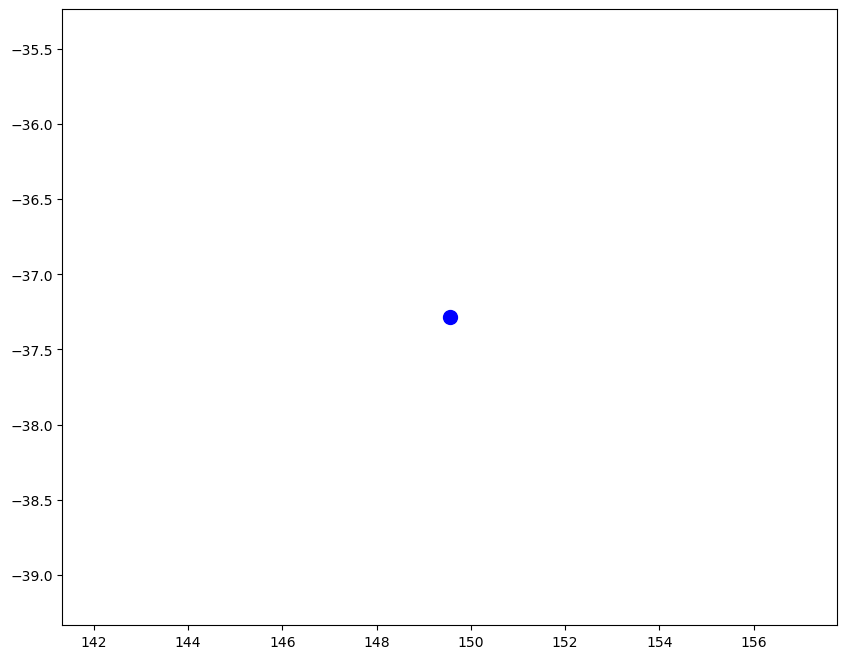

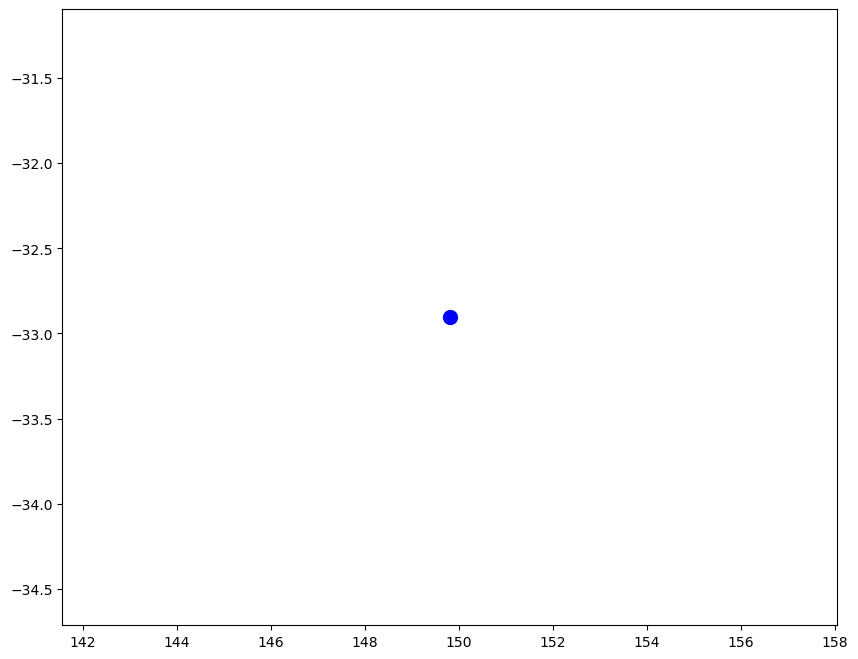

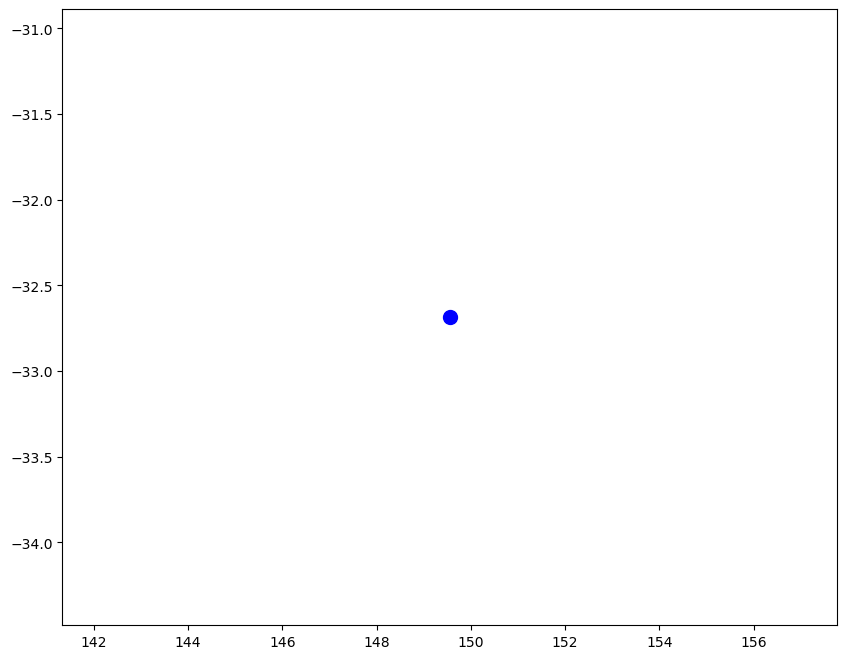

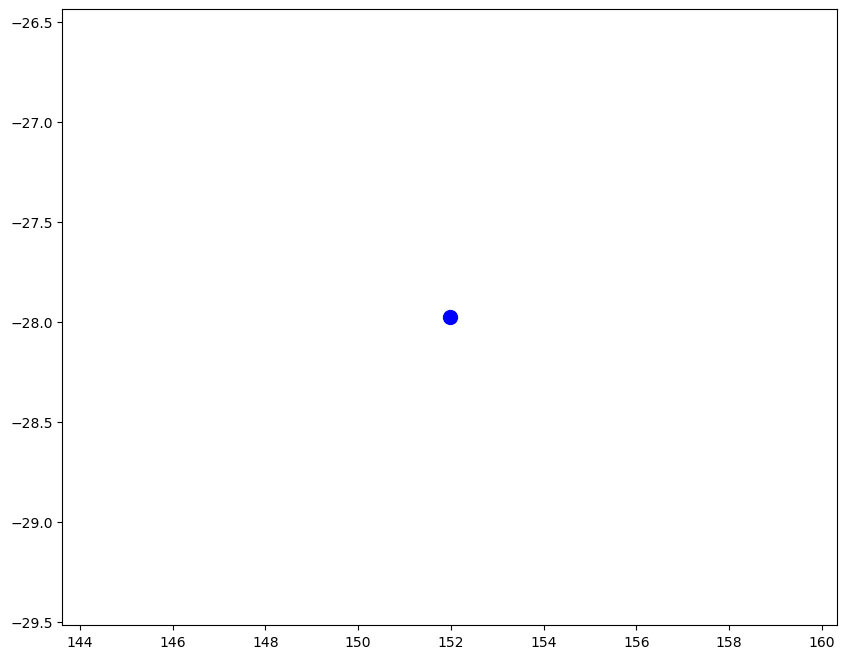

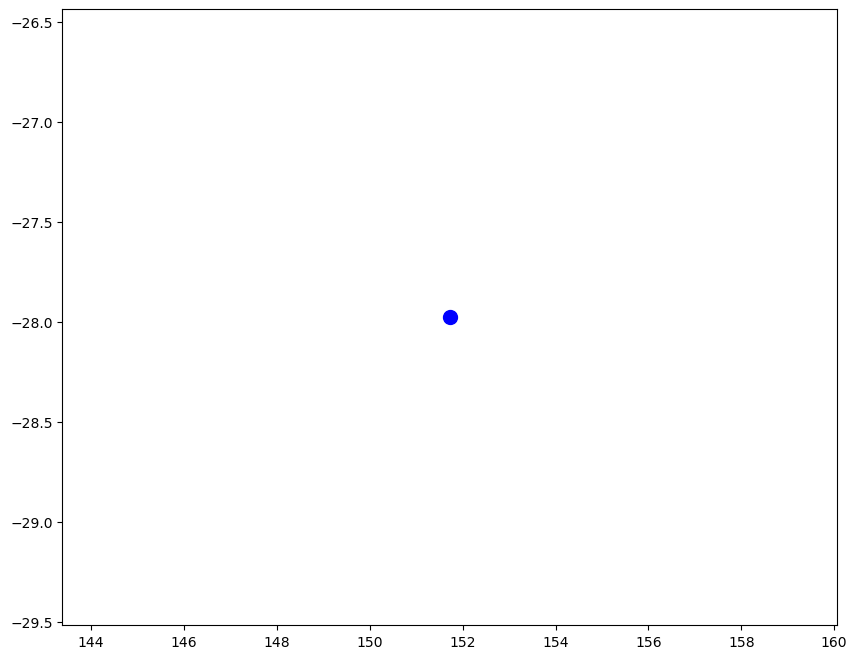

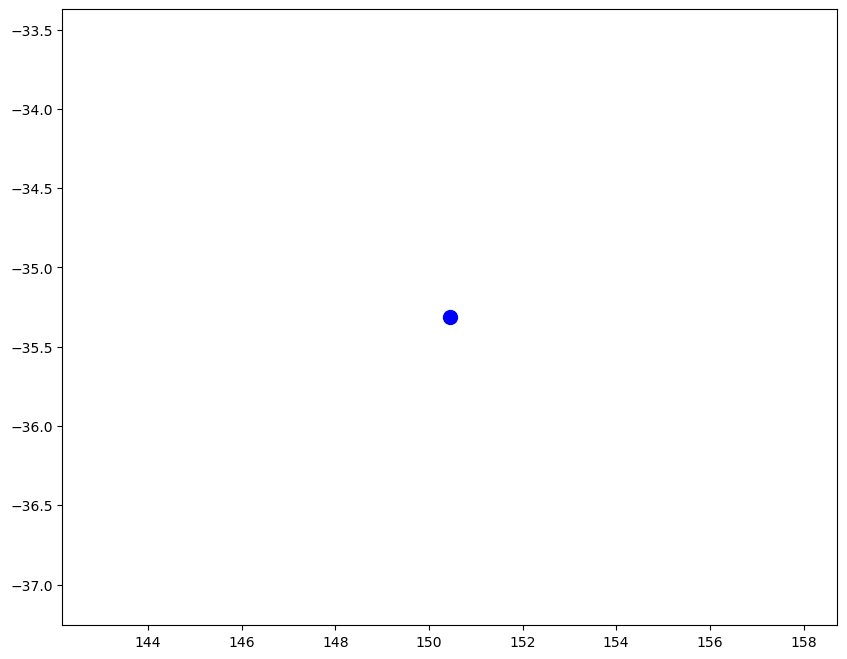

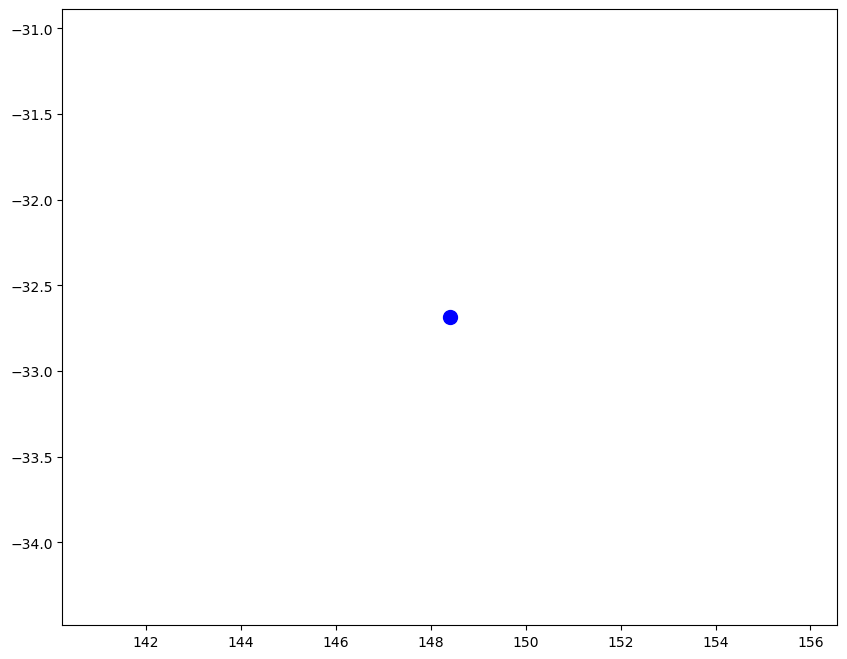

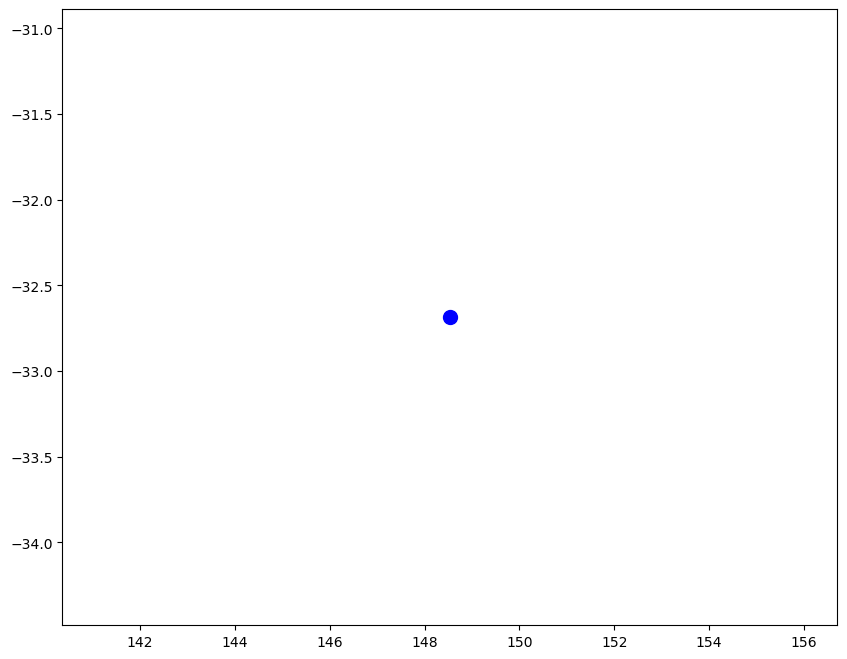

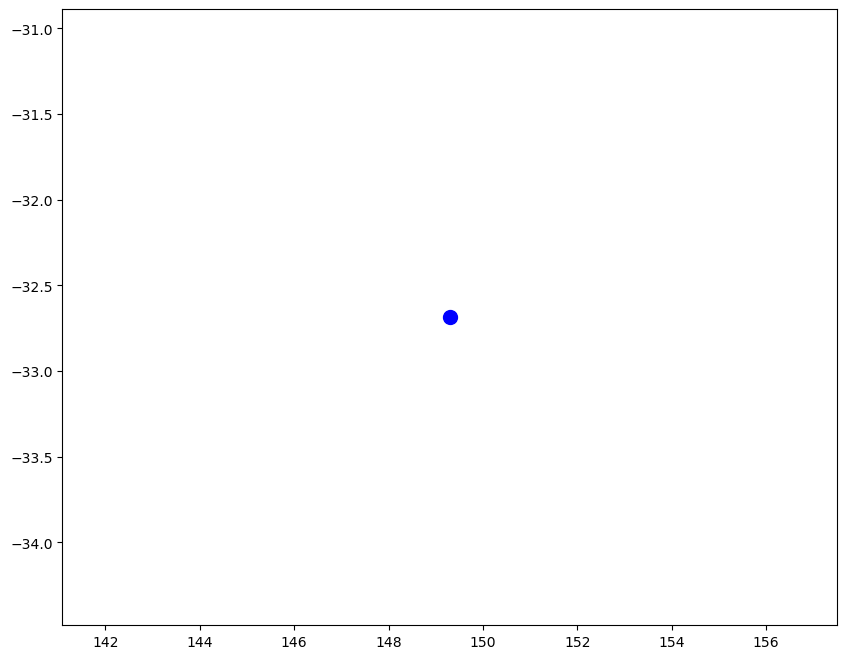

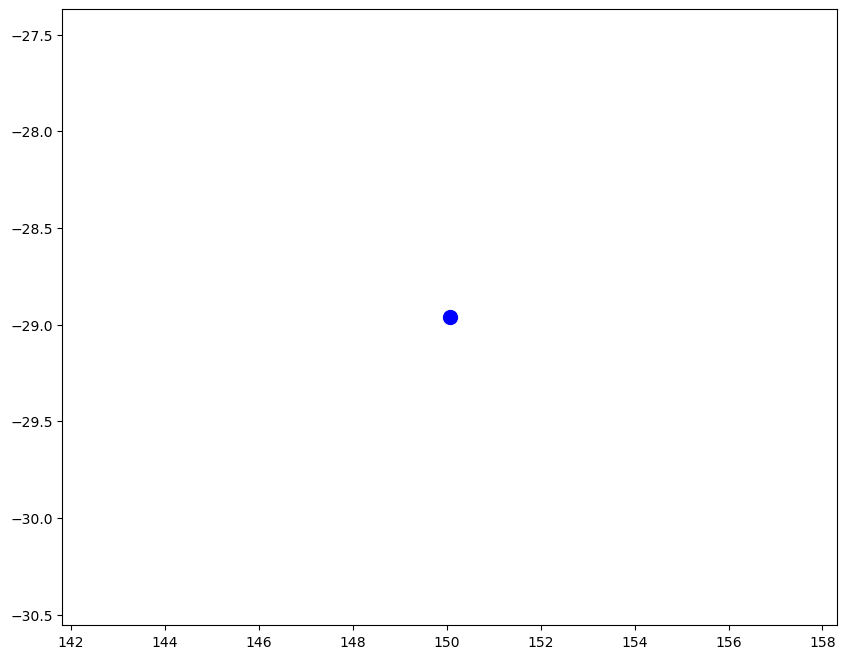

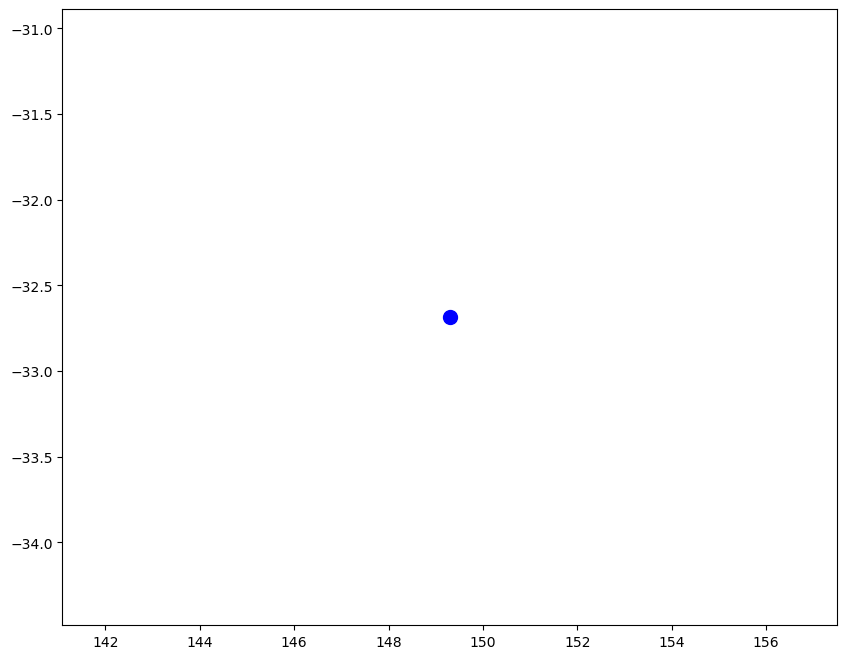

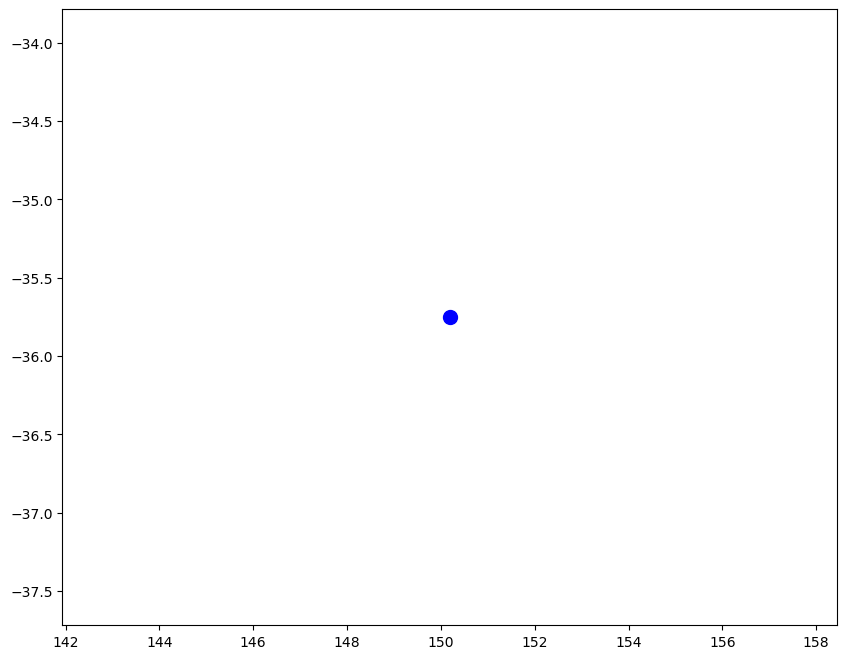

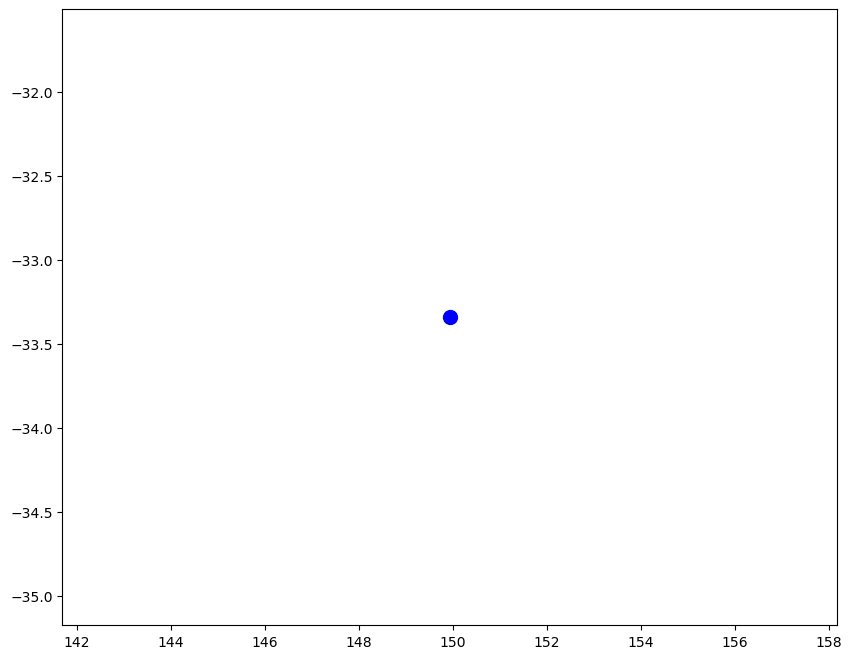

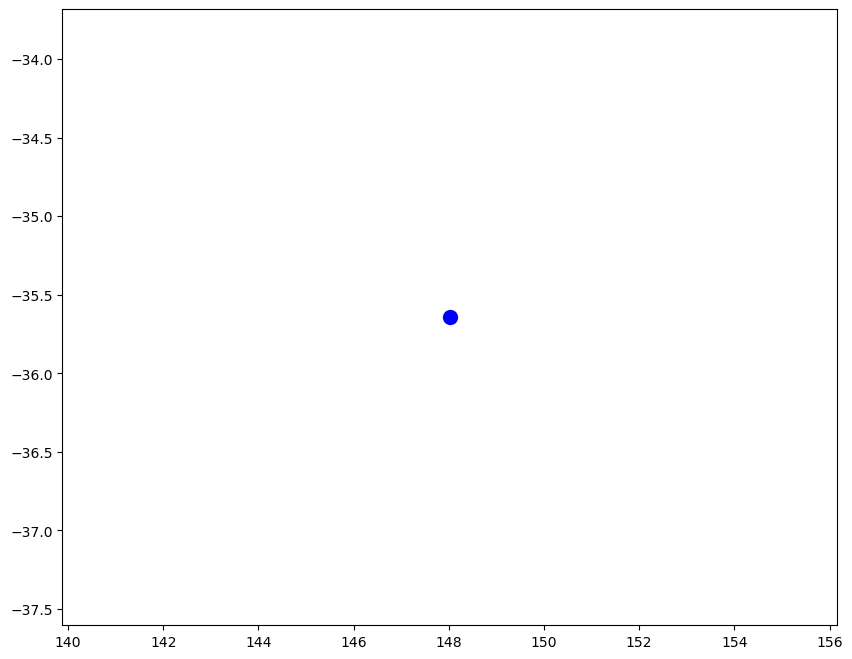

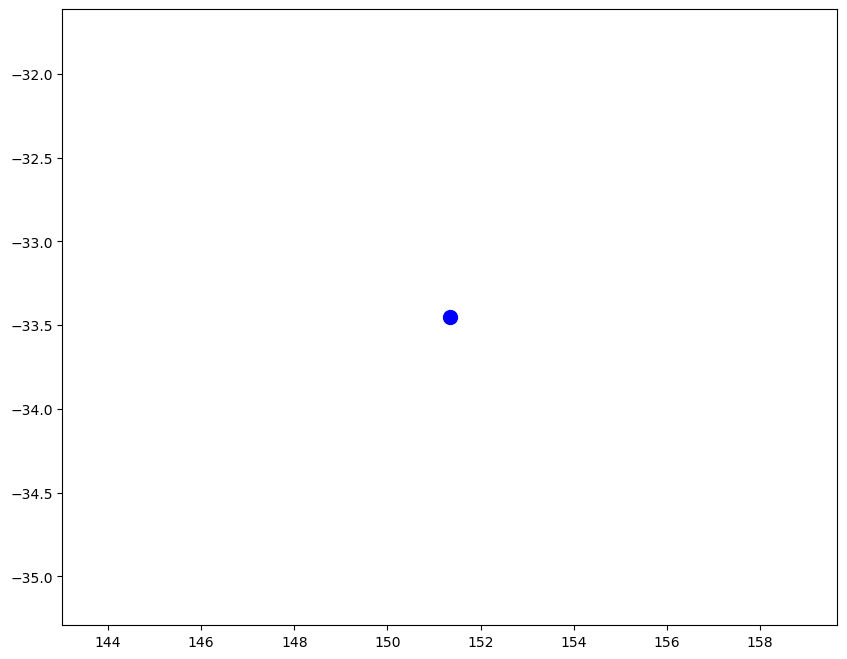

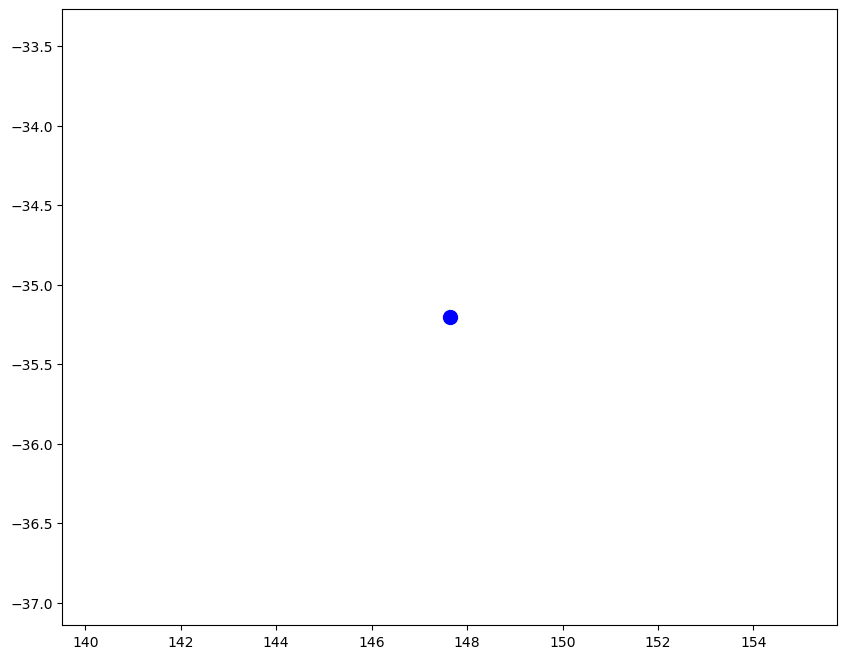

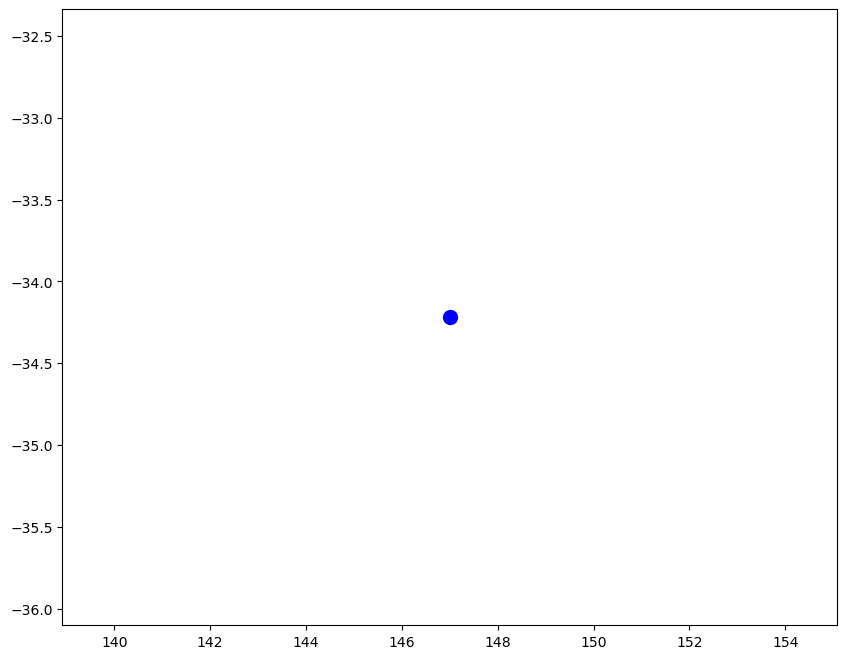

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from scipy.ndimage import gaussian_filter,maximum_filter
from scipy.sparse.csgraph import minimum_spanning_tree
import os

# Define paths
excel_file_path = '/Users/coolkarni/Desktop/OneDrive - The University of Melbourne/R1_99_New Events.xlsx'
csv_directory = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/'
output_directory = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Map_IDW_3Plots/'

# Load event names from the Excel file, skipping NaN values
event_df = pd.read_excel(excel_file_path, sheet_name='Sheet5')
event_names = event_df['Event'].dropna().unique()

# Initialize a list to store names of files that encountered errors
error_files = []

# Set distance threshold (e.g., in degrees, assuming coordinates are in lat/lon)
distance_threshold = 2  # Adjust as needed

# Haversine function to calculate distance between two lat/long coordinates
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Function to find the mean rainfall value of the 5 nearest stations
def find_nearest_stations_mean_rainfall(df, lon, lat, column):
    df['distance'] = df.apply(lambda row: haversine(lon, lat, row['Longitude'], row['Latitude']), axis=1)
    nearest_stations = df.nsmallest(5, 'distance')
    mean_rainfall = nearest_stations[column].mean()
    return mean_rainfall

# Function to perform IDW interpolation
def perform_idw(latitude, longitude, rainfall):
    try:
        # Create a grid for interpolation
        xi, yi = np.meshgrid(np.linspace(min(longitude), max(longitude), 100),
                             np.linspace(min(latitude), max(latitude), 100))
        zi = np.zeros_like(xi)

        for i in range(len(xi)):
            for j in range(len(yi)):
                distances = np.sqrt((longitude.values - xi[i, j])**2 + (latitude.values - yi[i, j])**2)
                weights = 1 / (distances + 1e-6)  # Avoid division by zero
                zi[i, j] = np.sum(weights * rainfall.values) / np.sum(weights)

        zi_smoothed = gaussian_filter(zi, sigma=2)
        return zi_smoothed, None
    except Exception as e:
        return None, str(e)

# Function to connect points within each cluster using Minimum Spanning Tree
def connect_points_within_cluster(points, ax, color):
    if len(points) < 2:
        return
    # Compute the distance matrix
    distance_matrix = cdist(points, points)
    # Compute the MST using the distance matrix
    mst = minimum_spanning_tree(distance_matrix).toarray()
    # Plot the MST
    for i in range(len(points)):
        for j in range(len(points)):
            if mst[i, j] > 0:
                ax.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], linestyle='-', color=color, alpha=0.5)

# Process each event
for event_name in event_names:
    # Construct the path to the corresponding CSV file
    csv_file = os.path.join(csv_directory, f"{event_name}.csv")
    
    try:
        # Load the CSV file
        df = pd.read_csv(csv_file)

        # Filter out NaN values in latitude and longitude
        x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

        # Read the shapefile (assuming you have this in your directory)
        shapefile_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_shapefile.shp'
        gdf = gpd.read_file(shapefile_path)

        # Create a grid of points within the bounds of the shapefile
        minx, miny, maxx, maxy = gdf.total_bounds
        xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))
        positions = np.vstack([xi.ravel(), yi.ravel()])

        # Initialize lists to store coordinates of maxima and their annotations
        global_maxima_coords = []
        filtered_maxima_coords = []
        annotations = []

        # Iterate through each rainfall column and generate plots
        rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]

        for idx, col in enumerate(rainfall_columns, start=1):
            rainfall = x_cleaned[col]

            # Perform IDW interpolation
            zi, _ = perform_idw(x_cleaned['Latitude'], x_cleaned['Longitude'], rainfall)

            # Mask the grid to include only points inside the shapefile geometry
            points = np.vstack((xi.flatten(), yi.flatten())).T
            mask = np.array([gdf.contains(Point(point)).any() for point in points])
            mask = mask.reshape(xi.shape)
            zi = np.where(mask, zi, np.nan)

            # Find global maximum
            global_max_value = np.nanmax(zi)
            global_max_index = np.unravel_index(np.nanargmax(zi), zi.shape)
            global_max_x = xi[global_max_index]
            global_max_y = yi[global_max_index]

            # Find local maxima (peaks)
            local_max = maximum_filter(zi, size=10) == zi
            peaks = np.where(local_max, zi, np.nan)

            # Calculate 50th percentile value of global maximum
            percentile_90 = 0.9 * global_max_value

            # Remove peaks not within 90th percentile of global maximum
            peaks_filtered = np.where(peaks >= percentile_90, peaks, np.nan)

            # Calculate distances from global maximum to each local maximum
            local_max_coords = np.array(list(zip(xi[np.isfinite(peaks_filtered)], yi[np.isfinite(peaks_filtered)])))
            global_max_coords = np.array([[global_max_x, global_max_y]])
            
            # Check if there are any local maxima
            if local_max_coords.shape[0] > 0:
                # Calculate distances from global maximum to each local maximum
                distances = cdist(global_max_coords, local_max_coords)[0]

                # Apply distance threshold to filter out local maxima too close to the global maximum
                valid_indices = distances > distance_threshold
                filtered_peaks_coords = local_max_coords[valid_indices]
                filtered_peaks_values = peaks_filtered[np.isfinite(peaks_filtered)][valid_indices]

                # Proceed with processing filtered peaks...
                for i, (x, y) in enumerate(filtered_peaks_coords, start=1):
                    local_max_rainfall_mean = find_nearest_stations_mean_rainfall(x_cleaned, x, y, col)
                    if local_max_rainfall_mean >= 25.0:
                        filtered_maxima_coords.append((x, y))
                        annotations.append((x, y, f'{idx}'))
            else:
                print("No local maxima found, skipping filtering.")

            # Find mean rainfall value at the global maximum
            global_max_rainfall_mean = find_nearest_stations_mean_rainfall(x_cleaned, global_max_x, global_max_y, col)

            # Check if global maxima exceeds 25.00 mm threshold
            if global_max_rainfall_mean >= 25.00:
                global_maxima_coords.append((global_max_x, global_max_y))
                annotations.append((global_max_x, global_max_y, f'{idx}'))

                # Store filtered local maxima (peaks) that also exceed 25.00 mm threshold
                for i, (x, y) in enumerate(filtered_peaks_coords, start=1):
                    local_max_rainfall_mean = find_nearest_stations_mean_rainfall(x_cleaned, x, y, col)
                    if local_max_rainfall_mean >= 25.0:
                        filtered_maxima_coords.append((x, y))
                        annotations.append((x, y, f'{idx}'))
            else:
                for i, (x, y) in enumerate(filtered_peaks_coords, start=1):
                    local_max_rainfall_mean = find_nearest_stations_mean_rainfall(x_cleaned, x, y, col)
                    if local_max_rainfall_mean >= 25.0:
                        filtered_maxima_coords.append((x, y))
                        annotations.append((x, y, f'{idx}'))

        # Combine global and filtered local maxima coordinates
        all_maxima_coords = np.array(global_maxima_coords + filtered_maxima_coords)

        # Divide the map into longitude sections and count points in each section
        long_sections = [140, 144, 148, 154]  # Define longitude section boundaries
        section_counts = [0] * (len(long_sections) - 1)
        
        # Set to store unique points that are counted
        counted_points = set()

        for lon, lat in all_maxima_coords:
            for i in range(len(long_sections) - 1):
                if long_sections[i] - 0.05 < lon < long_sections[i + 1] + 0.05:
                    counted_points.add((lon, lat))
                    section_counts[i] += 1

        # Check if at least two sections satisfy the criteria
        point_threshold = 2
        satisfying_sections = sum(count > point_threshold for count in section_counts)
        perform_clustering = satisfying_sections >= 2

        if perform_clustering:
            # Perform K-means clustering with 2 clusters as a default
            kmeans = KMeans(n_clusters=2, random_state=0)
            cluster_labels = kmeans.fit_predict(all_maxima_coords)

            # Initialize dictionaries to store points for each cluster
            clusters = {label: [] for label in set(cluster_labels)}

            # Sort points into their respective clusters
            for label, point in zip(cluster_labels, all_maxima_coords):
                clusters[label].append(point)

            # Plotting code
            fig, ax = plt.subplots(figsize=(10, 8))
            
            # Connect points within the cluster using MST
            for label in clusters:
                cluster_points = clusters[label]

                # Choose a color based on the cluster label
                color = 'red' if label == 0 else 'blue'

                # Plot points
                for x, y in cluster_points:
                    ax.plot(x, y, marker='o', color=color, markersize=10)

                # Connect points within the cluster using MST
                connect_points_within_cluster(cluster_points, ax, color)

        else:
            # If no meaningful clusters are found, plot the maxima without clustering
            fig, ax = plt.subplots(figsize=(10, 8))
           

            # Plot points for maxima
            for i, (x, y) in enumerate(all_maxima_coords):
                ax.plot(x, y, marker='o', color='blue', markersize=10)

            # Connect points within the maxima using MST
            connect_points_within_cluster(all_maxima_coords, ax, 'blue')

        # If there's only one maxima point, just plot it
        if len(all_maxima_coords) == 1:
            fig, ax = plt.subplots(figsize=(10, 8))
           
            for x, y in all_maxima_coords:
                ax.plot(x, y, marker='o', color='blue', markersize=10)

        # Annotate points with numbers
        for x, y, label in annotations:
            ax.text(x, y, label, fontsize=10, ha='center', va='bottom', color='black', weight='bold')

        

        # Save the output plot
        plt.savefig(os.path.join(output_directory, f"{event_name}_output.png"))
        plt.close()

    except Exception as e:
        # Append the event name to the error files list
        error_files.append(event_name)
        print(f"Error processing {event_name}: {e}")

# If there are any error files, save them to the new sheet in the existing Excel file
if error_files:
    # Load the existing data from the specified sheet
    try:
        existing_df = pd.read_excel(excel_file_path, sheet_name='IDW', engine='openpyxl')
    except ValueError:
        # If the sheet doesn't exist, create an empty DataFrame
        existing_df = pd.DataFrame()

    # Create a DataFrame for the new error files
    new_errors_df = pd.DataFrame({'Error Files': error_files})

    # Concatenate the existing data with the new error data
    combined_df = pd.concat([existing_df, new_errors_df], ignore_index=True)

    # Save the combined DataFrame back to the same sheet
    with pd.ExcelWriter(excel_file_path, mode='a', engine='openpyxl') as writer:
        combined_df.to_excel(writer, sheet_name='IDW', index=False)

print("Processing complete. Check the output directory for results and the Excel file for any errors.")


In [4]:
import pandas as pd


# After processing all events, print all coastal event filenames in tabular format
if coastal_events:
    coastal_events_df = pd.DataFrame(coastal_events, columns=['Coastal Events'])
    print(coastal_events_df)
else:
    print("No coastal events detected.")

# Assuming coastal_events_df is your DataFrame containing coastal events
excel_file_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/BoM Station list 4.xlsx'  # Update with your actual file path

# Load the existing Excel file
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer:  # 'a' mode appends to the file
    coastal_events_df.to_excel(writer, sheet_name='Coastal Events 4', index=False)


                          Coastal Events
0   Event 551 - 1880-03-24 to 1880-03-30
1   Event 557 - 1896-01-29 to 1896-02-04
2   Event 558 - 1896-12-15 to 1896-12-21
3   Event 563 - 1897-09-25 to 1897-10-01
4   Event 572 - 1900-01-08 to 1900-01-14
5   Event 579 - 1896-12-03 to 1896-12-09
6   Event 580 - 1890-12-20 to 1890-12-26
7   Event 584 - 1889-02-15 to 1889-02-21
8   Event 593 - 1892-12-26 to 1893-01-01
9   Event 595 - 1900-02-15 to 1900-02-21
10  Event 598 - 1879-03-02 to 1879-03-08
11  Event 606 - 1880-12-06 to 1880-12-12
12  Event 617 - 1873-12-09 to 1873-12-15
13  Event 618 - 1874-07-01 to 1874-07-07
14  Event 621 - 1882-01-13 to 1882-01-19
15  Event 622 - 1882-12-09 to 1882-12-15
16  Event 624 - 1897-12-09 to 1897-12-15
17  Event 626 - 1881-01-19 to 1881-01-25
18  Event 635 - 1888-12-07 to 1888-12-13
19  Event 637 - 1899-12-09 to 1899-12-15
20  Event 640 - 1886-01-20 to 1886-01-26
21  Event 663 - 1891-09-04 to 1891-09-10
22  Event 676 - 1860-02-07 to 1860-02-13
23  Event 677 - 

Event 733 - 1895-11-15 to 1895-11-21 - Day 1 Mean Rainfall: 0.15 mm
Event 733 - 1895-11-15 to 1895-11-21 - Day 2 Mean Rainfall: 0.14 mm
Event 733 - 1895-11-15 to 1895-11-21 - Day 3 Mean Rainfall: 0.78 mm
Event 733 - 1895-11-15 to 1895-11-21 - Day 4 Mean Rainfall: 1.87 mm
Event 733 - 1895-11-15 to 1895-11-21 - Day 5 Mean Rainfall: 0.33 mm
Event 733 - 1895-11-15 to 1895-11-21 - Day 6 Mean Rainfall: 0.33 mm
Event 733 - 1895-11-15 to 1895-11-21 - Day 7 Mean Rainfall: 0.19 mm
Event 733 - 1895-11-15 to 1895-11-21 - Median Threshold: 0.33 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 734 - 1874-01-11 to 1874-01-17 - Day 1 Mean Rainfall: 2.36 mm
Event 734 - 1874-01-11 to 1874-01-17 - Day 2 Mean Rainfall: 1.81 mm
Event 734 - 1874-01-11 to 1874-01-17 - Day 3 Mean Rainfall: 3.05 mm
Event 734 - 1874-01-11 to 1874-01-17 - Day 4 Mean Rainfall: 9.09 mm
Event 734 - 1874-01-11 to 1874-01-17 - Day 5 Mean Rainfall: 2.55 mm
Event 734 - 1874-01-11 to 1874-01-17 - Day 6 Mean Rainfall: 3.39 mm
Event 734 - 1874-01-11 to 1874-01-17 - Day 7 Mean Rainfall: 7.86 mm
Event 734 - 1874-01-11 to 1874-01-17 - Median Threshold: 3.05 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 735 - 1892-12-13 to 1892-12-19 - Day 1 Mean Rainfall: 0.42 mm
Event 735 - 1892-12-13 to 1892-12-19 - Day 2 Mean Rainfall: 0.05 mm
Event 735 - 1892-12-13 to 1892-12-19 - Day 3 Mean Rainfall: 0.13 mm
Event 735 - 1892-12-13 to 1892-12-19 - Day 4 Mean Rainfall: 0.11 mm
Event 735 - 1892-12-13 to 1892-12-19 - Day 5 Mean Rainfall: 1.10 mm
Event 735 - 1892-12-13 to 1892-12-19 - Day 6 Mean Rainfall: 4.08 mm
Event 735 - 1892-12-13 to 1892-12-19 - Day 7 Mean Rainfall: 5.70 mm
Event 735 - 1892-12-13 to 1892-12-19 - Median Threshold: 0.42 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 736 - 1900-01-17 to 1900-01-23 - Day 1 Mean Rainfall: 0.11 mm
Event 736 - 1900-01-17 to 1900-01-23 - Day 2 Mean Rainfall: 0.46 mm
Event 736 - 1900-01-17 to 1900-01-23 - Day 3 Mean Rainfall: 3.18 mm
Event 736 - 1900-01-17 to 1900-01-23 - Day 4 Mean Rainfall: 7.87 mm
Event 736 - 1900-01-17 to 1900-01-23 - Day 5 Mean Rainfall: 6.45 mm
Event 736 - 1900-01-17 to 1900-01-23 - Day 6 Mean Rainfall: 0.97 mm
Event 736 - 1900-01-17 to 1900-01-23 - Day 7 Mean Rainfall: 0.16 mm
Event 736 - 1900-01-17 to 1900-01-23 - Median Threshold: 0.97 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 737 - 1887-12-14 to 1887-12-20 - Day 1 Mean Rainfall: 0.11 mm
Event 737 - 1887-12-14 to 1887-12-20 - Day 2 Mean Rainfall: 0.13 mm
Event 737 - 1887-12-14 to 1887-12-20 - Day 3 Mean Rainfall: 1.01 mm
Event 737 - 1887-12-14 to 1887-12-20 - Day 4 Mean Rainfall: 2.57 mm
Event 737 - 1887-12-14 to 1887-12-20 - Day 5 Mean Rainfall: 2.87 mm
Event 737 - 1887-12-14 to 1887-12-20 - Day 6 Mean Rainfall: 5.15 mm
Event 737 - 1887-12-14 to 1887-12-20 - Day 7 Mean Rainfall: 4.21 mm
Event 737 - 1887-12-14 to 1887-12-20 - Median Threshold: 2.57 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 738 - 1892-06-19 to 1892-06-25 - Day 1 Mean Rainfall: 0.10 mm
Event 738 - 1892-06-19 to 1892-06-25 - Day 2 Mean Rainfall: 0.47 mm
Event 738 - 1892-06-19 to 1892-06-25 - Day 3 Mean Rainfall: 0.16 mm
Event 738 - 1892-06-19 to 1892-06-25 - Day 4 Mean Rainfall: 0.60 mm
Event 738 - 1892-06-19 to 1892-06-25 - Day 5 Mean Rainfall: 2.26 mm
Event 738 - 1892-06-19 to 1892-06-25 - Day 6 Mean Rainfall: 0.30 mm
Event 738 - 1892-06-19 to 1892-06-25 - Day 7 Mean Rainfall: 0.05 mm
Event 738 - 1892-06-19 to 1892-06-25 - Median Threshold: 0.30 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 741 - 1894-04-26 to 1894-05-02 - Day 1 Mean Rainfall: 0.26 mm
Event 741 - 1894-04-26 to 1894-05-02 - Day 2 Mean Rainfall: 1.48 mm
Event 741 - 1894-04-26 to 1894-05-02 - Day 3 Mean Rainfall: 0.24 mm
Event 741 - 1894-04-26 to 1894-05-02 - Day 4 Mean Rainfall: 0.32 mm
Event 741 - 1894-04-26 to 1894-05-02 - Day 5 Mean Rainfall: 0.71 mm
Event 741 - 1894-04-26 to 1894-05-02 - Day 6 Mean Rainfall: 0.33 mm
Event 741 - 1894-04-26 to 1894-05-02 - Day 7 Mean Rainfall: 0.17 mm
Event 741 - 1894-04-26 to 1894-05-02 - Median Threshold: 0.32 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 742 - 1896-01-13 to 1896-01-19 - Day 1 Mean Rainfall: 0.19 mm
Event 742 - 1896-01-13 to 1896-01-19 - Day 2 Mean Rainfall: 1.34 mm
Event 742 - 1896-01-13 to 1896-01-19 - Day 3 Mean Rainfall: 1.09 mm
Event 742 - 1896-01-13 to 1896-01-19 - Day 4 Mean Rainfall: 0.64 mm
Event 742 - 1896-01-13 to 1896-01-19 - Day 5 Mean Rainfall: 0.81 mm
Event 742 - 1896-01-13 to 1896-01-19 - Day 6 Mean Rainfall: 0.26 mm
Event 742 - 1896-01-13 to 1896-01-19 - Day 7 Mean Rainfall: 0.30 mm
Event 742 - 1896-01-13 to 1896-01-19 - Median Threshold: 0.64 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 743 - 1878-04-25 to 1878-05-01 - Day 1 Mean Rainfall: 0.40 mm
Event 743 - 1878-04-25 to 1878-05-01 - Day 2 Mean Rainfall: 1.01 mm
Event 743 - 1878-04-25 to 1878-05-01 - Day 3 Mean Rainfall: 2.23 mm
Event 743 - 1878-04-25 to 1878-05-01 - Day 4 Mean Rainfall: 2.98 mm
Event 743 - 1878-04-25 to 1878-05-01 - Day 5 Mean Rainfall: 4.07 mm
Event 743 - 1878-04-25 to 1878-05-01 - Day 6 Mean Rainfall: 1.68 mm
Event 743 - 1878-04-25 to 1878-05-01 - Day 7 Mean Rainfall: 0.13 mm
Event 743 - 1878-04-25 to 1878-05-01 - Median Threshold: 1.68 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 744 - 1878-12-20 to 1878-12-26 - Day 1 Mean Rainfall: 0.36 mm
Event 744 - 1878-12-20 to 1878-12-26 - Day 2 Mean Rainfall: 1.35 mm
Event 744 - 1878-12-20 to 1878-12-26 - Day 3 Mean Rainfall: 1.60 mm
Event 744 - 1878-12-20 to 1878-12-26 - Day 4 Mean Rainfall: 2.87 mm
Event 744 - 1878-12-20 to 1878-12-26 - Day 5 Mean Rainfall: 1.71 mm
Event 744 - 1878-12-20 to 1878-12-26 - Day 6 Mean Rainfall: 0.46 mm
Event 744 - 1878-12-20 to 1878-12-26 - Day 7 Mean Rainfall: 2.37 mm
Event 744 - 1878-12-20 to 1878-12-26 - Median Threshold: 1.60 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 746 - 1889-05-10 to 1889-05-16 - Day 1 Mean Rainfall: 1.42 mm
Event 746 - 1889-05-10 to 1889-05-16 - Day 2 Mean Rainfall: 0.45 mm
Event 746 - 1889-05-10 to 1889-05-16 - Day 3 Mean Rainfall: 2.10 mm
Event 746 - 1889-05-10 to 1889-05-16 - Day 4 Mean Rainfall: 6.00 mm
Event 746 - 1889-05-10 to 1889-05-16 - Day 5 Mean Rainfall: 2.37 mm
Event 746 - 1889-05-10 to 1889-05-16 - Day 6 Mean Rainfall: 0.17 mm
Event 746 - 1889-05-10 to 1889-05-16 - Day 7 Mean Rainfall: 0.19 mm
Event 746 - 1889-05-10 to 1889-05-16 - Median Threshold: 1.42 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 747 - 1885-04-05 to 1885-04-11 - Day 1 Mean Rainfall: 2.39 mm
Event 747 - 1885-04-05 to 1885-04-11 - Day 2 Mean Rainfall: 2.97 mm
Event 747 - 1885-04-05 to 1885-04-11 - Day 3 Mean Rainfall: 1.97 mm
Event 747 - 1885-04-05 to 1885-04-11 - Day 4 Mean Rainfall: 1.08 mm
Event 747 - 1885-04-05 to 1885-04-11 - Day 5 Mean Rainfall: 1.57 mm
Event 747 - 1885-04-05 to 1885-04-11 - Day 6 Mean Rainfall: 1.82 mm
Event 747 - 1885-04-05 to 1885-04-11 - Day 7 Mean Rainfall: 0.72 mm
Event 747 - 1885-04-05 to 1885-04-11 - Median Threshold: 1.82 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 748 - 1900-02-02 to 1900-02-08 - Day 1 Mean Rainfall: 0.49 mm
Event 748 - 1900-02-02 to 1900-02-08 - Day 2 Mean Rainfall: 1.00 mm
Event 748 - 1900-02-02 to 1900-02-08 - Day 3 Mean Rainfall: 1.10 mm
Event 748 - 1900-02-02 to 1900-02-08 - Day 4 Mean Rainfall: 0.52 mm
Event 748 - 1900-02-02 to 1900-02-08 - Day 5 Mean Rainfall: 0.17 mm
Event 748 - 1900-02-02 to 1900-02-08 - Day 6 Mean Rainfall: 0.02 mm
Event 748 - 1900-02-02 to 1900-02-08 - Day 7 Mean Rainfall: 0.09 mm
Event 748 - 1900-02-02 to 1900-02-08 - Median Threshold: 0.49 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 749 - 1889-12-21 to 1889-12-27 - Day 1 Mean Rainfall: 1.62 mm
Event 749 - 1889-12-21 to 1889-12-27 - Day 2 Mean Rainfall: 0.20 mm
Event 749 - 1889-12-21 to 1889-12-27 - Day 3 Mean Rainfall: 0.04 mm
Event 749 - 1889-12-21 to 1889-12-27 - Day 4 Mean Rainfall: 0.11 mm
Event 749 - 1889-12-21 to 1889-12-27 - Day 5 Mean Rainfall: 0.21 mm
Event 749 - 1889-12-21 to 1889-12-27 - Day 6 Mean Rainfall: 0.01 mm
Event 749 - 1889-12-21 to 1889-12-27 - Day 7 Mean Rainfall: 0.37 mm
Event 749 - 1889-12-21 to 1889-12-27 - Median Threshold: 0.20 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 750 - 1891-07-16 to 1891-07-22 - Day 1 Mean Rainfall: 1.33 mm
Event 750 - 1891-07-16 to 1891-07-22 - Day 2 Mean Rainfall: 0.47 mm
Event 750 - 1891-07-16 to 1891-07-22 - Day 3 Mean Rainfall: 0.50 mm
Event 750 - 1891-07-16 to 1891-07-22 - Day 4 Mean Rainfall: 0.48 mm
Event 750 - 1891-07-16 to 1891-07-22 - Day 5 Mean Rainfall: 0.20 mm
Event 750 - 1891-07-16 to 1891-07-22 - Day 6 Mean Rainfall: 0.11 mm
Event 750 - 1891-07-16 to 1891-07-22 - Day 7 Mean Rainfall: 0.18 mm
Event 750 - 1891-07-16 to 1891-07-22 - Median Threshold: 0.47 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 751 - 1897-09-19 to 1897-09-25 - Day 1 Mean Rainfall: 0.50 mm
Event 751 - 1897-09-19 to 1897-09-25 - Day 2 Mean Rainfall: 0.48 mm
Event 751 - 1897-09-19 to 1897-09-25 - Day 3 Mean Rainfall: 3.68 mm
Event 751 - 1897-09-19 to 1897-09-25 - Day 4 Mean Rainfall: 15.20 mm
Event 751 - 1897-09-19 to 1897-09-25 - Day 5 Mean Rainfall: 2.84 mm
Event 751 - 1897-09-19 to 1897-09-25 - Day 6 Mean Rainfall: 0.66 mm
Event 751 - 1897-09-19 to 1897-09-25 - Day 7 Mean Rainfall: 0.92 mm
Event 751 - 1897-09-19 to 1897-09-25 - Median Threshold: 0.92 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 752 - 1883-02-24 to 1883-03-02 - Day 1 Mean Rainfall: 0.71 mm
Event 752 - 1883-02-24 to 1883-03-02 - Day 2 Mean Rainfall: 0.80 mm
Event 752 - 1883-02-24 to 1883-03-02 - Day 3 Mean Rainfall: 1.15 mm
Event 752 - 1883-02-24 to 1883-03-02 - Day 4 Mean Rainfall: 7.50 mm
Event 752 - 1883-02-24 to 1883-03-02 - Day 5 Mean Rainfall: 6.63 mm
Event 752 - 1883-02-24 to 1883-03-02 - Day 6 Mean Rainfall: 0.37 mm
Event 752 - 1883-02-24 to 1883-03-02 - Day 7 Mean Rainfall: 0.25 mm
Event 752 - 1883-02-24 to 1883-03-02 - Median Threshold: 0.80 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 753 - 1888-12-31 to 1889-01-06 - Day 1 Mean Rainfall: 1.98 mm
Event 753 - 1888-12-31 to 1889-01-06 - Day 2 Mean Rainfall: 2.79 mm
Event 753 - 1888-12-31 to 1889-01-06 - Day 3 Mean Rainfall: 2.88 mm
Event 753 - 1888-12-31 to 1889-01-06 - Day 4 Mean Rainfall: 8.89 mm
Event 753 - 1888-12-31 to 1889-01-06 - Day 5 Mean Rainfall: 9.40 mm
Event 753 - 1888-12-31 to 1889-01-06 - Day 6 Mean Rainfall: 0.44 mm
Event 753 - 1888-12-31 to 1889-01-06 - Day 7 Mean Rainfall: 0.02 mm
Event 753 - 1888-12-31 to 1889-01-06 - Median Threshold: 2.79 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 754 - 1895-02-15 to 1895-02-21 - Day 1 Mean Rainfall: 0.44 mm
Event 754 - 1895-02-15 to 1895-02-21 - Day 2 Mean Rainfall: 0.75 mm
Event 754 - 1895-02-15 to 1895-02-21 - Day 3 Mean Rainfall: 3.77 mm
Event 754 - 1895-02-15 to 1895-02-21 - Day 4 Mean Rainfall: 11.22 mm
Event 754 - 1895-02-15 to 1895-02-21 - Day 5 Mean Rainfall: 4.09 mm
Event 754 - 1895-02-15 to 1895-02-21 - Day 6 Mean Rainfall: 0.12 mm
Event 754 - 1895-02-15 to 1895-02-21 - Day 7 Mean Rainfall: 0.21 mm
Event 754 - 1895-02-15 to 1895-02-21 - Median Threshold: 0.75 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 755 - 1898-03-11 to 1898-03-17 - Day 1 Mean Rainfall: 0.12 mm
Event 755 - 1898-03-11 to 1898-03-17 - Day 2 Mean Rainfall: 0.03 mm
Event 755 - 1898-03-11 to 1898-03-17 - Day 3 Mean Rainfall: 0.19 mm
Event 755 - 1898-03-11 to 1898-03-17 - Day 4 Mean Rainfall: 1.00 mm
Event 755 - 1898-03-11 to 1898-03-17 - Day 5 Mean Rainfall: 0.25 mm
Event 755 - 1898-03-11 to 1898-03-17 - Day 6 Mean Rainfall: 0.03 mm
Event 755 - 1898-03-11 to 1898-03-17 - Day 7 Mean Rainfall: 0.15 mm
Event 755 - 1898-03-11 to 1898-03-17 - Median Threshold: 0.15 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 756 - 1880-04-17 to 1880-04-23 - Day 1 Mean Rainfall: 3.13 mm
Event 756 - 1880-04-17 to 1880-04-23 - Day 2 Mean Rainfall: 3.02 mm
Event 756 - 1880-04-17 to 1880-04-23 - Day 3 Mean Rainfall: 4.20 mm
Event 756 - 1880-04-17 to 1880-04-23 - Day 4 Mean Rainfall: 6.24 mm
Event 756 - 1880-04-17 to 1880-04-23 - Day 5 Mean Rainfall: 9.98 mm
Event 756 - 1880-04-17 to 1880-04-23 - Day 6 Mean Rainfall: 13.44 mm
Event 756 - 1880-04-17 to 1880-04-23 - Day 7 Mean Rainfall: 11.02 mm
Event 756 - 1880-04-17 to 1880-04-23 - Median Threshold: 6.24 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 757 - 1887-11-02 to 1887-11-08 - Day 1 Mean Rainfall: 0.26 mm
Event 757 - 1887-11-02 to 1887-11-08 - Day 2 Mean Rainfall: 0.58 mm
Event 757 - 1887-11-02 to 1887-11-08 - Day 3 Mean Rainfall: 3.63 mm
Event 757 - 1887-11-02 to 1887-11-08 - Day 4 Mean Rainfall: 9.42 mm
Event 757 - 1887-11-02 to 1887-11-08 - Day 5 Mean Rainfall: 6.96 mm
Event 757 - 1887-11-02 to 1887-11-08 - Day 6 Mean Rainfall: 2.96 mm
Event 757 - 1887-11-02 to 1887-11-08 - Day 7 Mean Rainfall: 5.29 mm
Event 757 - 1887-11-02 to 1887-11-08 - Median Threshold: 3.63 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 759 - 1879-02-10 to 1879-02-16 - Day 1 Mean Rainfall: 1.49 mm
Event 759 - 1879-02-10 to 1879-02-16 - Day 2 Mean Rainfall: 5.92 mm
Event 759 - 1879-02-10 to 1879-02-16 - Day 3 Mean Rainfall: 2.44 mm
Event 759 - 1879-02-10 to 1879-02-16 - Day 4 Mean Rainfall: 1.36 mm
Event 759 - 1879-02-10 to 1879-02-16 - Day 5 Mean Rainfall: 3.52 mm
Event 759 - 1879-02-10 to 1879-02-16 - Day 6 Mean Rainfall: 11.09 mm
Event 759 - 1879-02-10 to 1879-02-16 - Day 7 Mean Rainfall: 15.01 mm
Event 759 - 1879-02-10 to 1879-02-16 - Median Threshold: 3.52 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 760 - 1890-04-04 to 1890-04-10 - Day 1 Mean Rainfall: 0.82 mm
Event 760 - 1890-04-04 to 1890-04-10 - Day 2 Mean Rainfall: 0.61 mm
Event 760 - 1890-04-04 to 1890-04-10 - Day 3 Mean Rainfall: 0.22 mm
Event 760 - 1890-04-04 to 1890-04-10 - Day 4 Mean Rainfall: 0.38 mm
Event 760 - 1890-04-04 to 1890-04-10 - Day 5 Mean Rainfall: 1.27 mm
Event 760 - 1890-04-04 to 1890-04-10 - Day 6 Mean Rainfall: 4.35 mm
Event 760 - 1890-04-04 to 1890-04-10 - Day 7 Mean Rainfall: 8.39 mm
Event 760 - 1890-04-04 to 1890-04-10 - Median Threshold: 0.82 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 761 - 1891-11-07 to 1891-11-13 - Day 1 Mean Rainfall: 0.05 mm
Event 761 - 1891-11-07 to 1891-11-13 - Day 2 Mean Rainfall: 0.04 mm
Event 761 - 1891-11-07 to 1891-11-13 - Day 3 Mean Rainfall: 1.73 mm
Event 761 - 1891-11-07 to 1891-11-13 - Day 4 Mean Rainfall: 11.48 mm
Event 761 - 1891-11-07 to 1891-11-13 - Day 5 Mean Rainfall: 4.46 mm
Event 761 - 1891-11-07 to 1891-11-13 - Day 6 Mean Rainfall: 2.00 mm
Event 761 - 1891-11-07 to 1891-11-13 - Day 7 Mean Rainfall: 0.52 mm
Event 761 - 1891-11-07 to 1891-11-13 - Median Threshold: 1.73 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 762 - 1894-05-12 to 1894-05-18 - Day 1 Mean Rainfall: 0.07 mm
Event 762 - 1894-05-12 to 1894-05-18 - Day 2 Mean Rainfall: 0.05 mm
Event 762 - 1894-05-12 to 1894-05-18 - Day 3 Mean Rainfall: 0.19 mm
Event 762 - 1894-05-12 to 1894-05-18 - Day 4 Mean Rainfall: 0.27 mm
Event 762 - 1894-05-12 to 1894-05-18 - Day 5 Mean Rainfall: 0.73 mm
Event 762 - 1894-05-12 to 1894-05-18 - Day 6 Mean Rainfall: 4.00 mm
Event 762 - 1894-05-12 to 1894-05-18 - Day 7 Mean Rainfall: 7.79 mm
Event 762 - 1894-05-12 to 1894-05-18 - Median Threshold: 0.27 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 763 - 1887-03-05 to 1887-03-11 - Day 1 Mean Rainfall: 0.43 mm
Event 763 - 1887-03-05 to 1887-03-11 - Day 2 Mean Rainfall: 0.45 mm
Event 763 - 1887-03-05 to 1887-03-11 - Day 3 Mean Rainfall: 3.21 mm
Event 763 - 1887-03-05 to 1887-03-11 - Day 4 Mean Rainfall: 7.32 mm
Event 763 - 1887-03-05 to 1887-03-11 - Day 5 Mean Rainfall: 1.38 mm
Event 763 - 1887-03-05 to 1887-03-11 - Day 6 Mean Rainfall: 4.14 mm
Event 763 - 1887-03-05 to 1887-03-11 - Day 7 Mean Rainfall: 7.04 mm
Event 763 - 1887-03-05 to 1887-03-11 - Median Threshold: 3.21 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 765 - 1884-01-30 to 1884-02-05 - Day 1 Mean Rainfall: 0.02 mm
Event 765 - 1884-01-30 to 1884-02-05 - Day 2 Mean Rainfall: 0.78 mm
Event 765 - 1884-01-30 to 1884-02-05 - Day 3 Mean Rainfall: 2.82 mm
Event 765 - 1884-01-30 to 1884-02-05 - Day 4 Mean Rainfall: 2.87 mm
Event 765 - 1884-01-30 to 1884-02-05 - Day 5 Mean Rainfall: 0.57 mm
Event 765 - 1884-01-30 to 1884-02-05 - Day 6 Mean Rainfall: 0.25 mm
Event 765 - 1884-01-30 to 1884-02-05 - Day 7 Mean Rainfall: 0.05 mm
Event 765 - 1884-01-30 to 1884-02-05 - Median Threshold: 0.57 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 768 - 1893-06-12 to 1893-06-18 - Day 1 Mean Rainfall: 6.42 mm
Event 768 - 1893-06-12 to 1893-06-18 - Day 2 Mean Rainfall: 2.72 mm
Event 768 - 1893-06-12 to 1893-06-18 - Day 3 Mean Rainfall: 9.23 mm
Event 768 - 1893-06-12 to 1893-06-18 - Day 4 Mean Rainfall: 6.27 mm
Event 768 - 1893-06-12 to 1893-06-18 - Day 5 Mean Rainfall: 1.47 mm
Event 768 - 1893-06-12 to 1893-06-18 - Day 6 Mean Rainfall: 2.67 mm
Event 768 - 1893-06-12 to 1893-06-18 - Day 7 Mean Rainfall: 2.65 mm
Event 768 - 1893-06-12 to 1893-06-18 - Median Threshold: 2.72 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 770 - 1889-11-15 to 1889-11-21 - Day 1 Mean Rainfall: 1.95 mm
Event 770 - 1889-11-15 to 1889-11-21 - Day 2 Mean Rainfall: 5.35 mm
Event 770 - 1889-11-15 to 1889-11-21 - Day 3 Mean Rainfall: 5.93 mm
Event 770 - 1889-11-15 to 1889-11-21 - Day 4 Mean Rainfall: 3.60 mm
Event 770 - 1889-11-15 to 1889-11-21 - Day 5 Mean Rainfall: 1.42 mm
Event 770 - 1889-11-15 to 1889-11-21 - Day 6 Mean Rainfall: 0.11 mm
Event 770 - 1889-11-15 to 1889-11-21 - Day 7 Mean Rainfall: 0.41 mm
Event 770 - 1889-11-15 to 1889-11-21 - Median Threshold: 1.95 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 771 - 1891-09-19 to 1891-09-25 - Day 1 Mean Rainfall: 1.40 mm
Event 771 - 1891-09-19 to 1891-09-25 - Day 2 Mean Rainfall: 3.07 mm
Event 771 - 1891-09-19 to 1891-09-25 - Day 3 Mean Rainfall: 6.89 mm
Event 771 - 1891-09-19 to 1891-09-25 - Day 4 Mean Rainfall: 1.05 mm
Event 771 - 1891-09-19 to 1891-09-25 - Day 5 Mean Rainfall: 0.30 mm
Event 771 - 1891-09-19 to 1891-09-25 - Day 6 Mean Rainfall: 0.31 mm
Event 771 - 1891-09-19 to 1891-09-25 - Day 7 Mean Rainfall: 1.19 mm
Event 771 - 1891-09-19 to 1891-09-25 - Median Threshold: 1.19 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 773 - 1881-10-30 to 1881-11-05 - Day 1 Mean Rainfall: 0.24 mm
Event 773 - 1881-10-30 to 1881-11-05 - Day 2 Mean Rainfall: 1.01 mm
Event 773 - 1881-10-30 to 1881-11-05 - Day 3 Mean Rainfall: 2.56 mm
Event 773 - 1881-10-30 to 1881-11-05 - Day 4 Mean Rainfall: 3.13 mm
Event 773 - 1881-10-30 to 1881-11-05 - Day 5 Mean Rainfall: 2.74 mm
Event 773 - 1881-10-30 to 1881-11-05 - Day 6 Mean Rainfall: 0.30 mm
Event 773 - 1881-10-30 to 1881-11-05 - Day 7 Mean Rainfall: 0.20 mm
Event 773 - 1881-10-30 to 1881-11-05 - Median Threshold: 1.01 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 775 - 1897-07-06 to 1897-07-12 - Day 1 Mean Rainfall: 0.29 mm
Event 775 - 1897-07-06 to 1897-07-12 - Day 2 Mean Rainfall: 0.34 mm
Event 775 - 1897-07-06 to 1897-07-12 - Day 3 Mean Rainfall: 0.06 mm
Event 775 - 1897-07-06 to 1897-07-12 - Day 4 Mean Rainfall: 0.59 mm
Event 775 - 1897-07-06 to 1897-07-12 - Day 5 Mean Rainfall: 3.25 mm
Event 775 - 1897-07-06 to 1897-07-12 - Day 6 Mean Rainfall: 1.41 mm
Event 775 - 1897-07-06 to 1897-07-12 - Day 7 Mean Rainfall: 0.91 mm
Event 775 - 1897-07-06 to 1897-07-12 - Median Threshold: 0.59 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 777 - 1892-07-01 to 1892-07-07 - Day 1 Mean Rainfall: 0.20 mm
Event 777 - 1892-07-01 to 1892-07-07 - Day 2 Mean Rainfall: 1.35 mm
Event 777 - 1892-07-01 to 1892-07-07 - Day 3 Mean Rainfall: 5.48 mm
Event 777 - 1892-07-01 to 1892-07-07 - Day 4 Mean Rainfall: 3.28 mm
Event 777 - 1892-07-01 to 1892-07-07 - Day 5 Mean Rainfall: 1.73 mm
Event 777 - 1892-07-01 to 1892-07-07 - Day 6 Mean Rainfall: 9.29 mm
Event 777 - 1892-07-01 to 1892-07-07 - Day 7 Mean Rainfall: 4.10 mm
Event 777 - 1892-07-01 to 1892-07-07 - Median Threshold: 3.28 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 778 - 1893-09-01 to 1893-09-07 - Day 1 Mean Rainfall: 0.16 mm
Event 778 - 1893-09-01 to 1893-09-07 - Day 2 Mean Rainfall: 0.11 mm
Event 778 - 1893-09-01 to 1893-09-07 - Day 3 Mean Rainfall: 0.65 mm
Event 778 - 1893-09-01 to 1893-09-07 - Day 4 Mean Rainfall: 3.09 mm
Event 778 - 1893-09-01 to 1893-09-07 - Day 5 Mean Rainfall: 1.41 mm
Event 778 - 1893-09-01 to 1893-09-07 - Day 6 Mean Rainfall: 0.43 mm
Event 778 - 1893-09-01 to 1893-09-07 - Day 7 Mean Rainfall: 0.93 mm
Event 778 - 1893-09-01 to 1893-09-07 - Median Threshold: 0.65 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 779 - 1899-02-12 to 1899-02-18 - Day 1 Mean Rainfall: 0.04 mm
Event 779 - 1899-02-12 to 1899-02-18 - Day 2 Mean Rainfall: 0.46 mm
Event 779 - 1899-02-12 to 1899-02-18 - Day 3 Mean Rainfall: 0.46 mm
Event 779 - 1899-02-12 to 1899-02-18 - Day 4 Mean Rainfall: 0.53 mm
Event 779 - 1899-02-12 to 1899-02-18 - Day 5 Mean Rainfall: 0.29 mm
Event 779 - 1899-02-12 to 1899-02-18 - Day 6 Mean Rainfall: 0.17 mm
Event 779 - 1899-02-12 to 1899-02-18 - Day 7 Mean Rainfall: 0.10 mm
Event 779 - 1899-02-12 to 1899-02-18 - Median Threshold: 0.29 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 780 - 1887-02-15 to 1887-02-21 - Day 1 Mean Rainfall: 2.16 mm
Event 780 - 1887-02-15 to 1887-02-21 - Day 2 Mean Rainfall: 8.87 mm
Event 780 - 1887-02-15 to 1887-02-21 - Day 3 Mean Rainfall: 11.53 mm
Event 780 - 1887-02-15 to 1887-02-21 - Day 4 Mean Rainfall: 4.35 mm
Event 780 - 1887-02-15 to 1887-02-21 - Day 5 Mean Rainfall: 0.60 mm
Event 780 - 1887-02-15 to 1887-02-21 - Day 6 Mean Rainfall: 0.68 mm
Event 780 - 1887-02-15 to 1887-02-21 - Day 7 Mean Rainfall: 0.53 mm
Event 780 - 1887-02-15 to 1887-02-21 - Median Threshold: 2.16 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 783 - 1885-02-09 to 1885-02-15 - Day 1 Mean Rainfall: 0.14 mm
Event 783 - 1885-02-09 to 1885-02-15 - Day 2 Mean Rainfall: 0.34 mm
Event 783 - 1885-02-09 to 1885-02-15 - Day 3 Mean Rainfall: 0.89 mm
Event 783 - 1885-02-09 to 1885-02-15 - Day 4 Mean Rainfall: 3.16 mm
Event 783 - 1885-02-09 to 1885-02-15 - Day 5 Mean Rainfall: 1.63 mm
Event 783 - 1885-02-09 to 1885-02-15 - Day 6 Mean Rainfall: 0.18 mm
Event 783 - 1885-02-09 to 1885-02-15 - Day 7 Mean Rainfall: 1.73 mm
Event 783 - 1885-02-09 to 1885-02-15 - Median Threshold: 0.89 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 785 - 1894-10-12 to 1894-10-18 - Day 1 Mean Rainfall: 0.90 mm
Event 785 - 1894-10-12 to 1894-10-18 - Day 2 Mean Rainfall: 0.92 mm
Event 785 - 1894-10-12 to 1894-10-18 - Day 3 Mean Rainfall: 3.02 mm
Event 785 - 1894-10-12 to 1894-10-18 - Day 4 Mean Rainfall: 9.66 mm
Event 785 - 1894-10-12 to 1894-10-18 - Day 5 Mean Rainfall: 4.53 mm
Event 785 - 1894-10-12 to 1894-10-18 - Day 6 Mean Rainfall: 0.88 mm
Event 785 - 1894-10-12 to 1894-10-18 - Day 7 Mean Rainfall: 0.56 mm
Event 785 - 1894-10-12 to 1894-10-18 - Median Threshold: 0.92 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 786 - 1871-12-29 to 1872-01-04 - Day 1 Mean Rainfall: 3.12 mm
Event 786 - 1871-12-29 to 1872-01-04 - Day 2 Mean Rainfall: 2.49 mm
Event 786 - 1871-12-29 to 1872-01-04 - Day 3 Mean Rainfall: 2.08 mm
Event 786 - 1871-12-29 to 1872-01-04 - Day 4 Mean Rainfall: 5.57 mm
Event 786 - 1871-12-29 to 1872-01-04 - Day 5 Mean Rainfall: 1.03 mm
Event 786 - 1871-12-29 to 1872-01-04 - Day 6 Mean Rainfall: 0.57 mm
Event 786 - 1871-12-29 to 1872-01-04 - Day 7 Mean Rainfall: 0.63 mm
Event 786 - 1871-12-29 to 1872-01-04 - Median Threshold: 2.08 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 787 - 1872-02-01 to 1872-02-07 - Day 1 Mean Rainfall: 2.24 mm
Event 787 - 1872-02-01 to 1872-02-07 - Day 2 Mean Rainfall: 3.78 mm
Event 787 - 1872-02-01 to 1872-02-07 - Day 3 Mean Rainfall: 8.29 mm
Event 787 - 1872-02-01 to 1872-02-07 - Day 4 Mean Rainfall: 7.32 mm
Event 787 - 1872-02-01 to 1872-02-07 - Day 5 Mean Rainfall: 6.37 mm
Event 787 - 1872-02-01 to 1872-02-07 - Day 6 Mean Rainfall: 3.43 mm
Event 787 - 1872-02-01 to 1872-02-07 - Day 7 Mean Rainfall: 0.42 mm
Event 787 - 1872-02-01 to 1872-02-07 - Median Threshold: 3.78 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 788 - 1889-05-30 to 1889-06-05 - Day 1 Mean Rainfall: 1.02 mm
Event 788 - 1889-05-30 to 1889-06-05 - Day 2 Mean Rainfall: 4.02 mm
Event 788 - 1889-05-30 to 1889-06-05 - Day 3 Mean Rainfall: 8.88 mm
Event 788 - 1889-05-30 to 1889-06-05 - Day 4 Mean Rainfall: 6.34 mm
Event 788 - 1889-05-30 to 1889-06-05 - Day 5 Mean Rainfall: 1.11 mm
Event 788 - 1889-05-30 to 1889-06-05 - Day 6 Mean Rainfall: 0.60 mm
Event 788 - 1889-05-30 to 1889-06-05 - Day 7 Mean Rainfall: 0.98 mm
Event 788 - 1889-05-30 to 1889-06-05 - Median Threshold: 1.11 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 789 - 1883-04-02 to 1883-04-08 - Day 1 Mean Rainfall: 1.00 mm
Event 789 - 1883-04-02 to 1883-04-08 - Day 2 Mean Rainfall: 2.70 mm
Event 789 - 1883-04-02 to 1883-04-08 - Day 3 Mean Rainfall: 2.49 mm
Event 789 - 1883-04-02 to 1883-04-08 - Day 4 Mean Rainfall: 3.86 mm
Event 789 - 1883-04-02 to 1883-04-08 - Day 5 Mean Rainfall: 2.51 mm
Event 789 - 1883-04-02 to 1883-04-08 - Day 6 Mean Rainfall: 0.15 mm
Event 789 - 1883-04-02 to 1883-04-08 - Day 7 Mean Rainfall: 0.98 mm
Event 789 - 1883-04-02 to 1883-04-08 - Median Threshold: 2.49 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 790 - 1870-12-28 to 1871-01-03 - Day 1 Mean Rainfall: 0.83 mm
Event 790 - 1870-12-28 to 1871-01-03 - Day 2 Mean Rainfall: 2.12 mm
Event 790 - 1870-12-28 to 1871-01-03 - Day 3 Mean Rainfall: 3.90 mm
Event 790 - 1870-12-28 to 1871-01-03 - Day 4 Mean Rainfall: 10.22 mm
Event 790 - 1870-12-28 to 1871-01-03 - Day 5 Mean Rainfall: 3.76 mm
Event 790 - 1870-12-28 to 1871-01-03 - Day 6 Mean Rainfall: 0.69 mm
Event 790 - 1870-12-28 to 1871-01-03 - Day 7 Mean Rainfall: 0.05 mm
Event 790 - 1870-12-28 to 1871-01-03 - Median Threshold: 2.12 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 792 - 1871-11-02 to 1871-11-08 - Day 1 Mean Rainfall: 1.33 mm
Event 792 - 1871-11-02 to 1871-11-08 - Day 2 Mean Rainfall: 1.23 mm
Event 792 - 1871-11-02 to 1871-11-08 - Day 3 Mean Rainfall: 1.91 mm
Event 792 - 1871-11-02 to 1871-11-08 - Day 4 Mean Rainfall: 7.79 mm
Event 792 - 1871-11-02 to 1871-11-08 - Day 5 Mean Rainfall: 4.56 mm
Event 792 - 1871-11-02 to 1871-11-08 - Day 6 Mean Rainfall: 0.22 mm
Event 792 - 1871-11-02 to 1871-11-08 - Day 7 Mean Rainfall: 0.00 mm
Event 792 - 1871-11-02 to 1871-11-08 - Median Threshold: 1.33 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 793 - 1872-11-10 to 1872-11-16 - Day 1 Mean Rainfall: 7.39 mm
Event 793 - 1872-11-10 to 1872-11-16 - Day 2 Mean Rainfall: 9.58 mm
Event 793 - 1872-11-10 to 1872-11-16 - Day 3 Mean Rainfall: 2.34 mm
Event 793 - 1872-11-10 to 1872-11-16 - Day 4 Mean Rainfall: 5.68 mm
Event 793 - 1872-11-10 to 1872-11-16 - Day 5 Mean Rainfall: 0.92 mm
Event 793 - 1872-11-10 to 1872-11-16 - Day 6 Mean Rainfall: 0.02 mm
Event 793 - 1872-11-10 to 1872-11-16 - Day 7 Mean Rainfall: 0.24 mm
Event 793 - 1872-11-10 to 1872-11-16 - Median Threshold: 2.34 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 796 - 1878-08-30 to 1878-09-05 - Day 1 Mean Rainfall: 0.12 mm
Event 796 - 1878-08-30 to 1878-09-05 - Day 2 Mean Rainfall: 0.08 mm
Event 796 - 1878-08-30 to 1878-09-05 - Day 3 Mean Rainfall: 0.56 mm
Event 796 - 1878-08-30 to 1878-09-05 - Day 4 Mean Rainfall: 1.35 mm
Event 796 - 1878-08-30 to 1878-09-05 - Day 5 Mean Rainfall: 4.64 mm
Event 796 - 1878-08-30 to 1878-09-05 - Day 6 Mean Rainfall: 3.31 mm
Event 796 - 1878-08-30 to 1878-09-05 - Day 7 Mean Rainfall: 12.33 mm
Event 796 - 1878-08-30 to 1878-09-05 - Median Threshold: 1.35 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 797 - 1880-11-27 to 1880-12-03 - Day 1 Mean Rainfall: 0.02 mm
Event 797 - 1880-11-27 to 1880-12-03 - Day 2 Mean Rainfall: 0.38 mm
Event 797 - 1880-11-27 to 1880-12-03 - Day 3 Mean Rainfall: 0.26 mm
Event 797 - 1880-11-27 to 1880-12-03 - Day 4 Mean Rainfall: 1.00 mm
Event 797 - 1880-11-27 to 1880-12-03 - Day 5 Mean Rainfall: 0.28 mm
Event 797 - 1880-11-27 to 1880-12-03 - Day 6 Mean Rainfall: 0.50 mm
Event 797 - 1880-11-27 to 1880-12-03 - Day 7 Mean Rainfall: 1.92 mm
Event 797 - 1880-11-27 to 1880-12-03 - Median Threshold: 0.38 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 799 - 1894-03-30 to 1894-04-05 - Day 1 Mean Rainfall: 0.88 mm
Event 799 - 1894-03-30 to 1894-04-05 - Day 2 Mean Rainfall: 1.08 mm
Event 799 - 1894-03-30 to 1894-04-05 - Day 3 Mean Rainfall: 1.74 mm
Event 799 - 1894-03-30 to 1894-04-05 - Day 4 Mean Rainfall: 4.91 mm
Event 799 - 1894-03-30 to 1894-04-05 - Day 5 Mean Rainfall: 1.00 mm
Event 799 - 1894-03-30 to 1894-04-05 - Day 6 Mean Rainfall: 0.14 mm
Event 799 - 1894-03-30 to 1894-04-05 - Day 7 Mean Rainfall: 0.09 mm
Event 799 - 1894-03-30 to 1894-04-05 - Median Threshold: 1.00 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 800 - 1886-02-22 to 1886-02-28 - Day 1 Mean Rainfall: 0.37 mm
Event 800 - 1886-02-22 to 1886-02-28 - Day 2 Mean Rainfall: 0.14 mm
Event 800 - 1886-02-22 to 1886-02-28 - Day 3 Mean Rainfall: 1.37 mm
Event 800 - 1886-02-22 to 1886-02-28 - Day 4 Mean Rainfall: 2.06 mm
Event 800 - 1886-02-22 to 1886-02-28 - Day 5 Mean Rainfall: 0.64 mm
Event 800 - 1886-02-22 to 1886-02-28 - Day 6 Mean Rainfall: 0.36 mm
Event 800 - 1886-02-22 to 1886-02-28 - Day 7 Mean Rainfall: 0.51 mm
Event 800 - 1886-02-22 to 1886-02-28 - Median Threshold: 0.51 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 802 - 1886-11-18 to 1886-11-24 - Day 1 Mean Rainfall: 1.15 mm
Event 802 - 1886-11-18 to 1886-11-24 - Day 2 Mean Rainfall: 1.14 mm
Event 802 - 1886-11-18 to 1886-11-24 - Day 3 Mean Rainfall: 2.14 mm
Event 802 - 1886-11-18 to 1886-11-24 - Day 4 Mean Rainfall: 1.90 mm
Event 802 - 1886-11-18 to 1886-11-24 - Day 5 Mean Rainfall: 0.93 mm
Event 802 - 1886-11-18 to 1886-11-24 - Day 6 Mean Rainfall: 1.22 mm
Event 802 - 1886-11-18 to 1886-11-24 - Day 7 Mean Rainfall: 1.68 mm
Event 802 - 1886-11-18 to 1886-11-24 - Median Threshold: 1.22 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 803 - 1886-04-18 to 1886-04-24 - Day 1 Mean Rainfall: 0.62 mm
Event 803 - 1886-04-18 to 1886-04-24 - Day 2 Mean Rainfall: 0.85 mm
Event 803 - 1886-04-18 to 1886-04-24 - Day 3 Mean Rainfall: 2.45 mm
Event 803 - 1886-04-18 to 1886-04-24 - Day 4 Mean Rainfall: 5.42 mm
Event 803 - 1886-04-18 to 1886-04-24 - Day 5 Mean Rainfall: 2.39 mm
Event 803 - 1886-04-18 to 1886-04-24 - Day 6 Mean Rainfall: 1.21 mm
Event 803 - 1886-04-18 to 1886-04-24 - Day 7 Mean Rainfall: 0.46 mm
Event 803 - 1886-04-18 to 1886-04-24 - Median Threshold: 1.21 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 804 - 1893-05-11 to 1893-05-17 - Day 1 Mean Rainfall: 4.73 mm
Event 804 - 1893-05-11 to 1893-05-17 - Day 2 Mean Rainfall: 0.36 mm
Event 804 - 1893-05-11 to 1893-05-17 - Day 3 Mean Rainfall: 0.15 mm
Event 804 - 1893-05-11 to 1893-05-17 - Day 4 Mean Rainfall: 1.84 mm
Event 804 - 1893-05-11 to 1893-05-17 - Day 5 Mean Rainfall: 6.72 mm
Event 804 - 1893-05-11 to 1893-05-17 - Day 6 Mean Rainfall: 1.32 mm
Event 804 - 1893-05-11 to 1893-05-17 - Day 7 Mean Rainfall: 0.04 mm
Event 804 - 1893-05-11 to 1893-05-17 - Median Threshold: 1.32 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 805 - 1878-11-28 to 1878-12-04 - Day 1 Mean Rainfall: 1.15 mm
Event 805 - 1878-11-28 to 1878-12-04 - Day 2 Mean Rainfall: 0.58 mm
Event 805 - 1878-11-28 to 1878-12-04 - Day 3 Mean Rainfall: 0.04 mm
Event 805 - 1878-11-28 to 1878-12-04 - Day 4 Mean Rainfall: 0.46 mm
Event 805 - 1878-11-28 to 1878-12-04 - Day 5 Mean Rainfall: 0.05 mm
Event 805 - 1878-11-28 to 1878-12-04 - Day 6 Mean Rainfall: 0.33 mm
Event 805 - 1878-11-28 to 1878-12-04 - Day 7 Mean Rainfall: 0.00 mm
Event 805 - 1878-11-28 to 1878-12-04 - Median Threshold: 0.33 mm
Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 805 - 1878-11-28 to 1878-12-04.csv: array must not contain infs or NaNs


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site

Event 806 - 1898-02-04 to 1898-02-10 - Day 1 Mean Rainfall: 0.11 mm
Event 806 - 1898-02-04 to 1898-02-10 - Day 2 Mean Rainfall: 0.17 mm
Event 806 - 1898-02-04 to 1898-02-10 - Day 3 Mean Rainfall: 0.01 mm
Event 806 - 1898-02-04 to 1898-02-10 - Day 4 Mean Rainfall: 0.19 mm
Event 806 - 1898-02-04 to 1898-02-10 - Day 5 Mean Rainfall: 0.02 mm
Event 806 - 1898-02-04 to 1898-02-10 - Day 6 Mean Rainfall: 0.11 mm
Event 806 - 1898-02-04 to 1898-02-10 - Day 7 Mean Rainfall: 1.62 mm
Event 806 - 1898-02-04 to 1898-02-10 - Median Threshold: 0.11 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 807 - 1872-05-31 to 1872-06-06 - Day 1 Mean Rainfall: 2.29 mm
Event 807 - 1872-05-31 to 1872-06-06 - Day 2 Mean Rainfall: 2.37 mm
Event 807 - 1872-05-31 to 1872-06-06 - Day 3 Mean Rainfall: 2.20 mm
Event 807 - 1872-05-31 to 1872-06-06 - Day 4 Mean Rainfall: 8.77 mm
Event 807 - 1872-05-31 to 1872-06-06 - Day 5 Mean Rainfall: 10.60 mm
Event 807 - 1872-05-31 to 1872-06-06 - Day 6 Mean Rainfall: 1.46 mm
Event 807 - 1872-05-31 to 1872-06-06 - Day 7 Mean Rainfall: 0.00 mm
Event 807 - 1872-05-31 to 1872-06-06 - Median Threshold: 2.29 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 808 - 1873-05-28 to 1873-06-03 - Day 1 Mean Rainfall: 1.32 mm
Event 808 - 1873-05-28 to 1873-06-03 - Day 2 Mean Rainfall: 0.75 mm
Event 808 - 1873-05-28 to 1873-06-03 - Day 3 Mean Rainfall: 1.72 mm
Event 808 - 1873-05-28 to 1873-06-03 - Day 4 Mean Rainfall: 7.49 mm
Event 808 - 1873-05-28 to 1873-06-03 - Day 5 Mean Rainfall: 4.12 mm
Event 808 - 1873-05-28 to 1873-06-03 - Day 6 Mean Rainfall: 2.51 mm
Event 808 - 1873-05-28 to 1873-06-03 - Day 7 Mean Rainfall: 1.75 mm
Event 808 - 1873-05-28 to 1873-06-03 - Median Threshold: 1.75 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 809 - 1873-09-02 to 1873-09-08 - Day 1 Mean Rainfall: 1.72 mm
Event 809 - 1873-09-02 to 1873-09-08 - Day 2 Mean Rainfall: 3.08 mm
Event 809 - 1873-09-02 to 1873-09-08 - Day 3 Mean Rainfall: 12.31 mm
Event 809 - 1873-09-02 to 1873-09-08 - Day 4 Mean Rainfall: 2.99 mm
Event 809 - 1873-09-02 to 1873-09-08 - Day 5 Mean Rainfall: 1.19 mm
Event 809 - 1873-09-02 to 1873-09-08 - Day 6 Mean Rainfall: 0.28 mm
Event 809 - 1873-09-02 to 1873-09-08 - Day 7 Mean Rainfall: 0.06 mm
Event 809 - 1873-09-02 to 1873-09-08 - Median Threshold: 1.72 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 810 - 1874-02-07 to 1874-02-13 - Day 1 Mean Rainfall: 1.87 mm
Event 810 - 1874-02-07 to 1874-02-13 - Day 2 Mean Rainfall: 0.31 mm
Event 810 - 1874-02-07 to 1874-02-13 - Day 3 Mean Rainfall: 1.16 mm
Event 810 - 1874-02-07 to 1874-02-13 - Day 4 Mean Rainfall: 3.47 mm
Event 810 - 1874-02-07 to 1874-02-13 - Day 5 Mean Rainfall: 4.68 mm
Event 810 - 1874-02-07 to 1874-02-13 - Day 6 Mean Rainfall: 9.46 mm
Event 810 - 1874-02-07 to 1874-02-13 - Day 7 Mean Rainfall: 4.84 mm
Event 810 - 1874-02-07 to 1874-02-13 - Median Threshold: 3.47 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 811 - 1874-03-01 to 1874-03-07 - Day 1 Mean Rainfall: 1.26 mm
Event 811 - 1874-03-01 to 1874-03-07 - Day 2 Mean Rainfall: 0.83 mm
Event 811 - 1874-03-01 to 1874-03-07 - Day 3 Mean Rainfall: 1.10 mm
Event 811 - 1874-03-01 to 1874-03-07 - Day 4 Mean Rainfall: 4.44 mm
Event 811 - 1874-03-01 to 1874-03-07 - Day 5 Mean Rainfall: 4.62 mm
Event 811 - 1874-03-01 to 1874-03-07 - Day 6 Mean Rainfall: 3.45 mm
Event 811 - 1874-03-01 to 1874-03-07 - Day 7 Mean Rainfall: 0.18 mm
Event 811 - 1874-03-01 to 1874-03-07 - Median Threshold: 1.26 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 812 - 1874-03-27 to 1874-04-02 - Day 1 Mean Rainfall: 1.99 mm
Event 812 - 1874-03-27 to 1874-04-02 - Day 2 Mean Rainfall: 3.13 mm
Event 812 - 1874-03-27 to 1874-04-02 - Day 3 Mean Rainfall: 2.34 mm
Event 812 - 1874-03-27 to 1874-04-02 - Day 4 Mean Rainfall: 5.77 mm
Event 812 - 1874-03-27 to 1874-04-02 - Day 5 Mean Rainfall: 6.80 mm
Event 812 - 1874-03-27 to 1874-04-02 - Day 6 Mean Rainfall: 3.37 mm
Event 812 - 1874-03-27 to 1874-04-02 - Day 7 Mean Rainfall: 9.27 mm
Event 812 - 1874-03-27 to 1874-04-02 - Median Threshold: 3.37 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 813 - 1876-03-23 to 1876-03-29 - Day 1 Mean Rainfall: 0.25 mm
Event 813 - 1876-03-23 to 1876-03-29 - Day 2 Mean Rainfall: 0.03 mm
Event 813 - 1876-03-23 to 1876-03-29 - Day 3 Mean Rainfall: 8.00 mm
Event 813 - 1876-03-23 to 1876-03-29 - Day 4 Mean Rainfall: 4.02 mm
Event 813 - 1876-03-23 to 1876-03-29 - Day 5 Mean Rainfall: 1.10 mm
Event 813 - 1876-03-23 to 1876-03-29 - Day 6 Mean Rainfall: 0.27 mm
Event 813 - 1876-03-23 to 1876-03-29 - Day 7 Mean Rainfall: 1.65 mm
Event 813 - 1876-03-23 to 1876-03-29 - Median Threshold: 1.10 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 814 - 1876-11-01 to 1876-11-07 - Day 1 Mean Rainfall: 0.00 mm
Event 814 - 1876-11-01 to 1876-11-07 - Day 2 Mean Rainfall: 0.02 mm
Event 814 - 1876-11-01 to 1876-11-07 - Day 3 Mean Rainfall: 0.05 mm
Event 814 - 1876-11-01 to 1876-11-07 - Day 4 Mean Rainfall: 1.02 mm
Event 814 - 1876-11-01 to 1876-11-07 - Day 5 Mean Rainfall: 0.00 mm
Event 814 - 1876-11-01 to 1876-11-07 - Day 6 Mean Rainfall: 0.00 mm
Event 814 - 1876-11-01 to 1876-11-07 - Day 7 Mean Rainfall: 0.01 mm
Event 814 - 1876-11-01 to 1876-11-07 - Median Threshold: 0.01 mm
Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 814 - 1876-11-01 to 1876-11-07.csv: array must not contain infs or NaNs


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Event 815 - 1877-06-07 to 1877-06-13 - Day 1 Mean Rainfall: 0.88 mm
Event 815 - 1877-06-07 to 1877-06-13 - Day 2 Mean Rainfall: 4.11 mm
Event 815 - 1877-06-07 to 1877-06-13 - Day 3 Mean Rainfall: 7.86 mm
Event 815 - 1877-06-07 to 1877-06-13 - Day 4 Mean Rainfall: 8.73 mm
Event 815 - 1877-06-07 to 1877-06-13 - Day 5 Mean Rainfall: 6.04 mm
Event 815 - 1877-06-07 to 1877-06-13 - Day 6 Mean Rainfall: 2.48 mm
Event 815 - 1877-06-07 to 1877-06-13 - Day 7 Mean Rainfall: 1.62 mm
Event 815 - 1877-06-07 to 1877-06-13 - Median Threshold: 4.11 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 816 - 1877-09-07 to 1877-09-13 - Day 1 Mean Rainfall: 0.00 mm
Event 816 - 1877-09-07 to 1877-09-13 - Day 2 Mean Rainfall: 0.03 mm
Event 816 - 1877-09-07 to 1877-09-13 - Day 3 Mean Rainfall: 1.63 mm
Event 816 - 1877-09-07 to 1877-09-13 - Day 4 Mean Rainfall: 7.12 mm
Event 816 - 1877-09-07 to 1877-09-13 - Day 5 Mean Rainfall: 10.84 mm
Event 816 - 1877-09-07 to 1877-09-13 - Day 6 Mean Rainfall: 8.79 mm
Event 816 - 1877-09-07 to 1877-09-13 - Day 7 Mean Rainfall: 2.93 mm
Event 816 - 1877-09-07 to 1877-09-13 - Median Threshold: 2.93 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 817 - 1877-09-15 to 1877-09-21 - Day 1 Mean Rainfall: 0.00 mm
Event 817 - 1877-09-15 to 1877-09-21 - Day 2 Mean Rainfall: 0.04 mm
Event 817 - 1877-09-15 to 1877-09-21 - Day 3 Mean Rainfall: 0.67 mm
Event 817 - 1877-09-15 to 1877-09-21 - Day 4 Mean Rainfall: 3.07 mm
Event 817 - 1877-09-15 to 1877-09-21 - Day 5 Mean Rainfall: 2.88 mm
Event 817 - 1877-09-15 to 1877-09-21 - Day 6 Mean Rainfall: 3.94 mm
Event 817 - 1877-09-15 to 1877-09-21 - Day 7 Mean Rainfall: 3.06 mm
Event 817 - 1877-09-15 to 1877-09-21 - Median Threshold: 2.88 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 818 - 1878-06-20 to 1878-06-26 - Day 1 Mean Rainfall: 0.42 mm
Event 818 - 1878-06-20 to 1878-06-26 - Day 2 Mean Rainfall: 0.08 mm
Event 818 - 1878-06-20 to 1878-06-26 - Day 3 Mean Rainfall: 0.23 mm
Event 818 - 1878-06-20 to 1878-06-26 - Day 4 Mean Rainfall: 3.15 mm
Event 818 - 1878-06-20 to 1878-06-26 - Day 5 Mean Rainfall: 7.69 mm
Event 818 - 1878-06-20 to 1878-06-26 - Day 6 Mean Rainfall: 2.27 mm
Event 818 - 1878-06-20 to 1878-06-26 - Day 7 Mean Rainfall: 0.07 mm
Event 818 - 1878-06-20 to 1878-06-26 - Median Threshold: 0.42 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 819 - 1885-12-17 to 1885-12-23 - Day 1 Mean Rainfall: 0.79 mm
Event 819 - 1885-12-17 to 1885-12-23 - Day 2 Mean Rainfall: 1.27 mm
Event 819 - 1885-12-17 to 1885-12-23 - Day 3 Mean Rainfall: 2.21 mm
Event 819 - 1885-12-17 to 1885-12-23 - Day 4 Mean Rainfall: 4.92 mm
Event 819 - 1885-12-17 to 1885-12-23 - Day 5 Mean Rainfall: 4.90 mm
Event 819 - 1885-12-17 to 1885-12-23 - Day 6 Mean Rainfall: 4.69 mm
Event 819 - 1885-12-17 to 1885-12-23 - Day 7 Mean Rainfall: 7.70 mm
Event 819 - 1885-12-17 to 1885-12-23 - Median Threshold: 4.69 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 821 - 1886-01-04 to 1886-01-10 - Day 1 Mean Rainfall: 0.83 mm
Event 821 - 1886-01-04 to 1886-01-10 - Day 2 Mean Rainfall: 0.58 mm
Event 821 - 1886-01-04 to 1886-01-10 - Day 3 Mean Rainfall: 0.58 mm
Event 821 - 1886-01-04 to 1886-01-10 - Day 4 Mean Rainfall: 3.36 mm
Event 821 - 1886-01-04 to 1886-01-10 - Day 5 Mean Rainfall: 2.10 mm
Event 821 - 1886-01-04 to 1886-01-10 - Day 6 Mean Rainfall: 0.40 mm
Event 821 - 1886-01-04 to 1886-01-10 - Day 7 Mean Rainfall: 0.14 mm
Event 821 - 1886-01-04 to 1886-01-10 - Median Threshold: 0.58 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 822 - 1881-11-18 to 1881-11-24 - Day 1 Mean Rainfall: 0.36 mm
Event 822 - 1881-11-18 to 1881-11-24 - Day 2 Mean Rainfall: 0.65 mm
Event 822 - 1881-11-18 to 1881-11-24 - Day 3 Mean Rainfall: 1.65 mm
Event 822 - 1881-11-18 to 1881-11-24 - Day 4 Mean Rainfall: 3.62 mm
Event 822 - 1881-11-18 to 1881-11-24 - Day 5 Mean Rainfall: 2.16 mm
Event 822 - 1881-11-18 to 1881-11-24 - Day 6 Mean Rainfall: 0.25 mm
Event 822 - 1881-11-18 to 1881-11-24 - Day 7 Mean Rainfall: 0.13 mm
Event 822 - 1881-11-18 to 1881-11-24 - Median Threshold: 0.65 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 824 - 1895-03-13 to 1895-03-19 - Day 1 Mean Rainfall: 0.59 mm
Event 824 - 1895-03-13 to 1895-03-19 - Day 2 Mean Rainfall: 0.15 mm
Event 824 - 1895-03-13 to 1895-03-19 - Day 3 Mean Rainfall: 0.64 mm
Event 824 - 1895-03-13 to 1895-03-19 - Day 4 Mean Rainfall: 4.16 mm
Event 824 - 1895-03-13 to 1895-03-19 - Day 5 Mean Rainfall: 2.21 mm
Event 824 - 1895-03-13 to 1895-03-19 - Day 6 Mean Rainfall: 0.36 mm
Event 824 - 1895-03-13 to 1895-03-19 - Day 7 Mean Rainfall: 0.40 mm
Event 824 - 1895-03-13 to 1895-03-19 - Median Threshold: 0.59 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 827 - 1896-10-12 to 1896-10-18 - Day 1 Mean Rainfall: 0.03 mm
Event 827 - 1896-10-12 to 1896-10-18 - Day 2 Mean Rainfall: 0.67 mm
Event 827 - 1896-10-12 to 1896-10-18 - Day 3 Mean Rainfall: 2.62 mm
Event 827 - 1896-10-12 to 1896-10-18 - Day 4 Mean Rainfall: 3.44 mm
Event 827 - 1896-10-12 to 1896-10-18 - Day 5 Mean Rainfall: 1.00 mm
Event 827 - 1896-10-12 to 1896-10-18 - Day 6 Mean Rainfall: 0.37 mm
Event 827 - 1896-10-12 to 1896-10-18 - Day 7 Mean Rainfall: 0.44 mm
Event 827 - 1896-10-12 to 1896-10-18 - Median Threshold: 0.67 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 828 - 1872-12-27 to 1873-01-02 - Day 1 Mean Rainfall: 0.00 mm
Event 828 - 1872-12-27 to 1873-01-02 - Day 2 Mean Rainfall: 0.25 mm
Event 828 - 1872-12-27 to 1873-01-02 - Day 3 Mean Rainfall: 3.50 mm
Event 828 - 1872-12-27 to 1873-01-02 - Day 4 Mean Rainfall: 10.34 mm
Event 828 - 1872-12-27 to 1873-01-02 - Day 5 Mean Rainfall: 0.02 mm
Event 828 - 1872-12-27 to 1873-01-02 - Day 6 Mean Rainfall: 0.00 mm
Event 828 - 1872-12-27 to 1873-01-02 - Day 7 Mean Rainfall: 0.42 mm
Event 828 - 1872-12-27 to 1873-01-02 - Median Threshold: 0.25 mm
Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 828 - 1872-12-27 to 1873-01-02.csv: array must not contain infs or NaNs


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Event 829 - 1880-05-23 to 1880-05-29 - Day 1 Mean Rainfall: 0.46 mm
Event 829 - 1880-05-23 to 1880-05-29 - Day 2 Mean Rainfall: 0.64 mm
Event 829 - 1880-05-23 to 1880-05-29 - Day 3 Mean Rainfall: 6.37 mm
Event 829 - 1880-05-23 to 1880-05-29 - Day 4 Mean Rainfall: 7.27 mm
Event 829 - 1880-05-23 to 1880-05-29 - Day 5 Mean Rainfall: 0.99 mm
Event 829 - 1880-05-23 to 1880-05-29 - Day 6 Mean Rainfall: 0.50 mm
Event 829 - 1880-05-23 to 1880-05-29 - Day 7 Mean Rainfall: 0.89 mm
Event 829 - 1880-05-23 to 1880-05-29 - Median Threshold: 0.89 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 830 - 1885-03-27 to 1885-04-02 - Day 1 Mean Rainfall: 3.01 mm
Event 830 - 1885-03-27 to 1885-04-02 - Day 2 Mean Rainfall: 1.05 mm
Event 830 - 1885-03-27 to 1885-04-02 - Day 3 Mean Rainfall: 0.77 mm
Event 830 - 1885-03-27 to 1885-04-02 - Day 4 Mean Rainfall: 0.68 mm
Event 830 - 1885-03-27 to 1885-04-02 - Day 5 Mean Rainfall: 0.12 mm
Event 830 - 1885-03-27 to 1885-04-02 - Day 6 Mean Rainfall: 0.06 mm
Event 830 - 1885-03-27 to 1885-04-02 - Day 7 Mean Rainfall: 0.04 mm
Event 830 - 1885-03-27 to 1885-04-02 - Median Threshold: 0.68 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 831 - 1885-03-01 to 1885-03-07 - Day 1 Mean Rainfall: 3.97 mm
Event 831 - 1885-03-01 to 1885-03-07 - Day 2 Mean Rainfall: 2.41 mm
Event 831 - 1885-03-01 to 1885-03-07 - Day 3 Mean Rainfall: 4.77 mm
Event 831 - 1885-03-01 to 1885-03-07 - Day 4 Mean Rainfall: 6.73 mm
Event 831 - 1885-03-01 to 1885-03-07 - Day 5 Mean Rainfall: 1.36 mm
Event 831 - 1885-03-01 to 1885-03-07 - Day 6 Mean Rainfall: 0.06 mm
Event 831 - 1885-03-01 to 1885-03-07 - Day 7 Mean Rainfall: 0.04 mm
Event 831 - 1885-03-01 to 1885-03-07 - Median Threshold: 2.41 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 832 - 1885-04-11 to 1885-04-17 - Day 1 Mean Rainfall: 0.72 mm
Event 832 - 1885-04-11 to 1885-04-17 - Day 2 Mean Rainfall: 0.28 mm
Event 832 - 1885-04-11 to 1885-04-17 - Day 3 Mean Rainfall: 1.69 mm
Event 832 - 1885-04-11 to 1885-04-17 - Day 4 Mean Rainfall: 7.66 mm
Event 832 - 1885-04-11 to 1885-04-17 - Day 5 Mean Rainfall: 6.53 mm
Event 832 - 1885-04-11 to 1885-04-17 - Day 6 Mean Rainfall: 1.86 mm
Event 832 - 1885-04-11 to 1885-04-17 - Day 7 Mean Rainfall: 0.27 mm
Event 832 - 1885-04-11 to 1885-04-17 - Median Threshold: 1.69 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 833 - 1895-03-05 to 1895-03-11 - Day 1 Mean Rainfall: 0.02 mm
Event 833 - 1895-03-05 to 1895-03-11 - Day 2 Mean Rainfall: 0.29 mm
Event 833 - 1895-03-05 to 1895-03-11 - Day 3 Mean Rainfall: 0.13 mm
Event 833 - 1895-03-05 to 1895-03-11 - Day 4 Mean Rainfall: 0.32 mm
Event 833 - 1895-03-05 to 1895-03-11 - Day 5 Mean Rainfall: 0.12 mm
Event 833 - 1895-03-05 to 1895-03-11 - Day 6 Mean Rainfall: 0.37 mm
Event 833 - 1895-03-05 to 1895-03-11 - Day 7 Mean Rainfall: 0.48 mm
Event 833 - 1895-03-05 to 1895-03-11 - Median Threshold: 0.29 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 834 - 1892-02-04 to 1892-02-10 - Day 1 Mean Rainfall: 0.01 mm
Event 834 - 1892-02-04 to 1892-02-10 - Day 2 Mean Rainfall: 0.01 mm
Event 834 - 1892-02-04 to 1892-02-10 - Day 3 Mean Rainfall: 0.24 mm
Event 834 - 1892-02-04 to 1892-02-10 - Day 4 Mean Rainfall: 0.27 mm
Event 834 - 1892-02-04 to 1892-02-10 - Day 5 Mean Rainfall: 0.51 mm
Event 834 - 1892-02-04 to 1892-02-10 - Day 6 Mean Rainfall: 0.37 mm
Event 834 - 1892-02-04 to 1892-02-10 - Day 7 Mean Rainfall: 0.50 mm
Event 834 - 1892-02-04 to 1892-02-10 - Median Threshold: 0.27 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 835 - 1886-01-12 to 1886-01-18 - Day 1 Mean Rainfall: 1.69 mm
Event 835 - 1886-01-12 to 1886-01-18 - Day 2 Mean Rainfall: 0.61 mm
Event 835 - 1886-01-12 to 1886-01-18 - Day 3 Mean Rainfall: 0.41 mm
Event 835 - 1886-01-12 to 1886-01-18 - Day 4 Mean Rainfall: 2.23 mm
Event 835 - 1886-01-12 to 1886-01-18 - Day 5 Mean Rainfall: 4.55 mm
Event 835 - 1886-01-12 to 1886-01-18 - Day 6 Mean Rainfall: 2.73 mm
Event 835 - 1886-01-12 to 1886-01-18 - Day 7 Mean Rainfall: 0.99 mm
Event 835 - 1886-01-12 to 1886-01-18 - Median Threshold: 1.69 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 836 - 1894-04-07 to 1894-04-13 - Day 1 Mean Rainfall: 0.48 mm
Event 836 - 1894-04-07 to 1894-04-13 - Day 2 Mean Rainfall: 0.34 mm
Event 836 - 1894-04-07 to 1894-04-13 - Day 3 Mean Rainfall: 0.68 mm
Event 836 - 1894-04-07 to 1894-04-13 - Day 4 Mean Rainfall: 1.33 mm
Event 836 - 1894-04-07 to 1894-04-13 - Day 5 Mean Rainfall: 1.00 mm
Event 836 - 1894-04-07 to 1894-04-13 - Day 6 Mean Rainfall: 0.74 mm
Event 836 - 1894-04-07 to 1894-04-13 - Day 7 Mean Rainfall: 1.51 mm
Event 836 - 1894-04-07 to 1894-04-13 - Median Threshold: 0.74 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 837 - 1883-11-17 to 1883-11-23 - Day 1 Mean Rainfall: 0.01 mm
Event 837 - 1883-11-17 to 1883-11-23 - Day 2 Mean Rainfall: 0.07 mm
Event 837 - 1883-11-17 to 1883-11-23 - Day 3 Mean Rainfall: 0.69 mm
Event 837 - 1883-11-17 to 1883-11-23 - Day 4 Mean Rainfall: 0.64 mm
Event 837 - 1883-11-17 to 1883-11-23 - Day 5 Mean Rainfall: 0.24 mm
Event 837 - 1883-11-17 to 1883-11-23 - Day 6 Mean Rainfall: 0.02 mm
Event 837 - 1883-11-17 to 1883-11-23 - Day 7 Mean Rainfall: 0.00 mm
Event 837 - 1883-11-17 to 1883-11-23 - Median Threshold: 0.07 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 838 - 1886-11-26 to 1886-12-02 - Day 1 Mean Rainfall: 4.78 mm
Event 838 - 1886-11-26 to 1886-12-02 - Day 2 Mean Rainfall: 0.33 mm
Event 838 - 1886-11-26 to 1886-12-02 - Day 3 Mean Rainfall: 0.67 mm
Event 838 - 1886-11-26 to 1886-12-02 - Day 4 Mean Rainfall: 1.21 mm
Event 838 - 1886-11-26 to 1886-12-02 - Day 5 Mean Rainfall: 0.79 mm
Event 838 - 1886-11-26 to 1886-12-02 - Day 6 Mean Rainfall: 0.35 mm
Event 838 - 1886-11-26 to 1886-12-02 - Day 7 Mean Rainfall: 1.07 mm
Event 838 - 1886-11-26 to 1886-12-02 - Median Threshold: 0.79 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 839 - 1889-02-02 to 1889-02-08 - Day 1 Mean Rainfall: 0.12 mm
Event 839 - 1889-02-02 to 1889-02-08 - Day 2 Mean Rainfall: 0.56 mm
Event 839 - 1889-02-02 to 1889-02-08 - Day 3 Mean Rainfall: 4.07 mm
Event 839 - 1889-02-02 to 1889-02-08 - Day 4 Mean Rainfall: 12.00 mm
Event 839 - 1889-02-02 to 1889-02-08 - Day 5 Mean Rainfall: 12.44 mm
Event 839 - 1889-02-02 to 1889-02-08 - Day 6 Mean Rainfall: 2.41 mm
Event 839 - 1889-02-02 to 1889-02-08 - Day 7 Mean Rainfall: 1.71 mm
Event 839 - 1889-02-02 to 1889-02-08 - Median Threshold: 2.41 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 840 - 1889-04-11 to 1889-04-17 - Day 1 Mean Rainfall: 0.08 mm
Event 840 - 1889-04-11 to 1889-04-17 - Day 2 Mean Rainfall: 0.10 mm
Event 840 - 1889-04-11 to 1889-04-17 - Day 3 Mean Rainfall: 0.83 mm
Event 840 - 1889-04-11 to 1889-04-17 - Day 4 Mean Rainfall: 3.15 mm
Event 840 - 1889-04-11 to 1889-04-17 - Day 5 Mean Rainfall: 6.26 mm
Event 840 - 1889-04-11 to 1889-04-17 - Day 6 Mean Rainfall: 10.94 mm
Event 840 - 1889-04-11 to 1889-04-17 - Day 7 Mean Rainfall: 8.92 mm
Event 840 - 1889-04-11 to 1889-04-17 - Median Threshold: 3.15 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 843 - 1898-10-13 to 1898-10-19 - Day 1 Mean Rainfall: 0.04 mm
Event 843 - 1898-10-13 to 1898-10-19 - Day 2 Mean Rainfall: 0.26 mm
Event 843 - 1898-10-13 to 1898-10-19 - Day 3 Mean Rainfall: 1.00 mm
Event 843 - 1898-10-13 to 1898-10-19 - Day 4 Mean Rainfall: 0.07 mm
Event 843 - 1898-10-13 to 1898-10-19 - Day 5 Mean Rainfall: 0.02 mm
Event 843 - 1898-10-13 to 1898-10-19 - Day 6 Mean Rainfall: 0.04 mm
Event 843 - 1898-10-13 to 1898-10-19 - Day 7 Mean Rainfall: 0.32 mm
Event 843 - 1898-10-13 to 1898-10-19 - Median Threshold: 0.07 mm
Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 843 - 1898-10-13 to 1898-10-19.csv: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysi

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 844 - 1900-04-01 to 1900-04-07 - Day 1 Mean Rainfall: 7.67 mm
Event 844 - 1900-04-01 to 1900-04-07 - Day 2 Mean Rainfall: 4.02 mm
Event 844 - 1900-04-01 to 1900-04-07 - Day 3 Mean Rainfall: 2.30 mm
Event 844 - 1900-04-01 to 1900-04-07 - Day 4 Mean Rainfall: 4.06 mm
Event 844 - 1900-04-01 to 1900-04-07 - Day 5 Mean Rainfall: 0.44 mm
Event 844 - 1900-04-01 to 1900-04-07 - Day 6 Mean Rainfall: 0.22 mm
Event 844 - 1900-04-01 to 1900-04-07 - Day 7 Mean Rainfall: 0.74 mm
Event 844 - 1900-04-01 to 1900-04-07 - Median Threshold: 2.30 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 845 - 1897-10-04 to 1897-10-10 - Day 1 Mean Rainfall: 0.07 mm
Event 845 - 1897-10-04 to 1897-10-10 - Day 2 Mean Rainfall: 0.73 mm
Event 845 - 1897-10-04 to 1897-10-10 - Day 3 Mean Rainfall: 2.86 mm
Event 845 - 1897-10-04 to 1897-10-10 - Day 4 Mean Rainfall: 0.69 mm
Event 845 - 1897-10-04 to 1897-10-10 - Day 5 Mean Rainfall: 0.07 mm
Event 845 - 1897-10-04 to 1897-10-10 - Day 6 Mean Rainfall: 2.32 mm
Event 845 - 1897-10-04 to 1897-10-10 - Day 7 Mean Rainfall: 8.85 mm
Event 845 - 1897-10-04 to 1897-10-10 - Median Threshold: 0.73 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 847 - 1893-03-29 to 1893-04-04 - Day 1 Mean Rainfall: 1.72 mm
Event 847 - 1893-03-29 to 1893-04-04 - Day 2 Mean Rainfall: 1.35 mm
Event 847 - 1893-03-29 to 1893-04-04 - Day 3 Mean Rainfall: 3.44 mm
Event 847 - 1893-03-29 to 1893-04-04 - Day 4 Mean Rainfall: 6.26 mm
Event 847 - 1893-03-29 to 1893-04-04 - Day 5 Mean Rainfall: 1.43 mm
Event 847 - 1893-03-29 to 1893-04-04 - Day 6 Mean Rainfall: 4.82 mm
Event 847 - 1893-03-29 to 1893-04-04 - Day 7 Mean Rainfall: 0.36 mm
Event 847 - 1893-03-29 to 1893-04-04 - Median Threshold: 1.72 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 848 - 1900-08-28 to 1900-09-03 - Day 1 Mean Rainfall: 0.14 mm
Event 848 - 1900-08-28 to 1900-09-03 - Day 2 Mean Rainfall: 0.32 mm
Event 848 - 1900-08-28 to 1900-09-03 - Day 3 Mean Rainfall: 3.37 mm
Event 848 - 1900-08-28 to 1900-09-03 - Day 4 Mean Rainfall: 4.49 mm
Event 848 - 1900-08-28 to 1900-09-03 - Day 5 Mean Rainfall: 0.64 mm
Event 848 - 1900-08-28 to 1900-09-03 - Day 6 Mean Rainfall: 0.29 mm
Event 848 - 1900-08-28 to 1900-09-03 - Day 7 Mean Rainfall: 0.14 mm
Event 848 - 1900-08-28 to 1900-09-03 - Median Threshold: 0.32 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 849 - 1882-11-24 to 1882-11-30 - Day 1 Mean Rainfall: 0.00 mm
Event 849 - 1882-11-24 to 1882-11-30 - Day 2 Mean Rainfall: 0.41 mm
Event 849 - 1882-11-24 to 1882-11-30 - Day 3 Mean Rainfall: 0.78 mm
Event 849 - 1882-11-24 to 1882-11-30 - Day 4 Mean Rainfall: 3.50 mm
Event 849 - 1882-11-24 to 1882-11-30 - Day 5 Mean Rainfall: 10.06 mm
Event 849 - 1882-11-24 to 1882-11-30 - Day 6 Mean Rainfall: 8.98 mm
Event 849 - 1882-11-24 to 1882-11-30 - Day 7 Mean Rainfall: 3.38 mm
Event 849 - 1882-11-24 to 1882-11-30 - Median Threshold: 3.38 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 850 - 1879-07-06 to 1879-07-12 - Day 1 Mean Rainfall: 0.97 mm
Event 850 - 1879-07-06 to 1879-07-12 - Day 2 Mean Rainfall: 1.16 mm
Event 850 - 1879-07-06 to 1879-07-12 - Day 3 Mean Rainfall: 0.82 mm
Event 850 - 1879-07-06 to 1879-07-12 - Day 4 Mean Rainfall: 1.99 mm
Event 850 - 1879-07-06 to 1879-07-12 - Day 5 Mean Rainfall: 1.98 mm
Event 850 - 1879-07-06 to 1879-07-12 - Day 6 Mean Rainfall: 0.41 mm
Event 850 - 1879-07-06 to 1879-07-12 - Day 7 Mean Rainfall: 0.14 mm
Event 850 - 1879-07-06 to 1879-07-12 - Median Threshold: 0.97 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 851 - 1881-10-12 to 1881-10-18 - Day 1 Mean Rainfall: 2.22 mm
Event 851 - 1881-10-12 to 1881-10-18 - Day 2 Mean Rainfall: 1.72 mm
Event 851 - 1881-10-12 to 1881-10-18 - Day 3 Mean Rainfall: 0.79 mm
Event 851 - 1881-10-12 to 1881-10-18 - Day 4 Mean Rainfall: 0.42 mm
Event 851 - 1881-10-12 to 1881-10-18 - Day 5 Mean Rainfall: 0.24 mm
Event 851 - 1881-10-12 to 1881-10-18 - Day 6 Mean Rainfall: 5.50 mm
Event 851 - 1881-10-12 to 1881-10-18 - Day 7 Mean Rainfall: 14.80 mm
Event 851 - 1881-10-12 to 1881-10-18 - Median Threshold: 1.72 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 852 - 1886-12-06 to 1886-12-12 - Day 1 Mean Rainfall: 10.14 mm
Event 852 - 1886-12-06 to 1886-12-12 - Day 2 Mean Rainfall: 11.89 mm
Event 852 - 1886-12-06 to 1886-12-12 - Day 3 Mean Rainfall: 9.23 mm
Event 852 - 1886-12-06 to 1886-12-12 - Day 4 Mean Rainfall: 3.45 mm
Event 852 - 1886-12-06 to 1886-12-12 - Day 5 Mean Rainfall: 0.78 mm
Event 852 - 1886-12-06 to 1886-12-12 - Day 6 Mean Rainfall: 0.37 mm
Event 852 - 1886-12-06 to 1886-12-12 - Day 7 Mean Rainfall: 2.66 mm
Event 852 - 1886-12-06 to 1886-12-12 - Median Threshold: 3.45 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 853 - 1877-02-25 to 1877-03-03 - Day 1 Mean Rainfall: 0.67 mm
Event 853 - 1877-02-25 to 1877-03-03 - Day 2 Mean Rainfall: 0.20 mm
Event 853 - 1877-02-25 to 1877-03-03 - Day 3 Mean Rainfall: 2.38 mm
Event 853 - 1877-02-25 to 1877-03-03 - Day 4 Mean Rainfall: 7.28 mm
Event 853 - 1877-02-25 to 1877-03-03 - Day 5 Mean Rainfall: 2.04 mm
Event 853 - 1877-02-25 to 1877-03-03 - Day 6 Mean Rainfall: 0.29 mm
Event 853 - 1877-02-25 to 1877-03-03 - Day 7 Mean Rainfall: 0.36 mm
Event 853 - 1877-02-25 to 1877-03-03 - Median Threshold: 0.67 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 854 - 1879-10-15 to 1879-10-21 - Day 1 Mean Rainfall: 0.08 mm
Event 854 - 1879-10-15 to 1879-10-21 - Day 2 Mean Rainfall: 0.34 mm
Event 854 - 1879-10-15 to 1879-10-21 - Day 3 Mean Rainfall: 3.15 mm
Event 854 - 1879-10-15 to 1879-10-21 - Day 4 Mean Rainfall: 10.84 mm
Event 854 - 1879-10-15 to 1879-10-21 - Day 5 Mean Rainfall: 4.61 mm
Event 854 - 1879-10-15 to 1879-10-21 - Day 6 Mean Rainfall: 1.41 mm
Event 854 - 1879-10-15 to 1879-10-21 - Day 7 Mean Rainfall: 0.45 mm
Event 854 - 1879-10-15 to 1879-10-21 - Median Threshold: 1.41 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 856 - 1894-01-07 to 1894-01-13 - Day 1 Mean Rainfall: 2.27 mm
Event 856 - 1894-01-07 to 1894-01-13 - Day 2 Mean Rainfall: 2.61 mm
Event 856 - 1894-01-07 to 1894-01-13 - Day 3 Mean Rainfall: 3.28 mm
Event 856 - 1894-01-07 to 1894-01-13 - Day 4 Mean Rainfall: 4.81 mm
Event 856 - 1894-01-07 to 1894-01-13 - Day 5 Mean Rainfall: 0.66 mm
Event 856 - 1894-01-07 to 1894-01-13 - Day 6 Mean Rainfall: 0.51 mm
Event 856 - 1894-01-07 to 1894-01-13 - Day 7 Mean Rainfall: 2.34 mm
Event 856 - 1894-01-07 to 1894-01-13 - Median Threshold: 2.34 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 857 - 1896-01-06 to 1896-01-12 - Day 1 Mean Rainfall: 0.07 mm
Event 857 - 1896-01-06 to 1896-01-12 - Day 2 Mean Rainfall: 0.33 mm
Event 857 - 1896-01-06 to 1896-01-12 - Day 3 Mean Rainfall: 1.25 mm
Event 857 - 1896-01-06 to 1896-01-12 - Day 4 Mean Rainfall: 0.99 mm
Event 857 - 1896-01-06 to 1896-01-12 - Day 5 Mean Rainfall: 0.88 mm
Event 857 - 1896-01-06 to 1896-01-12 - Day 6 Mean Rainfall: 0.95 mm
Event 857 - 1896-01-06 to 1896-01-12 - Day 7 Mean Rainfall: 0.11 mm
Event 857 - 1896-01-06 to 1896-01-12 - Median Threshold: 0.88 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 858 - 1890-09-04 to 1890-09-10 - Day 1 Mean Rainfall: 0.26 mm
Event 858 - 1890-09-04 to 1890-09-10 - Day 2 Mean Rainfall: 1.59 mm
Event 858 - 1890-09-04 to 1890-09-10 - Day 3 Mean Rainfall: 5.33 mm
Event 858 - 1890-09-04 to 1890-09-10 - Day 4 Mean Rainfall: 3.68 mm
Event 858 - 1890-09-04 to 1890-09-10 - Day 5 Mean Rainfall: 0.75 mm
Event 858 - 1890-09-04 to 1890-09-10 - Day 6 Mean Rainfall: 0.04 mm
Event 858 - 1890-09-04 to 1890-09-10 - Day 7 Mean Rainfall: 0.06 mm
Event 858 - 1890-09-04 to 1890-09-10 - Median Threshold: 0.75 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 859 - 1891-01-21 to 1891-01-27 - Day 1 Mean Rainfall: 1.66 mm
Event 859 - 1891-01-21 to 1891-01-27 - Day 2 Mean Rainfall: 1.94 mm
Event 859 - 1891-01-21 to 1891-01-27 - Day 3 Mean Rainfall: 0.32 mm
Event 859 - 1891-01-21 to 1891-01-27 - Day 4 Mean Rainfall: 1.07 mm
Event 859 - 1891-01-21 to 1891-01-27 - Day 5 Mean Rainfall: 0.90 mm
Event 859 - 1891-01-21 to 1891-01-27 - Day 6 Mean Rainfall: 0.40 mm
Event 859 - 1891-01-21 to 1891-01-27 - Day 7 Mean Rainfall: 1.09 mm
Event 859 - 1891-01-21 to 1891-01-27 - Median Threshold: 1.07 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 861 - 1900-06-19 to 1900-06-25 - Day 1 Mean Rainfall: 0.33 mm
Event 861 - 1900-06-19 to 1900-06-25 - Day 2 Mean Rainfall: 1.54 mm
Event 861 - 1900-06-19 to 1900-06-25 - Day 3 Mean Rainfall: 5.82 mm
Event 861 - 1900-06-19 to 1900-06-25 - Day 4 Mean Rainfall: 3.22 mm
Event 861 - 1900-06-19 to 1900-06-25 - Day 5 Mean Rainfall: 6.20 mm
Event 861 - 1900-06-19 to 1900-06-25 - Day 6 Mean Rainfall: 7.04 mm
Event 861 - 1900-06-19 to 1900-06-25 - Day 7 Mean Rainfall: 2.45 mm
Event 861 - 1900-06-19 to 1900-06-25 - Median Threshold: 3.22 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 862 - 1875-01-28 to 1875-02-03 - Day 1 Mean Rainfall: 1.03 mm
Event 862 - 1875-01-28 to 1875-02-03 - Day 2 Mean Rainfall: 0.92 mm
Event 862 - 1875-01-28 to 1875-02-03 - Day 3 Mean Rainfall: 5.59 mm
Event 862 - 1875-01-28 to 1875-02-03 - Day 4 Mean Rainfall: 2.13 mm
Event 862 - 1875-01-28 to 1875-02-03 - Day 5 Mean Rainfall: 2.72 mm
Event 862 - 1875-01-28 to 1875-02-03 - Day 6 Mean Rainfall: 1.12 mm
Event 862 - 1875-01-28 to 1875-02-03 - Day 7 Mean Rainfall: 2.65 mm
Event 862 - 1875-01-28 to 1875-02-03 - Median Threshold: 2.13 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 863 - 1880-02-29 to 1880-03-06 - Day 1 Mean Rainfall: 3.30 mm
Event 863 - 1880-02-29 to 1880-03-06 - Day 2 Mean Rainfall: 1.46 mm
Event 863 - 1880-02-29 to 1880-03-06 - Day 3 Mean Rainfall: 1.19 mm
Event 863 - 1880-02-29 to 1880-03-06 - Day 4 Mean Rainfall: 1.81 mm
Event 863 - 1880-02-29 to 1880-03-06 - Day 5 Mean Rainfall: 3.26 mm
Event 863 - 1880-02-29 to 1880-03-06 - Day 6 Mean Rainfall: 2.00 mm
Event 863 - 1880-02-29 to 1880-03-06 - Day 7 Mean Rainfall: 1.95 mm
Event 863 - 1880-02-29 to 1880-03-06 - Median Threshold: 1.95 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 864 - 1898-09-09 to 1898-09-15 - Day 1 Mean Rainfall: 0.02 mm
Event 864 - 1898-09-09 to 1898-09-15 - Day 2 Mean Rainfall: 0.24 mm
Event 864 - 1898-09-09 to 1898-09-15 - Day 3 Mean Rainfall: 0.37 mm
Event 864 - 1898-09-09 to 1898-09-15 - Day 4 Mean Rainfall: 0.27 mm
Event 864 - 1898-09-09 to 1898-09-15 - Day 5 Mean Rainfall: 0.06 mm
Event 864 - 1898-09-09 to 1898-09-15 - Day 6 Mean Rainfall: 0.09 mm
Event 864 - 1898-09-09 to 1898-09-15 - Day 7 Mean Rainfall: 0.03 mm
Event 864 - 1898-09-09 to 1898-09-15 - Median Threshold: 0.09 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 865 - 1895-01-10 to 1895-01-16 - Day 1 Mean Rainfall: 0.35 mm
Event 865 - 1895-01-10 to 1895-01-16 - Day 2 Mean Rainfall: 0.03 mm
Event 865 - 1895-01-10 to 1895-01-16 - Day 3 Mean Rainfall: 0.03 mm
Event 865 - 1895-01-10 to 1895-01-16 - Day 4 Mean Rainfall: 0.12 mm
Event 865 - 1895-01-10 to 1895-01-16 - Day 5 Mean Rainfall: 0.47 mm
Event 865 - 1895-01-10 to 1895-01-16 - Day 6 Mean Rainfall: 2.90 mm
Event 865 - 1895-01-10 to 1895-01-16 - Day 7 Mean Rainfall: 4.80 mm
Event 865 - 1895-01-10 to 1895-01-16 - Median Threshold: 0.35 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 867 - 1894-02-20 to 1894-02-26 - Day 1 Mean Rainfall: 0.41 mm
Event 867 - 1894-02-20 to 1894-02-26 - Day 2 Mean Rainfall: 0.46 mm
Event 867 - 1894-02-20 to 1894-02-26 - Day 3 Mean Rainfall: 3.16 mm
Event 867 - 1894-02-20 to 1894-02-26 - Day 4 Mean Rainfall: 3.26 mm
Event 867 - 1894-02-20 to 1894-02-26 - Day 5 Mean Rainfall: 0.19 mm
Event 867 - 1894-02-20 to 1894-02-26 - Day 6 Mean Rainfall: 0.54 mm
Event 867 - 1894-02-20 to 1894-02-26 - Day 7 Mean Rainfall: 1.50 mm
Event 867 - 1894-02-20 to 1894-02-26 - Median Threshold: 0.54 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 868 - 1884-02-04 to 1884-02-10 - Day 1 Mean Rainfall: 0.29 mm
Event 868 - 1884-02-04 to 1884-02-10 - Day 2 Mean Rainfall: 0.05 mm
Event 868 - 1884-02-04 to 1884-02-10 - Day 3 Mean Rainfall: 0.61 mm
Event 868 - 1884-02-04 to 1884-02-10 - Day 4 Mean Rainfall: 2.29 mm
Event 868 - 1884-02-04 to 1884-02-10 - Day 5 Mean Rainfall: 0.63 mm
Event 868 - 1884-02-04 to 1884-02-10 - Day 6 Mean Rainfall: 0.32 mm
Event 868 - 1884-02-04 to 1884-02-10 - Day 7 Mean Rainfall: 0.44 mm
Event 868 - 1884-02-04 to 1884-02-10 - Median Threshold: 0.44 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 869 - 1890-03-27 to 1890-04-02 - Day 1 Mean Rainfall: 8.80 mm
Event 869 - 1890-03-27 to 1890-04-02 - Day 2 Mean Rainfall: 4.58 mm
Event 869 - 1890-03-27 to 1890-04-02 - Day 3 Mean Rainfall: 0.96 mm
Event 869 - 1890-03-27 to 1890-04-02 - Day 4 Mean Rainfall: 3.56 mm
Event 869 - 1890-03-27 to 1890-04-02 - Day 5 Mean Rainfall: 8.55 mm
Event 869 - 1890-03-27 to 1890-04-02 - Day 6 Mean Rainfall: 2.68 mm
Event 869 - 1890-03-27 to 1890-04-02 - Day 7 Mean Rainfall: 0.31 mm
Event 869 - 1890-03-27 to 1890-04-02 - Median Threshold: 3.56 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 870 - 1885-11-27 to 1885-12-03 - Day 1 Mean Rainfall: 4.96 mm
Event 870 - 1885-11-27 to 1885-12-03 - Day 2 Mean Rainfall: 2.51 mm
Event 870 - 1885-11-27 to 1885-12-03 - Day 3 Mean Rainfall: 0.24 mm
Event 870 - 1885-11-27 to 1885-12-03 - Day 4 Mean Rainfall: 0.72 mm
Event 870 - 1885-11-27 to 1885-12-03 - Day 5 Mean Rainfall: 0.71 mm
Event 870 - 1885-11-27 to 1885-12-03 - Day 6 Mean Rainfall: 0.14 mm
Event 870 - 1885-11-27 to 1885-12-03 - Day 7 Mean Rainfall: 0.02 mm
Event 870 - 1885-11-27 to 1885-12-03 - Median Threshold: 0.71 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 871 - 1872-09-11 to 1872-09-17 - Day 1 Mean Rainfall: 0.14 mm
Event 871 - 1872-09-11 to 1872-09-17 - Day 2 Mean Rainfall: 0.49 mm
Event 871 - 1872-09-11 to 1872-09-17 - Day 3 Mean Rainfall: 2.64 mm
Event 871 - 1872-09-11 to 1872-09-17 - Day 4 Mean Rainfall: 6.40 mm
Event 871 - 1872-09-11 to 1872-09-17 - Day 5 Mean Rainfall: 1.29 mm
Event 871 - 1872-09-11 to 1872-09-17 - Day 6 Mean Rainfall: 0.03 mm
Event 871 - 1872-09-11 to 1872-09-17 - Day 7 Mean Rainfall: 0.43 mm
Event 871 - 1872-09-11 to 1872-09-17 - Median Threshold: 0.49 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 872 - 1873-10-29 to 1873-11-04 - Day 1 Mean Rainfall: 0.00 mm
Event 872 - 1873-10-29 to 1873-11-04 - Day 2 Mean Rainfall: 0.21 mm
Event 872 - 1873-10-29 to 1873-11-04 - Day 3 Mean Rainfall: 4.23 mm
Event 872 - 1873-10-29 to 1873-11-04 - Day 4 Mean Rainfall: 11.18 mm
Event 872 - 1873-10-29 to 1873-11-04 - Day 5 Mean Rainfall: 0.66 mm
Event 872 - 1873-10-29 to 1873-11-04 - Day 6 Mean Rainfall: 0.20 mm
Event 872 - 1873-10-29 to 1873-11-04 - Day 7 Mean Rainfall: 0.31 mm
Event 872 - 1873-10-29 to 1873-11-04 - Median Threshold: 0.31 mm
Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 872 - 1873-10-29 to 1873-11-04.csv: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analys

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 873 - 1884-02-17 to 1884-02-23 - Day 1 Mean Rainfall: 0.09 mm
Event 873 - 1884-02-17 to 1884-02-23 - Day 2 Mean Rainfall: 0.67 mm
Event 873 - 1884-02-17 to 1884-02-23 - Day 3 Mean Rainfall: 0.99 mm
Event 873 - 1884-02-17 to 1884-02-23 - Day 4 Mean Rainfall: 0.58 mm
Event 873 - 1884-02-17 to 1884-02-23 - Day 5 Mean Rainfall: 0.48 mm
Event 873 - 1884-02-17 to 1884-02-23 - Day 6 Mean Rainfall: 0.12 mm
Event 873 - 1884-02-17 to 1884-02-23 - Day 7 Mean Rainfall: 0.36 mm
Event 873 - 1884-02-17 to 1884-02-23 - Median Threshold: 0.48 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 874 - 1887-06-08 to 1887-06-14 - Day 1 Mean Rainfall: 0.35 mm
Event 874 - 1887-06-08 to 1887-06-14 - Day 2 Mean Rainfall: 0.07 mm
Event 874 - 1887-06-08 to 1887-06-14 - Day 3 Mean Rainfall: 0.41 mm
Event 874 - 1887-06-08 to 1887-06-14 - Day 4 Mean Rainfall: 3.36 mm
Event 874 - 1887-06-08 to 1887-06-14 - Day 5 Mean Rainfall: 7.23 mm
Event 874 - 1887-06-08 to 1887-06-14 - Day 6 Mean Rainfall: 4.01 mm
Event 874 - 1887-06-08 to 1887-06-14 - Day 7 Mean Rainfall: 0.47 mm
Event 874 - 1887-06-08 to 1887-06-14 - Median Threshold: 0.47 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 875 - 1892-01-05 to 1892-01-11 - Day 1 Mean Rainfall: 0.07 mm
Event 875 - 1892-01-05 to 1892-01-11 - Day 2 Mean Rainfall: 0.52 mm
Event 875 - 1892-01-05 to 1892-01-11 - Day 3 Mean Rainfall: 1.24 mm
Event 875 - 1892-01-05 to 1892-01-11 - Day 4 Mean Rainfall: 1.74 mm
Event 875 - 1892-01-05 to 1892-01-11 - Day 5 Mean Rainfall: 1.32 mm
Event 875 - 1892-01-05 to 1892-01-11 - Day 6 Mean Rainfall: 0.50 mm
Event 875 - 1892-01-05 to 1892-01-11 - Day 7 Mean Rainfall: 4.64 mm
Event 875 - 1892-01-05 to 1892-01-11 - Median Threshold: 1.24 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 876 - 1882-08-25 to 1882-08-31 - Day 1 Mean Rainfall: 0.63 mm
Event 876 - 1882-08-25 to 1882-08-31 - Day 2 Mean Rainfall: 2.48 mm
Event 876 - 1882-08-25 to 1882-08-31 - Day 3 Mean Rainfall: 4.82 mm
Event 876 - 1882-08-25 to 1882-08-31 - Day 4 Mean Rainfall: 8.37 mm
Event 876 - 1882-08-25 to 1882-08-31 - Day 5 Mean Rainfall: 3.11 mm
Event 876 - 1882-08-25 to 1882-08-31 - Day 6 Mean Rainfall: 1.57 mm
Event 876 - 1882-08-25 to 1882-08-31 - Day 7 Mean Rainfall: 0.32 mm
Event 876 - 1882-08-25 to 1882-08-31 - Median Threshold: 2.48 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 879 - 1894-08-18 to 1894-08-24 - Day 1 Mean Rainfall: 0.38 mm
Event 879 - 1894-08-18 to 1894-08-24 - Day 2 Mean Rainfall: 0.60 mm
Event 879 - 1894-08-18 to 1894-08-24 - Day 3 Mean Rainfall: 1.44 mm
Event 879 - 1894-08-18 to 1894-08-24 - Day 4 Mean Rainfall: 5.97 mm
Event 879 - 1894-08-18 to 1894-08-24 - Day 5 Mean Rainfall: 9.31 mm
Event 879 - 1894-08-18 to 1894-08-24 - Day 6 Mean Rainfall: 3.15 mm
Event 879 - 1894-08-18 to 1894-08-24 - Day 7 Mean Rainfall: 0.28 mm
Event 879 - 1894-08-18 to 1894-08-24 - Median Threshold: 1.44 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 880 - 1889-10-14 to 1889-10-20 - Day 1 Mean Rainfall: 0.20 mm
Event 880 - 1889-10-14 to 1889-10-20 - Day 2 Mean Rainfall: 0.15 mm
Event 880 - 1889-10-14 to 1889-10-20 - Day 3 Mean Rainfall: 1.25 mm
Event 880 - 1889-10-14 to 1889-10-20 - Day 4 Mean Rainfall: 1.83 mm
Event 880 - 1889-10-14 to 1889-10-20 - Day 5 Mean Rainfall: 3.32 mm
Event 880 - 1889-10-14 to 1889-10-20 - Day 6 Mean Rainfall: 7.69 mm
Event 880 - 1889-10-14 to 1889-10-20 - Day 7 Mean Rainfall: 3.25 mm
Event 880 - 1889-10-14 to 1889-10-20 - Median Threshold: 1.83 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 881 - 1858-02-01 to 1858-02-07 - Day 1 Mean Rainfall: 0.00 mm
Event 881 - 1858-02-01 to 1858-02-07 - Day 2 Mean Rainfall: 0.00 mm
Event 881 - 1858-02-01 to 1858-02-07 - Day 3 Mean Rainfall: 2.06 mm
Event 881 - 1858-02-01 to 1858-02-07 - Day 4 Mean Rainfall: 11.85 mm
Event 881 - 1858-02-01 to 1858-02-07 - Day 5 Mean Rainfall: 1.44 mm
Event 881 - 1858-02-01 to 1858-02-07 - Day 6 Mean Rainfall: 0.04 mm
Event 881 - 1858-02-01 to 1858-02-07 - Day 7 Mean Rainfall: 0.10 mm
Event 881 - 1858-02-01 to 1858-02-07 - Median Threshold: 0.10 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site

Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 881 - 1858-02-01 to 1858-02-07.csv: array must not contain infs or NaNs
Event 882 - 1860-03-24 to 1860-03-30 - Day 1 Mean Rainfall: 1.44 mm
Event 882 - 1860-03-24 to 1860-03-30 - Day 2 Mean Rainfall: 0.00 mm
Event 882 - 1860-03-24 to 1860-03-30 - Day 3 Mean Rainfall: 0.00 mm
Event 882 - 1860-03-24 to 1860-03-30 - Day 4 Mean Rainfall: 7.39 mm
Event 882 - 1860-03-24 to 1860-03-30 - Day 5 Mean Rainfall: 4.70 mm
Event 882 - 1860-03-24 to 1860-03-30 - Day 6 Mean Rainfall: 0.71 mm
Event 882 - 1860-03-24 to 1860-03-30 - Day 7 Mean Rainfall: 0.00 mm
Event 882 - 1860-03-24 to 1860-03-30 - Median Threshold: 0.71 mm
Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 882 - 1860-03-24 to 1860-03-30.csv: array must not contain infs or NaNs


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Event 884 - 1862-04-03 to 1862-04-09 - Day 1 Mean Rainfall: 0.06 mm
Event 884 - 1862-04-03 to 1862-04-09 - Day 2 Mean Rainfall: 0.23 mm
Event 884 - 1862-04-03 to 1862-04-09 - Day 3 Mean Rainfall: 14.64 mm
Event 884 - 1862-04-03 to 1862-04-09 - Day 4 Mean Rainfall: 18.04 mm
Event 884 - 1862-04-03 to 1862-04-09 - Day 5 Mean Rainfall: 2.14 mm
Event 884 - 1862-04-03 to 1862-04-09 - Day 6 Mean Rainfall: 0.19 mm
Event 884 - 1862-04-03 to 1862-04-09 - Day 7 Mean Rainfall: 1.75 mm
Event 884 - 1862-04-03 to 1862-04-09 - Median Threshold: 1.75 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 885 - 1871-06-16 to 1871-06-22 - Day 1 Mean Rainfall: 0.00 mm
Event 885 - 1871-06-16 to 1871-06-22 - Day 2 Mean Rainfall: 1.35 mm
Event 885 - 1871-06-16 to 1871-06-22 - Day 3 Mean Rainfall: 5.32 mm
Event 885 - 1871-06-16 to 1871-06-22 - Day 4 Mean Rainfall: 9.64 mm
Event 885 - 1871-06-16 to 1871-06-22 - Day 5 Mean Rainfall: 3.51 mm
Event 885 - 1871-06-16 to 1871-06-22 - Day 6 Mean Rainfall: 1.10 mm
Event 885 - 1871-06-16 to 1871-06-22 - Day 7 Mean Rainfall: 3.45 mm
Event 885 - 1871-06-16 to 1871-06-22 - Median Threshold: 3.45 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 886 - 1876-10-10 to 1876-10-16 - Day 1 Mean Rainfall: 2.37 mm
Event 886 - 1876-10-10 to 1876-10-16 - Day 2 Mean Rainfall: 0.72 mm
Event 886 - 1876-10-10 to 1876-10-16 - Day 3 Mean Rainfall: 1.50 mm
Event 886 - 1876-10-10 to 1876-10-16 - Day 4 Mean Rainfall: 5.01 mm
Event 886 - 1876-10-10 to 1876-10-16 - Day 5 Mean Rainfall: 4.48 mm
Event 886 - 1876-10-10 to 1876-10-16 - Day 6 Mean Rainfall: 1.18 mm
Event 886 - 1876-10-10 to 1876-10-16 - Day 7 Mean Rainfall: 4.14 mm
Event 886 - 1876-10-10 to 1876-10-16 - Median Threshold: 2.37 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 887 - 1897-02-12 to 1897-02-18 - Day 1 Mean Rainfall: 0.56 mm
Event 887 - 1897-02-12 to 1897-02-18 - Day 2 Mean Rainfall: 0.23 mm
Event 887 - 1897-02-12 to 1897-02-18 - Day 3 Mean Rainfall: 0.23 mm
Event 887 - 1897-02-12 to 1897-02-18 - Day 4 Mean Rainfall: 0.73 mm
Event 887 - 1897-02-12 to 1897-02-18 - Day 5 Mean Rainfall: 0.86 mm
Event 887 - 1897-02-12 to 1897-02-18 - Day 6 Mean Rainfall: 0.58 mm
Event 887 - 1897-02-12 to 1897-02-18 - Day 7 Mean Rainfall: 0.36 mm
Event 887 - 1897-02-12 to 1897-02-18 - Median Threshold: 0.56 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 888 - 1888-03-18 to 1888-03-24 - Day 1 Mean Rainfall: 0.01 mm
Event 888 - 1888-03-18 to 1888-03-24 - Day 2 Mean Rainfall: 0.06 mm
Event 888 - 1888-03-18 to 1888-03-24 - Day 3 Mean Rainfall: 0.01 mm
Event 888 - 1888-03-18 to 1888-03-24 - Day 4 Mean Rainfall: 0.15 mm
Event 888 - 1888-03-18 to 1888-03-24 - Day 5 Mean Rainfall: 0.02 mm
Event 888 - 1888-03-18 to 1888-03-24 - Day 6 Mean Rainfall: 0.13 mm
Event 888 - 1888-03-18 to 1888-03-24 - Day 7 Mean Rainfall: 0.15 mm
Event 888 - 1888-03-18 to 1888-03-24 - Median Threshold: 0.06 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 889 - 1888-05-27 to 1888-06-02 - Day 1 Mean Rainfall: 0.00 mm
Event 889 - 1888-05-27 to 1888-06-02 - Day 2 Mean Rainfall: 0.01 mm
Event 889 - 1888-05-27 to 1888-06-02 - Day 3 Mean Rainfall: 0.01 mm
Event 889 - 1888-05-27 to 1888-06-02 - Day 4 Mean Rainfall: 0.14 mm
Event 889 - 1888-05-27 to 1888-06-02 - Day 5 Mean Rainfall: 0.07 mm
Event 889 - 1888-05-27 to 1888-06-02 - Day 6 Mean Rainfall: 0.46 mm
Event 889 - 1888-05-27 to 1888-06-02 - Day 7 Mean Rainfall: 0.78 mm
Event 889 - 1888-05-27 to 1888-06-02 - Median Threshold: 0.07 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 890 - 1894-10-04 to 1894-10-10 - Day 1 Mean Rainfall: 1.58 mm
Event 890 - 1894-10-04 to 1894-10-10 - Day 2 Mean Rainfall: 0.83 mm
Event 890 - 1894-10-04 to 1894-10-10 - Day 3 Mean Rainfall: 2.14 mm
Event 890 - 1894-10-04 to 1894-10-10 - Day 4 Mean Rainfall: 9.79 mm
Event 890 - 1894-10-04 to 1894-10-10 - Day 5 Mean Rainfall: 9.71 mm
Event 890 - 1894-10-04 to 1894-10-10 - Day 6 Mean Rainfall: 0.28 mm
Event 890 - 1894-10-04 to 1894-10-10 - Day 7 Mean Rainfall: 0.34 mm
Event 890 - 1894-10-04 to 1894-10-10 - Median Threshold: 1.58 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 891 - 1880-04-12 to 1880-04-18 - Day 1 Mean Rainfall: 1.12 mm
Event 891 - 1880-04-12 to 1880-04-18 - Day 2 Mean Rainfall: 1.47 mm
Event 891 - 1880-04-12 to 1880-04-18 - Day 3 Mean Rainfall: 1.09 mm
Event 891 - 1880-04-12 to 1880-04-18 - Day 4 Mean Rainfall: 1.25 mm
Event 891 - 1880-04-12 to 1880-04-18 - Day 5 Mean Rainfall: 4.14 mm
Event 891 - 1880-04-12 to 1880-04-18 - Day 6 Mean Rainfall: 3.05 mm
Event 891 - 1880-04-12 to 1880-04-18 - Day 7 Mean Rainfall: 2.87 mm
Event 891 - 1880-04-12 to 1880-04-18 - Median Threshold: 1.47 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 894 - 1881-02-27 to 1881-03-05 - Day 1 Mean Rainfall: 0.18 mm
Event 894 - 1881-02-27 to 1881-03-05 - Day 2 Mean Rainfall: 0.04 mm
Event 894 - 1881-02-27 to 1881-03-05 - Day 3 Mean Rainfall: 0.05 mm
Event 894 - 1881-02-27 to 1881-03-05 - Day 4 Mean Rainfall: 0.30 mm
Event 894 - 1881-02-27 to 1881-03-05 - Day 5 Mean Rainfall: 0.47 mm
Event 894 - 1881-02-27 to 1881-03-05 - Day 6 Mean Rainfall: 0.49 mm
Event 894 - 1881-02-27 to 1881-03-05 - Day 7 Mean Rainfall: 1.62 mm
Event 894 - 1881-02-27 to 1881-03-05 - Median Threshold: 0.30 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 895 - 1892-10-10 to 1892-10-16 - Day 1 Mean Rainfall: 1.42 mm
Event 895 - 1892-10-10 to 1892-10-16 - Day 2 Mean Rainfall: 1.20 mm
Event 895 - 1892-10-10 to 1892-10-16 - Day 3 Mean Rainfall: 1.79 mm
Event 895 - 1892-10-10 to 1892-10-16 - Day 4 Mean Rainfall: 4.84 mm
Event 895 - 1892-10-10 to 1892-10-16 - Day 5 Mean Rainfall: 12.62 mm
Event 895 - 1892-10-10 to 1892-10-16 - Day 6 Mean Rainfall: 2.42 mm
Event 895 - 1892-10-10 to 1892-10-16 - Day 7 Mean Rainfall: 5.00 mm
Event 895 - 1892-10-10 to 1892-10-16 - Median Threshold: 2.42 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 896 - 1890-10-22 to 1890-10-28 - Day 1 Mean Rainfall: 5.71 mm
Event 896 - 1890-10-22 to 1890-10-28 - Day 2 Mean Rainfall: 1.18 mm
Event 896 - 1890-10-22 to 1890-10-28 - Day 3 Mean Rainfall: 1.50 mm
Event 896 - 1890-10-22 to 1890-10-28 - Day 4 Mean Rainfall: 2.27 mm
Event 896 - 1890-10-22 to 1890-10-28 - Day 5 Mean Rainfall: 0.36 mm
Event 896 - 1890-10-22 to 1890-10-28 - Day 6 Mean Rainfall: 0.57 mm
Event 896 - 1890-10-22 to 1890-10-28 - Day 7 Mean Rainfall: 0.09 mm
Event 896 - 1890-10-22 to 1890-10-28 - Median Threshold: 1.18 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 897 - 1886-04-04 to 1886-04-10 - Day 1 Mean Rainfall: 0.05 mm
Event 897 - 1886-04-04 to 1886-04-10 - Day 2 Mean Rainfall: 0.13 mm
Event 897 - 1886-04-04 to 1886-04-10 - Day 3 Mean Rainfall: 0.27 mm
Event 897 - 1886-04-04 to 1886-04-10 - Day 4 Mean Rainfall: 0.67 mm
Event 897 - 1886-04-04 to 1886-04-10 - Day 5 Mean Rainfall: 1.80 mm
Event 897 - 1886-04-04 to 1886-04-10 - Day 6 Mean Rainfall: 3.61 mm
Event 897 - 1886-04-04 to 1886-04-10 - Day 7 Mean Rainfall: 1.54 mm
Event 897 - 1886-04-04 to 1886-04-10 - Median Threshold: 0.67 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 898 - 1886-10-01 to 1886-10-07 - Day 1 Mean Rainfall: 2.23 mm
Event 898 - 1886-10-01 to 1886-10-07 - Day 2 Mean Rainfall: 7.13 mm
Event 898 - 1886-10-01 to 1886-10-07 - Day 3 Mean Rainfall: 5.65 mm
Event 898 - 1886-10-01 to 1886-10-07 - Day 4 Mean Rainfall: 2.81 mm
Event 898 - 1886-10-01 to 1886-10-07 - Day 5 Mean Rainfall: 0.14 mm
Event 898 - 1886-10-01 to 1886-10-07 - Day 6 Mean Rainfall: 0.45 mm
Event 898 - 1886-10-01 to 1886-10-07 - Day 7 Mean Rainfall: 1.16 mm
Event 898 - 1886-10-01 to 1886-10-07 - Median Threshold: 2.23 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 899 - 1891-10-02 to 1891-10-08 - Day 1 Mean Rainfall: 0.32 mm
Event 899 - 1891-10-02 to 1891-10-08 - Day 2 Mean Rainfall: 2.84 mm
Event 899 - 1891-10-02 to 1891-10-08 - Day 3 Mean Rainfall: 6.46 mm
Event 899 - 1891-10-02 to 1891-10-08 - Day 4 Mean Rainfall: 3.10 mm
Event 899 - 1891-10-02 to 1891-10-08 - Day 5 Mean Rainfall: 0.23 mm
Event 899 - 1891-10-02 to 1891-10-08 - Day 6 Mean Rainfall: 0.24 mm
Event 899 - 1891-10-02 to 1891-10-08 - Day 7 Mean Rainfall: 1.38 mm
Event 899 - 1891-10-02 to 1891-10-08 - Median Threshold: 1.38 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 900 - 1896-05-01 to 1896-05-07 - Day 1 Mean Rainfall: 0.04 mm
Event 900 - 1896-05-01 to 1896-05-07 - Day 2 Mean Rainfall: 0.47 mm
Event 900 - 1896-05-01 to 1896-05-07 - Day 3 Mean Rainfall: 1.24 mm
Event 900 - 1896-05-01 to 1896-05-07 - Day 4 Mean Rainfall: 1.28 mm
Event 900 - 1896-05-01 to 1896-05-07 - Day 5 Mean Rainfall: 0.40 mm
Event 900 - 1896-05-01 to 1896-05-07 - Day 6 Mean Rainfall: 0.05 mm
Event 900 - 1896-05-01 to 1896-05-07 - Day 7 Mean Rainfall: 0.03 mm
Event 900 - 1896-05-01 to 1896-05-07 - Median Threshold: 0.40 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 901 - 1887-04-07 to 1887-04-13 - Day 1 Mean Rainfall: 1.53 mm
Event 901 - 1887-04-07 to 1887-04-13 - Day 2 Mean Rainfall: 1.32 mm
Event 901 - 1887-04-07 to 1887-04-13 - Day 3 Mean Rainfall: 1.00 mm
Event 901 - 1887-04-07 to 1887-04-13 - Day 4 Mean Rainfall: 2.26 mm
Event 901 - 1887-04-07 to 1887-04-13 - Day 5 Mean Rainfall: 4.39 mm
Event 901 - 1887-04-07 to 1887-04-13 - Day 6 Mean Rainfall: 4.84 mm
Event 901 - 1887-04-07 to 1887-04-13 - Day 7 Mean Rainfall: 3.69 mm
Event 901 - 1887-04-07 to 1887-04-13 - Median Threshold: 2.26 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 902 - 1881-11-12 to 1881-11-18 - Day 1 Mean Rainfall: 2.25 mm
Event 902 - 1881-11-12 to 1881-11-18 - Day 2 Mean Rainfall: 0.66 mm
Event 902 - 1881-11-12 to 1881-11-18 - Day 3 Mean Rainfall: 4.99 mm
Event 902 - 1881-11-12 to 1881-11-18 - Day 4 Mean Rainfall: 6.40 mm
Event 902 - 1881-11-12 to 1881-11-18 - Day 5 Mean Rainfall: 4.06 mm
Event 902 - 1881-11-12 to 1881-11-18 - Day 6 Mean Rainfall: 0.90 mm
Event 902 - 1881-11-12 to 1881-11-18 - Day 7 Mean Rainfall: 0.36 mm
Event 902 - 1881-11-12 to 1881-11-18 - Median Threshold: 2.25 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 903 - 1883-05-25 to 1883-05-31 - Day 1 Mean Rainfall: 3.36 mm
Event 903 - 1883-05-25 to 1883-05-31 - Day 2 Mean Rainfall: 2.96 mm
Event 903 - 1883-05-25 to 1883-05-31 - Day 3 Mean Rainfall: 1.22 mm
Event 903 - 1883-05-25 to 1883-05-31 - Day 4 Mean Rainfall: 0.98 mm
Event 903 - 1883-05-25 to 1883-05-31 - Day 5 Mean Rainfall: 1.26 mm
Event 903 - 1883-05-25 to 1883-05-31 - Day 6 Mean Rainfall: 0.69 mm
Event 903 - 1883-05-25 to 1883-05-31 - Day 7 Mean Rainfall: 0.36 mm
Event 903 - 1883-05-25 to 1883-05-31 - Median Threshold: 1.22 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 904 - 1897-11-16 to 1897-11-22 - Day 1 Mean Rainfall: 0.14 mm
Event 904 - 1897-11-16 to 1897-11-22 - Day 2 Mean Rainfall: 0.05 mm
Event 904 - 1897-11-16 to 1897-11-22 - Day 3 Mean Rainfall: 0.17 mm
Event 904 - 1897-11-16 to 1897-11-22 - Day 4 Mean Rainfall: 0.80 mm
Event 904 - 1897-11-16 to 1897-11-22 - Day 5 Mean Rainfall: 0.29 mm
Event 904 - 1897-11-16 to 1897-11-22 - Day 6 Mean Rainfall: 0.10 mm
Event 904 - 1897-11-16 to 1897-11-22 - Day 7 Mean Rainfall: 0.32 mm
Event 904 - 1897-11-16 to 1897-11-22 - Median Threshold: 0.17 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 905 - 1900-04-08 to 1900-04-14 - Day 1 Mean Rainfall: 0.62 mm
Event 905 - 1900-04-08 to 1900-04-14 - Day 2 Mean Rainfall: 1.04 mm
Event 905 - 1900-04-08 to 1900-04-14 - Day 3 Mean Rainfall: 2.53 mm
Event 905 - 1900-04-08 to 1900-04-14 - Day 4 Mean Rainfall: 4.52 mm
Event 905 - 1900-04-08 to 1900-04-14 - Day 5 Mean Rainfall: 0.15 mm
Event 905 - 1900-04-08 to 1900-04-14 - Day 6 Mean Rainfall: 0.04 mm
Event 905 - 1900-04-08 to 1900-04-14 - Day 7 Mean Rainfall: 0.94 mm
Event 905 - 1900-04-08 to 1900-04-14 - Median Threshold: 0.94 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 906 - 1898-08-23 to 1898-08-29 - Day 1 Mean Rainfall: 0.20 mm
Event 906 - 1898-08-23 to 1898-08-29 - Day 2 Mean Rainfall: 0.88 mm
Event 906 - 1898-08-23 to 1898-08-29 - Day 3 Mean Rainfall: 1.34 mm
Event 906 - 1898-08-23 to 1898-08-29 - Day 4 Mean Rainfall: 1.71 mm
Event 906 - 1898-08-23 to 1898-08-29 - Day 5 Mean Rainfall: 1.22 mm
Event 906 - 1898-08-23 to 1898-08-29 - Day 6 Mean Rainfall: 0.86 mm
Event 906 - 1898-08-23 to 1898-08-29 - Day 7 Mean Rainfall: 1.03 mm
Event 906 - 1898-08-23 to 1898-08-29 - Median Threshold: 1.03 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 907 - 1894-12-10 to 1894-12-16 - Day 1 Mean Rainfall: 3.26 mm
Event 907 - 1894-12-10 to 1894-12-16 - Day 2 Mean Rainfall: 3.10 mm
Event 907 - 1894-12-10 to 1894-12-16 - Day 3 Mean Rainfall: 5.28 mm
Event 907 - 1894-12-10 to 1894-12-16 - Day 4 Mean Rainfall: 3.46 mm
Event 907 - 1894-12-10 to 1894-12-16 - Day 5 Mean Rainfall: 3.31 mm
Event 907 - 1894-12-10 to 1894-12-16 - Day 6 Mean Rainfall: 5.66 mm
Event 907 - 1894-12-10 to 1894-12-16 - Day 7 Mean Rainfall: 8.02 mm
Event 907 - 1894-12-10 to 1894-12-16 - Median Threshold: 3.46 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 908 - 1873-02-06 to 1873-02-12 - Day 1 Mean Rainfall: 0.18 mm
Event 908 - 1873-02-06 to 1873-02-12 - Day 2 Mean Rainfall: 2.86 mm
Event 908 - 1873-02-06 to 1873-02-12 - Day 3 Mean Rainfall: 3.53 mm
Event 908 - 1873-02-06 to 1873-02-12 - Day 4 Mean Rainfall: 4.54 mm
Event 908 - 1873-02-06 to 1873-02-12 - Day 5 Mean Rainfall: 6.36 mm
Event 908 - 1873-02-06 to 1873-02-12 - Day 6 Mean Rainfall: 2.89 mm
Event 908 - 1873-02-06 to 1873-02-12 - Day 7 Mean Rainfall: 4.18 mm
Event 908 - 1873-02-06 to 1873-02-12 - Median Threshold: 3.53 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 909 - 1873-09-30 to 1873-10-06 - Day 1 Mean Rainfall: 0.00 mm
Event 909 - 1873-09-30 to 1873-10-06 - Day 2 Mean Rainfall: 0.08 mm
Event 909 - 1873-09-30 to 1873-10-06 - Day 3 Mean Rainfall: 0.26 mm
Event 909 - 1873-09-30 to 1873-10-06 - Day 4 Mean Rainfall: 2.23 mm
Event 909 - 1873-09-30 to 1873-10-06 - Day 5 Mean Rainfall: 0.71 mm
Event 909 - 1873-09-30 to 1873-10-06 - Day 6 Mean Rainfall: 0.25 mm
Event 909 - 1873-09-30 to 1873-10-06 - Day 7 Mean Rainfall: 2.13 mm
Event 909 - 1873-09-30 to 1873-10-06 - Median Threshold: 0.26 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 910 - 1875-01-02 to 1875-01-08 - Day 1 Mean Rainfall: 0.06 mm
Event 910 - 1875-01-02 to 1875-01-08 - Day 2 Mean Rainfall: 0.00 mm
Event 910 - 1875-01-02 to 1875-01-08 - Day 3 Mean Rainfall: 0.33 mm
Event 910 - 1875-01-02 to 1875-01-08 - Day 4 Mean Rainfall: 1.57 mm
Event 910 - 1875-01-02 to 1875-01-08 - Day 5 Mean Rainfall: 0.83 mm
Event 910 - 1875-01-02 to 1875-01-08 - Day 6 Mean Rainfall: 1.25 mm
Event 910 - 1875-01-02 to 1875-01-08 - Day 7 Mean Rainfall: 3.05 mm
Event 910 - 1875-01-02 to 1875-01-08 - Median Threshold: 0.83 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 912 - 1878-02-20 to 1878-02-26 - Day 1 Mean Rainfall: 3.28 mm
Event 912 - 1878-02-20 to 1878-02-26 - Day 2 Mean Rainfall: 1.54 mm
Event 912 - 1878-02-20 to 1878-02-26 - Day 3 Mean Rainfall: 2.53 mm
Event 912 - 1878-02-20 to 1878-02-26 - Day 4 Mean Rainfall: 6.18 mm
Event 912 - 1878-02-20 to 1878-02-26 - Day 5 Mean Rainfall: 2.43 mm
Event 912 - 1878-02-20 to 1878-02-26 - Day 6 Mean Rainfall: 0.25 mm
Event 912 - 1878-02-20 to 1878-02-26 - Day 7 Mean Rainfall: 0.15 mm
Event 912 - 1878-02-20 to 1878-02-26 - Median Threshold: 2.43 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 913 - 1879-11-02 to 1879-11-08 - Day 1 Mean Rainfall: 0.00 mm
Event 913 - 1879-11-02 to 1879-11-08 - Day 2 Mean Rainfall: 0.20 mm
Event 913 - 1879-11-02 to 1879-11-08 - Day 3 Mean Rainfall: 3.11 mm
Event 913 - 1879-11-02 to 1879-11-08 - Day 4 Mean Rainfall: 6.33 mm
Event 913 - 1879-11-02 to 1879-11-08 - Day 5 Mean Rainfall: 2.43 mm
Event 913 - 1879-11-02 to 1879-11-08 - Day 6 Mean Rainfall: 1.05 mm
Event 913 - 1879-11-02 to 1879-11-08 - Day 7 Mean Rainfall: 1.87 mm
Event 913 - 1879-11-02 to 1879-11-08 - Median Threshold: 1.87 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 914 - 1887-06-18 to 1887-06-24 - Day 1 Mean Rainfall: 0.07 mm
Event 914 - 1887-06-18 to 1887-06-24 - Day 2 Mean Rainfall: 0.13 mm
Event 914 - 1887-06-18 to 1887-06-24 - Day 3 Mean Rainfall: 0.57 mm
Event 914 - 1887-06-18 to 1887-06-24 - Day 4 Mean Rainfall: 3.31 mm
Event 914 - 1887-06-18 to 1887-06-24 - Day 5 Mean Rainfall: 4.37 mm
Event 914 - 1887-06-18 to 1887-06-24 - Day 6 Mean Rainfall: 1.88 mm
Event 914 - 1887-06-18 to 1887-06-24 - Day 7 Mean Rainfall: 1.43 mm
Event 914 - 1887-06-18 to 1887-06-24 - Median Threshold: 1.43 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_26348/300501328.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


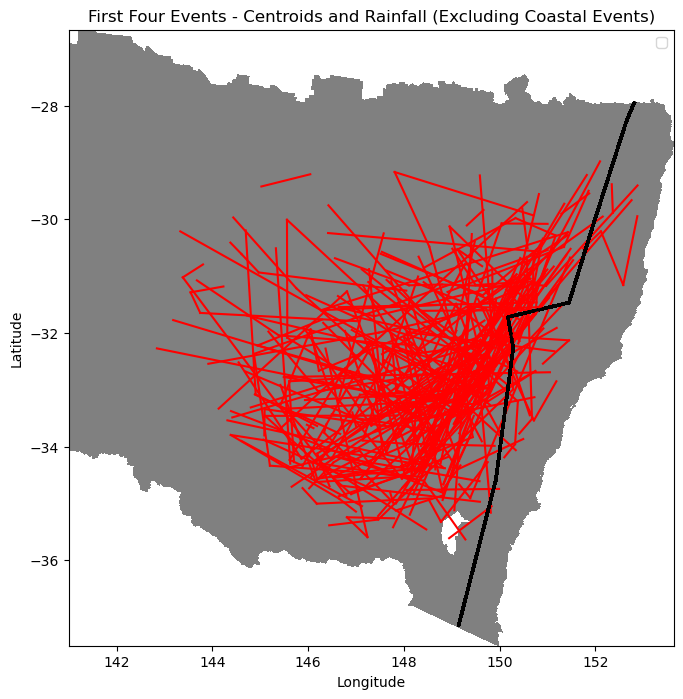

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Define a minimum threshold for KDE values
kde_threshold = 1e-4

def plot_event_centroids(ax, csv_file, polygons_data, linestrings_data, xi, yi, positions, mask, event_label):
    try:
        # Load the CSV file
        df = pd.read_csv(csv_file)

        # Filter out NaN values in latitude and longitude
        x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

        # Sum up the rainfall values for the 7 days
        x_cleaned['7_day_accumulated_rainfall'] = x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum(axis=1)

        # Perform Gaussian KDE on the accumulated rainfall data
        values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
        rainfall = x_cleaned['7_day_accumulated_rainfall']
        kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
        zi = kde(positions).reshape(xi.shape)

        # Mask the grid to include only points inside the polygons geometry
        zi = np.where(mask, zi, np.nan)

        # Plot the polygons and linestrings
        polygons_data.plot(ax=ax, color='gray', edgecolor='none')
        linestrings_data.plot(ax=ax, color='black', linewidth=2)  # Adjust color and linewidth as needed

        # Plot the 2D contour plot with accumulated rainfall as contours
        daily_means = []  # List to store daily mean rainfall
        centroids = []  # List to store retained centroids
        retained_days = []  # List to store retained days

        # Perform KDE for each day and calculate centroids based on threshold
        rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]
        colors = sns.color_palette("husl", len(rainfall_columns))

        for i, col in enumerate(rainfall_columns):
            daily_rainfall = x_cleaned[col]
            daily_mean_rainfall = daily_rainfall.mean()
            daily_means.append(daily_mean_rainfall)
            print(f"{event_label} - Day {i+1} Mean Rainfall: {daily_mean_rainfall:.2f} mm")

        # Calculate the median of the daily mean rainfall
        median_threshold = np.median(daily_means)
        print(f"{event_label} - Median Threshold: {median_threshold:.2f} mm")

        # Track centroids and joined lines
        all_centroids = []
        all_joined_lines = []
        joined_centroids = set()

        for i, col in enumerate(rainfall_columns):
            daily_rainfall = x_cleaned[col]
            daily_mean_rainfall = daily_means[i]

            if daily_mean_rainfall >= median_threshold:
                daily_kde = gaussian_kde(values, weights=daily_rainfall, bw_method='scott')
                daily_zi = daily_kde(positions).reshape(xi.shape)
                daily_zi = np.where(mask, daily_zi, np.nan)
                # Apply the threshold to filter out negligible KDE values
                daily_zi = np.where(daily_zi >= kde_threshold, daily_zi, np.nan)
                daily_contour = ax.contour(xi, yi, daily_zi, levels=1, colors=[colors[i]], linewidths=1.5)

                if daily_contour.collections:
                    paths = [c.get_paths() for c in daily_contour.collections]
                    for path in paths:
                        for p in path:
                            centroid = p.vertices.mean(axis=0)  # Calculate the centroid
                            all_centroids.append(centroid)
                            retained_days.append(i)

                for c in daily_contour.collections:
                    c.remove()  # Remove the contour lines

        if all_centroids:
            all_centroids = np.array(all_centroids)
            centroids_set = set(tuple(c) for c in all_centroids)
            joined_centroids = set()
            joined_lines = []

            for j in range(len(all_centroids)):
                centroid = all_centroids[j]
                ax.plot(centroid[0], centroid[1], marker='', markersize=8, color='red', linestyle='')
                joined_centroids.add(tuple(centroid))

                if j > 0 and retained_days[j] == retained_days[j - 1] + 1:
                    ax.plot([all_centroids[j - 1, 0], centroid[0]], [all_centroids[j - 1, 1], centroid[1]], color='red', linestyle='-', linewidth=1.5)
                    joined_lines.append((all_centroids[j - 1], centroid))

            unjoined_centroids = [c for c in all_centroids if tuple(c) not in joined_centroids]
            for centroid in unjoined_centroids:
                ax.plot(centroid[0], centroid[1], 'o', color='blue', markersize=8, label=f'{event_label} - Unjoined')

            return np.array(all_centroids), joined_lines
    except Exception as e:
        print(f"Error processing {csv_file}: {e}")
        return np.array([]), []

# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')  # Adjust layer name if necessary
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')  # Adjust layer name if necessary

# Get the bounds of the polygons
minx, miny, maxx, maxy = polygons_data.total_bounds

# Create a grid of points within the bounds
xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

# Flatten the grid to pass into the KDE function
positions = np.vstack([xi.ravel(), yi.ravel()])

# Mask the grid to include only points inside the polygons geometry
points = np.vstack((xi.flatten(), yi.flatten())).T
mask = np.array([polygons_data.contains(Point(point)).any() for point in points])
mask = mask.reshape(xi.shape)

# Load the Excel file and extract unique event names
excel_file = '/Users/coolkarni/Desktop/OneDrive - The University of Melbourne/R1_99_New Events.xlsx'
df_events = pd.read_excel(excel_file, sheet_name='Sheet6')
event_names = df_events['Event'].dropna().unique()

# Load the Coastal Events Excel file and extract event names to exclude
coastal_events_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/BoM Station list 4.xlsx'
df_coastal = pd.read_excel(coastal_events_file, sheet_name='Coastal Events')
coastal_events = df_coastal['Coastal Events'].dropna().unique()

# Filter out the coastal events from the event names
filtered_event_names = [event for event in event_names if event not in coastal_events]

# Find the CSV files for each event
csv_dir = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/'
event_files = [os.path.join(csv_dir, f'{event}.csv') for event in filtered_event_names]

# Slice to include only the first four events
event_files = event_files[:-1]  # Changed to only the first four events

# Initialize a list to store the joined lines and centroids for each event
all_joined_lines = []
all_centroids = []

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
for event_file in event_files:
    event_label = os.path.basename(event_file).replace('.csv', '')
    centroids, joined_lines = plot_event_centroids(ax, event_file, polygons_data, linestrings_data, xi, yi, positions, mask, event_label)
    if centroids.size > 0:
        all_centroids.append({'event': event_label, 'centroids': centroids})
    if joined_lines:
        all_joined_lines.append({'event': event_label, 'joined_lines': joined_lines})

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('First Four Events - Centroids and Rainfall (Excluding Coastal Events)')
plt.legend()
plt.show()

# Load existing data if available
existing_joined_lines_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines2.csv'
existing_centroids_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/centroids2.csv'

if os.path.exists(existing_joined_lines_file):
    df_existing_joined_lines = pd.read_csv(existing_joined_lines_file)
else:
    df_existing_joined_lines = pd.DataFrame(columns=['event', 'start_lon', 'start_lat', 'end_lon', 'end_lat'])

if os.path.exists(existing_centroids_file):
    df_existing_centroids = pd.read_csv(existing_centroids_file)
else:
    df_existing_centroids = pd.DataFrame(columns=['event', 'longitude', 'latitude'])

# Append new data to existing data
new_joined_lines_data = []
for item in all_joined_lines:
    event = item['event']
    for line in item['joined_lines']:
        new_joined_lines_data.append({'event': event, 'start_lon': line[0][0], 'start_lat': line[0][1], 'end_lon': line[1][0], 'end_lat': line[1][1]})

df_new_joined_lines = pd.DataFrame(new_joined_lines_data)
df_combined_joined_lines = pd.concat([df_existing_joined_lines, df_new_joined_lines], ignore_index=True)
df_combined_joined_lines.to_csv(existing_joined_lines_file, index=False)

new_centroids_data = []
for item in all_centroids:
    event = item['event']
    for centroid in item['centroids']:
        new_centroids_data.append({'event': event, 'longitude': centroid[0], 'latitude': centroid[1]})

df_new_centroids = pd.DataFrame(new_centroids_data)
df_combined_centroids = pd.concat([df_existing_centroids, df_new_centroids], ignore_index=True)
df_combined_centroids.to_csv(existing_centroids_file, index=False)
